#Rough Set

In [1]:
#Impor Library Rough Set
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("liver.csv",sep=',')
df

Gender  Age   TP   DB   AGR  SGPT  SGOT  AAP  Albumin    TB  \
0         1   65  6.8  0.1  0.90    16    18  187      3.3   0.7   
1         2   62  7.5  5.5  0.74    64   100  699      3.2  10.9   
2         2   62  7.0  4.1  0.89    60    68  490      3.3   7.3   
3         2   58  6.8  0.4  1.00    14    20  182      3.4   1.0   
4         2   72  7.3  2.0  0.40    27    59  195      2.4   3.9   
..      ...  ...  ...  ...   ...   ...   ...  ...      ...   ...   
475       2   60  5.9  0.1  0.37    20    34  500      1.6   0.5   
476       2   40  6.0  0.1  1.10    35    31   98      3.2   0.6   
477       2   52  6.4  0.2  1.00    48    49  245      3.2   0.8   
478       2   31  6.8  0.5  1.00    29    32  184      3.4   1.3   
479       2   38  7.3  0.3  1.50    21    24  216      4.4   1.0   

     Liver_Disease  
0                2  
1                2  
2                2  
3                2  
4                2  
..             ...  
475              1  
476              2  
477              2  
478              2  
479              1  

[480 rows x 11 columns]

In [3]:
df=df.iloc[::,1:]         #memisahkan antara variabel x dan y
#df=df.iloc[::,:-1] 
df

Age   TP   DB   AGR  SGPT  SGOT  AAP  Albumin    TB  Liver_Disease
0     65  6.8  0.1  0.90    16    18  187      3.3   0.7              2
1     62  7.5  5.5  0.74    64   100  699      3.2  10.9              2
2     62  7.0  4.1  0.89    60    68  490      3.3   7.3              2
3     58  6.8  0.4  1.00    14    20  182      3.4   1.0              2
4     72  7.3  2.0  0.40    27    59  195      2.4   3.9              2
..   ...  ...  ...   ...   ...   ...  ...      ...   ...            ...
475   60  5.9  0.1  0.37    20    34  500      1.6   0.5              1
476   40  6.0  0.1  1.10    35    31   98      3.2   0.6              2
477   52  6.4  0.2  1.00    48    49  245      3.2   0.8              2
478   31  6.8  0.5  1.00    29    32  184      3.4   1.3              2
479   38  7.3  0.3  1.50    21    24  216      4.4   1.0              1

[480 rows x 10 columns]

In [4]:
#melakukan encoding (mengganti kategori menjadi angka)
#df['class'].value_counts()

In [5]:
#Encoding dengan data sedikit
#cleanup_nums = {"class": {"Abnormal": 1, "Normal": 2}}
#df = df.replace(cleanup_nums)
#df

#Core and Reduct

In [6]:
def indiscrenibility(faktor):
    df_r = faktor.groupby(list(faktor)).apply(lambda x: tuple(x.index)).tolist()
    df_baru=[]
    for i in df_r:
        dfb=list(i)
        df_baru.append(dfb)
    return df_baru

In [7]:
def Core_and_Reduct(faktor):
    R=indiscrenibility(faktor)
    kolom=list(faktor.columns)
    indis_vector=[]
    for k in kolom:
        k=str(k) 
        df2=faktor.drop(columns=[k])
        K=indiscrenibility(df2)
        if (K==R):
            indis=True
            indis_vector.append(indis) 
        else:
            indis=False
            indis_vector.append(indis) 
    
    indeks = []
    for i in range(len(indis_vector)):
        if indis_vector[i] == False:
            indeks.append(i)
    indis_var = [kolom[i] for i in indeks] 
    df_CR=faktor[indis_var]
    # Mengembalikan Faktor Utama
    df_CR['Liver Disease']=faktor.iloc[::,-1]
    return df_CR

In [8]:
df_CR=Core_and_Reduct(df)
df_CR.head()

Age   TP   DB   AGR  Liver Disease
0   65  6.8  0.1  0.90              2
1   62  7.5  5.5  0.74              2
2   62  7.0  4.1  0.89              2
3   58  6.8  0.4  1.00              2
4   72  7.3  2.0  0.40              2

In [9]:
df_CR.to_csv('hasilroughset.csv') 

#Fuzzy

In [10]:
#Impor Library SK - Fuzzy
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

warnings.filterwarnings('ignore')

In [11]:
df_tsk=pd.read_csv('hasilroughset.csv',sep=',')
df_tsk

Unnamed: 0  Age   TP   DB   AGR  Liver Disease
0             0   65  6.8  0.1  0.90              2
1             1   62  7.5  5.5  0.74              2
2             2   62  7.0  4.1  0.89              2
3             3   58  6.8  0.4  1.00              2
4             4   72  7.3  2.0  0.40              2
..          ...  ...  ...  ...   ...            ...
475         475   60  5.9  0.1  0.37              1
476         476   40  6.0  0.1  1.10              2
477         477   52  6.4  0.2  1.00              2
478         478   31  6.8  0.5  1.00              2
479         479   38  7.3  0.3  1.50              1

[480 rows x 6 columns]

In [12]:
df_tsk=df_tsk.drop(columns=['Unnamed: 0'])      #diilangin kolom
df_tsk

Age   TP   DB   AGR  Liver Disease
0     65  6.8  0.1  0.90              2
1     62  7.5  5.5  0.74              2
2     62  7.0  4.1  0.89              2
3     58  6.8  0.4  1.00              2
4     72  7.3  2.0  0.40              2
..   ...  ...  ...   ...            ...
475   60  5.9  0.1  0.37              1
476   40  6.0  0.1  1.10              2
477   52  6.4  0.2  1.00              2
478   31  6.8  0.5  1.00              2
479   38  7.3  0.3  1.50              1

[480 rows x 5 columns]

In [13]:
df_tsk.describe()

Age          TP          DB         AGR  Liver Disease
count  480.000000  480.000000  480.000000  480.000000     480.000000
mean    44.904167    6.474375    1.473125    0.953583       1.720833
std     16.025918    1.089286    2.790673    0.327034       0.449058
min     11.000000    2.700000    0.100000    0.300000       1.000000
25%     33.000000    5.775000    0.200000    0.700000       1.000000
50%     45.000000    6.500000    0.300000    0.965000       2.000000
75%     57.250000    7.200000    1.300000    1.100000       2.000000
max     90.000000    9.600000   19.700000    2.800000       2.000000

In [14]:
df_tsk.isnull().sum()    #untuk mengecek nilai yang hilang

Age              0
TP               0
DB               0
AGR              0
Liver Disease    0
dtype: int64

In [15]:
df_tsk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            480 non-null    int64  
 1   TP             480 non-null    float64
 2   DB             480 non-null    float64
 3   AGR            480 non-null    float64
 4   Liver Disease  480 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 18.9 KB


#Info Atribute
1. Age (Umur)
2. Sex (Kelamin)
3. Total Bilirubin (TB)
4. Direct Bilirubin (DB)
5. Alkphos Alkaline Phosphotase (AAP)
6. Alamie Aminotransferase (SGPT)
7. Aspartate Aminotransferase (SGOT)
8. Total Proteins (TP)
9. Albumin (ALB)
10. Albumin dan Globulin Ratio (AGR)
11. Liver Disease



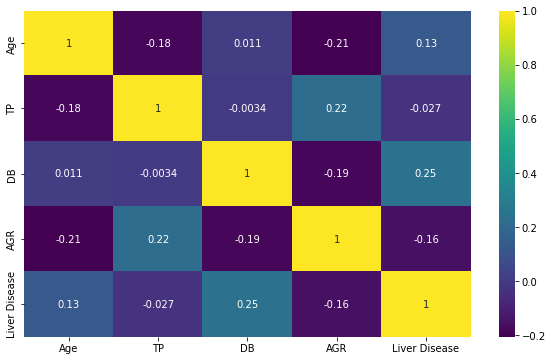

In [16]:
#untuk melihat korelasi data
k=len(df_tsk.columns)
cm=df_tsk.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap='viridis')

# Fuzzyfikasi

In [17]:
def fungsi_segitiga(x, amb):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu = np.zeros(len(x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < x, x < m))[0]
        miu[idx] = (x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < x, x < b))[0]
        miu[idx] = (b - x[idx]) / float(b - m)

    idx = np.nonzero(x == m)
    miu[idx] = 1
    
    return miu

In [18]:
def miu_fungsi_segitiga(array_x, amb, x_i):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu = np.zeros(len(array_x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < array_x, array_x < m))[0]
        miu[idx] = (array_x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < array_x, array_x < b))[0]
        miu[idx] = (b - array_x[idx]) / float(b - m)

    idx = np.nonzero(array_x == m)
    miu[idx] = 1

    dict_fuzzy=res = {round(array_x[i],2): miu[i] for i in range(len(array_x))}
    print(dict_fuzzy)
    #hasil = dict_fuzzy[x_i]
    hasil = dict_fuzzy[int(x_i)]   
    return hasil

##Pembentukan Himpunan Fuzzy

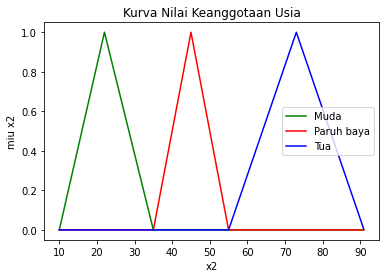

In [19]:
# Pembentukan Himpunan Fuzzy Age [fungsi buat sendiri]
x_Age = np.arange(10, 91, 0.1) # Semesta Pembicaraan
amb_muda = [10, 22, 35]
amb_paruhbaya = [35, 45, 55]
amb_tua = [55, 73, 91]

miu_Age_muda = fungsi_segitiga(x_Age, amb_muda)
miu_Age_paruhbaya = fungsi_segitiga(x_Age, amb_paruhbaya)
miu_Age_tua = fungsi_segitiga(x_Age, amb_tua)

import matplotlib.pyplot as plt
plt.plot(x_Age, miu_Age_muda, label = "Muda", color='green')
plt.plot(x_Age, miu_Age_paruhbaya, label = "Paruh baya", color='red')
plt.plot(x_Age, miu_Age_tua, label = "Tua", color='blue')
plt.xlabel('x2')
plt.ylabel('miu x2')
plt.title('Kurva Nilai Keanggotaan Usia')
plt.legend()
plt.show()

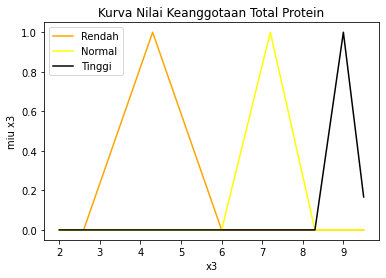

In [20]:
# Pembentukan Himpunan Fuzzy Total Protein [fungsi buat sendiri]
x_TP = np.arange(2, 9.6, 0.1) # Semesta Pembicaraan
amb_rendah  = [2.6, 4.3, 6]
amb_normal  = [6, 7.2, 8.3]
amb_tinggi = [8.3, 9, 9.6]

miu_TP_rendah  = fungsi_segitiga(x_TP, amb_rendah)
miu_TP_normal  = fungsi_segitiga(x_TP, amb_normal)
miu_TP_tinggi  = fungsi_segitiga(x_TP, amb_tinggi)

import matplotlib.pyplot as plt
plt.plot(x_TP, miu_TP_rendah, label = "Rendah", color='orange')
plt.plot(x_TP, miu_TP_normal, label = "Normal", color='yellow')
plt.plot(x_TP, miu_TP_tinggi, label = "Tinggi", color='black')
plt.xlabel('x3')
plt.ylabel('miu x3')
plt.title('Kurva Nilai Keanggotaan Total Protein')
plt.legend()
plt.show()

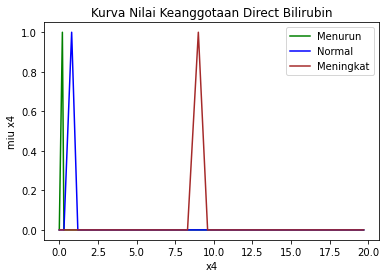

In [21]:
# Pembentukan Himpunan Fuzzy Direct Bilirubin [fungsi buat sendiri]
x_DB = np.arange(0, 19.8, 0.1) # Semesta Pembicaraan
amb_menurun = [0, 0.2, 0.3]
amb_normal = [0.3, 0.8, 1.2]
amb_meningkat = [1.2, 10.5, 19.8]

miu_DB_menurun  = fungsi_segitiga(x_DB, amb_menurun)
miu_DB_normal  = fungsi_segitiga(x_DB, amb_normal)
miu_DB_meningkat  = fungsi_segitiga(x_DB, amb_tinggi)

import matplotlib.pyplot as plt
plt.plot(x_DB, miu_DB_menurun, label = "Menurun", color='green')
plt.plot(x_DB, miu_DB_normal, label = "Normal", color='blue')
plt.plot(x_DB, miu_DB_meningkat, label = "Meningkat", color='brown')
plt.xlabel('x4')
plt.ylabel('miu x4')
plt.title('Kurva Nilai Keanggotaan Direct Bilirubin')
plt.legend()
plt.show()

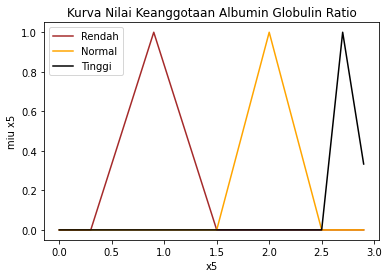

In [22]:
# Pembentukan Himpunan Fuzzy Albumin Globulin Ratio	[fungsi buat sendiri]
x_AGR = np.arange(0, 3, 0.1) # Semesta Pembicaraan
amb_rendah  = [0.3, 0.9, 1.5]
amb_normal = [1.5, 2, 2.5]
amb_tinggi = [2.5, 2.7, 3]

miu_AGR_rendah  = fungsi_segitiga(x_AGR, amb_rendah)
miu_AGR_normal  = fungsi_segitiga(x_AGR, amb_normal)
miu_AGR_tinggi  = fungsi_segitiga(x_AGR, amb_tinggi)

import matplotlib.pyplot as plt
plt.plot(x_AGR, miu_AGR_rendah, label = "Rendah", color='brown')
plt.plot(x_AGR, miu_AGR_normal, label = "Normal", color='orange')
plt.plot(x_AGR, miu_AGR_tinggi, label = "Tinggi", color='black')

plt.xlabel('x5')
plt.ylabel('miu x5')
plt.title('Kurva Nilai Keanggotaan Albumin Globulin Ratio')
plt.legend()
plt.show()

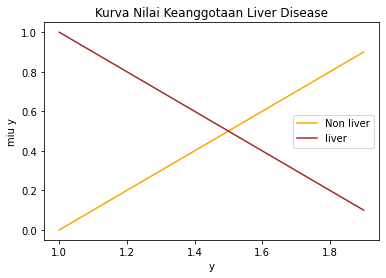

In [34]:
# Pembentukan Himpunan Fuzzy Liver Disease [fungsi buat sendiri]
x_Liver_Disease= np.arange(1, 2, 0.1) # Semesta Pembicaraan
amb_nonliver  = [1, 2, 2]
amb_liver = [1, 1, 2]

miu_Liver_Disease_nonliver  = fungsi_segitiga(x_Liver_Disease, amb_nonliver)
miu_Liver_Disease_liver   = fungsi_segitiga(x_Liver_Disease, amb_liver)

import matplotlib.pyplot as plt
plt.plot(x_Liver_Disease, miu_Liver_Disease_nonliver, label = "Non liver", color='orange')
plt.plot(x_Liver_Disease, miu_Liver_Disease_liver, label = "liver",  color='brown')
plt.xlabel('y')
plt.ylabel('miu y')
plt.title('Kurva Nilai Keanggotaan Liver Disease')
plt.legend()
plt.show()

#Perhitungan Nilai Miu

In [24]:
#miu x1 (Age)
def fuzzyfikasi(x_array, amd_1, amd_2, amd_3, x, label_1, label_2, label_3):
    batas = (max(x_array)+min(x_array))
    awal = batas-66
    tengah = awal+20
    print(batas)
    print(awal)
    print(tengah)
    hasil=0
    if x <= awal:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    elif awal <= x <= tengah: 
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_3, x)
        label_hasil = label_3
    return hasil, label_hasil

In [25]:
#miu x2 (Total Protein)
def fuzzyfikasi2(x_array, amd_1, amd_2, amd_3, x, label_1, label_2, label_3):
    batas = (max(x_array)+min(x_array))
    awal = batas-6.3
    tengah = batas+2.3
    print(batas)
    print(awal)
    print(tengah)
    hasil=0
    if x <= awal:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    elif awal <= x <= tengah: 
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_3, x)
        label_hasil = label_3
    return hasil, label_hasil

In [26]:
#miu x3 (Direct Bilirubin)
def fuzzyfikasi3(x_array, amd_1, amd_2, amd_3, x, label_1, label_2, label_3):
    batas = ((max(x_array)+min(x_array))/6)
    awal = batas-3
    tengah = batas+0.9
    print(batas)
    print(awal)
    print(tengah)
    hasil=0
    if x <= awal:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    elif awal <= x <= tengah: 
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_3, x)
        label_hasil = label_3
    return hasil, label_hasil

In [27]:
#miu x4 (Albumin dan Globulin Ratio)
def fuzzyfikasi4(x_array, amd_1, amd_2, amd_3, x, label_1, label_2, label_3):
    batas = (max(x_array)+min(x_array))
    awal = batas-1.6
    tengah = batas+1
    print(batas)
    print(awal)
    print(tengah)
    hasil=0
    if x <= awal:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    elif awal <= x <= tengah: 
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_3, x)
        label_hasil = label_3
    return hasil, label_hasil

In [401]:
#miu y
def fuzzyfikasi5(x_array, amd_1, amd_2, x, label_1, label_2):
    batas = (max(x_array)+min(x_array))
    awal = batas-2
    print(batas)
    print(awal)
    hasil1=0
    if x <= awal:
        hasil1=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil1 = label_1
    else:
        hasil1=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil1 = label_2
    return hasil1, label_hasil1

In [29]:
#miu x1
x_Age = np.arange(10, 91, 0.1) # Semesta Pembicaraan
amb_muda = [10, 22, 35]
amb_paruhbaya = [35, 45, 55]
amb_tua = [55, 73, 91]

fuzzifikasi_Age=[]
miu_Age=[]
for i in df.Age:
    hasil=fuzzyfikasi(x_Age, amb_muda, amb_paruhbaya, amb_tua, i, "Muda", "Paruh baya", "Tua")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_Age.append(fuzz)
    miu_Age.append(m)
    
len(fuzzifikasi_Age)

100.89999999999971
34.89999999999971
54.89999999999971
{10.0: 0.0, 10.1: 0.0, 10.2: 0.0, 10.3: 0.0, 10.4: 0.0, 10.5: 0.0, 10.6: 0.0, 10.7: 0.0, 10.8: 0.0, 10.9: 0.0, 11.0: 0.0, 11.1: 0.0, 11.2: 0.0, 11.3: 0.0, 11.4: 0.0, 11.5: 0.0, 11.6: 0.0, 11.7: 0.0, 11.8: 0.0, 11.9: 0.0, 12.0: 0.0, 12.1: 0.0, 12.2: 0.0, 12.3: 0.0, 12.4: 0.0, 12.5: 0.0, 12.6: 0.0, 12.7: 0.0, 12.8: 0.0, 12.9: 0.0, 13.0: 0.0, 13.1: 0.0, 13.2: 0.0, 13.3: 0.0, 13.4: 0.0, 13.5: 0.0, 13.6: 0.0, 13.7: 0.0, 13.8: 0.0, 13.9: 0.0, 14.0: 0.0, 14.1: 0.0, 14.2: 0.0, 14.3: 0.0, 14.4: 0.0, 14.5: 0.0, 14.6: 0.0, 14.7: 0.0, 14.8: 0.0, 14.9: 0.0, 15.0: 0.0, 15.1: 0.0, 15.2: 0.0, 15.3: 0.0, 15.4: 0.0, 15.5: 0.0, 15.6: 0.0, 15.7: 0.0, 15.8: 0.0, 15.9: 0.0, 16.0: 0.0, 16.1: 0.0, 16.2: 0.0, 16.3: 0.0, 16.4: 0.0, 16.5: 0.0, 16.6: 0.0, 16.7: 0.0, 16.8: 0.0, 16.9: 0.0, 17.0: 0.0, 17.1: 0.0, 17.2: 0.0, 17.3: 0.0, 17.4: 0.0, 17.5: 0.0, 17.6: 0.0, 17.7: 0.0, 17.8: 0.0, 17.9: 0.0, 18.0: 0.0, 18.1: 0.0, 18.2: 0.0, 18.3: 0.0, 18.4: 0.0, 18.5: 0.0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




{10.0: 0.0, 10.1: 0.0, 10.2: 0.0, 10.3: 0.0, 10.4: 0.0, 10.5: 0.0, 10.6: 0.0, 10.7: 0.0, 10.8: 0.0, 10.9: 0.0, 11.0: 0.0, 11.1: 0.0, 11.2: 0.0, 11.3: 0.0, 11.4: 0.0, 11.5: 0.0, 11.6: 0.0, 11.7: 0.0, 11.8: 0.0, 11.9: 0.0, 12.0: 0.0, 12.1: 0.0, 12.2: 0.0, 12.3: 0.0, 12.4: 0.0, 12.5: 0.0, 12.6: 0.0, 12.7: 0.0, 12.8: 0.0, 12.9: 0.0, 13.0: 0.0, 13.1: 0.0, 13.2: 0.0, 13.3: 0.0, 13.4: 0.0, 13.5: 0.0, 13.6: 0.0, 13.7: 0.0, 13.8: 0.0, 13.9: 0.0, 14.0: 0.0, 14.1: 0.0, 14.2: 0.0, 14.3: 0.0, 14.4: 0.0, 14.5: 0.0, 14.6: 0.0, 14.7: 0.0, 14.8: 0.0, 14.9: 0.0, 15.0: 0.0, 15.1: 0.0, 15.2: 0.0, 15.3: 0.0, 15.4: 0.0, 15.5: 0.0, 15.6: 0.0, 15.7: 0.0, 15.8: 0.0, 15.9: 0.0, 16.0: 0.0, 16.1: 0.0, 16.2: 0.0, 16.3: 0.0, 16.4: 0.0, 16.5: 0.0, 16.6: 0.0, 16.7: 0.0, 16.8: 0.0, 16.9: 0.0, 17.0: 0.0, 17.1: 0.0, 17.2: 0.0, 17.3: 0.0, 17.4: 0.0, 17.5: 0.0, 17.6: 0.0, 17.7: 0.0, 17.8: 0.0, 17.9: 0.0, 18.0: 0.0, 18.1: 0.0, 18.2: 0.0, 18.3: 0.0, 18.4: 0.0, 18.5: 0.0, 18.6: 0.0, 18.7: 0.0, 18.8: 0.0, 18.9: 0.0, 19.0: 0.

480

In [30]:
#miu x2
x_TP = np.arange(2, 9.6, 0.1) # Semesta Pembicaraan
amb_rendah  = [2.6, 4.3, 6]
amb_normal  = [6, 7.2, 8.3]
amb_tinggi = [8.3, 9, 9.6]

fuzzifikasi_TP=[]
miu_TP=[]
for i in df.TP:
    hasil=fuzzyfikasi2(x_TP, amb_rendah, amb_normal, amb_tinggi, i, "Rendah", "Normal", "Tinggi")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_TP.append(fuzz)
    miu_TP.append(m)

len(fuzzifikasi_TP)

11.500000000000007
5.200000000000007
13.800000000000008
{2.0: 0.0, 2.1: 0.0, 2.2: 0.0, 2.3: 0.0, 2.4: 0.0, 2.5: 0.0, 2.6: 0.0, 2.7: 0.0, 2.8: 0.0, 2.9: 0.0, 3.0: 0.0, 3.1: 0.0, 3.2: 0.0, 3.3: 0.0, 3.4: 0.0, 3.5: 0.0, 3.6: 0.0, 3.7: 0.0, 3.8: 0.0, 3.9: 0.0, 4.0: 0.0, 4.1: 0.0, 4.2: 0.0, 4.3: 0.0, 4.4: 0.0, 4.5: 0.0, 4.6: 0.0, 4.7: 0.0, 4.8: 0.0, 4.9: 0.0, 5.0: 0.0, 5.1: 0.0, 5.2: 0.0, 5.3: 0.0, 5.4: 0.0, 5.5: 0.0, 5.6: 0.0, 5.7: 0.0, 5.8: 0.0, 5.9: 0.0, 6.0: 2.9605947323337505e-15, 6.1: 0.08333333333333598, 6.2: 0.16666666666666974, 6.3: 0.2500000000000035, 6.4: 0.33333333333333653, 6.5: 0.41666666666666957, 6.6: 0.5000000000000033, 6.7: 0.5833333333333371, 6.8: 0.6666666666666701, 6.9: 0.7500000000000031, 7.0: 0.8333333333333369, 7.1: 0.9166666666666706, 7.2: 0.999999999999996, 7.3: 0.9090909090909054, 7.4: 0.8181818181818141, 7.5: 0.7272727272727227, 7.6: 0.6363636363636321, 7.7: 0.5454545454545416, 7.8: 0.4545454545454503, 7.9: 0.36363636363635893, 8.0: 0.2727272727272684, 8.1: 0.181

480

In [31]:
#miu x3
x_DB = np.arange(0, 19.8, 0.1) # Semesta Pembicaraan
amb_menurun = [0, 0.2, 0.3]
amb_normal = [0.3, 0.8, 1.2]
amb_meningkat = [1.2, 10.5, 19.8]

fuzzifikasi_DB=[]
miu_DB=[]
for i in df.DB:
    hasil=fuzzyfikasi3(x_DB, amb_menurun, amb_normal, amb_meningkat, i, "Menurun", "Normal", "Meningkat")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_DB.append(fuzz)
    miu_DB.append(m)
len(fuzzifikasi_DB)

3.2833333333333337
0.28333333333333366
4.183333333333334
{0.0: 0.0, 0.1: 0.5, 0.2: 1.0, 0.3: 0.0, 0.4: 0.0, 0.5: 0.0, 0.6: 0.0, 0.7: 0.0, 0.8: 0.0, 0.9: 0.0, 1.0: 0.0, 1.1: 0.0, 1.2: 0.0, 1.3: 0.0, 1.4: 0.0, 1.5: 0.0, 1.6: 0.0, 1.7: 0.0, 1.8: 0.0, 1.9: 0.0, 2.0: 0.0, 2.1: 0.0, 2.2: 0.0, 2.3: 0.0, 2.4: 0.0, 2.5: 0.0, 2.6: 0.0, 2.7: 0.0, 2.8: 0.0, 2.9: 0.0, 3.0: 0.0, 3.1: 0.0, 3.2: 0.0, 3.3: 0.0, 3.4: 0.0, 3.5: 0.0, 3.6: 0.0, 3.7: 0.0, 3.8: 0.0, 3.9: 0.0, 4.0: 0.0, 4.1: 0.0, 4.2: 0.0, 4.3: 0.0, 4.4: 0.0, 4.5: 0.0, 4.6: 0.0, 4.7: 0.0, 4.8: 0.0, 4.9: 0.0, 5.0: 0.0, 5.1: 0.0, 5.2: 0.0, 5.3: 0.0, 5.4: 0.0, 5.5: 0.0, 5.6: 0.0, 5.7: 0.0, 5.8: 0.0, 5.9: 0.0, 6.0: 0.0, 6.1: 0.0, 6.2: 0.0, 6.3: 0.0, 6.4: 0.0, 6.5: 0.0, 6.6: 0.0, 6.7: 0.0, 6.8: 0.0, 6.9: 0.0, 7.0: 0.0, 7.1: 0.0, 7.2: 0.0, 7.3: 0.0, 7.4: 0.0, 7.5: 0.0, 7.6: 0.0, 7.7: 0.0, 7.8: 0.0, 7.9: 0.0, 8.0: 0.0, 8.1: 0.0, 8.2: 0.0, 8.3: 0.0, 8.4: 0.0, 8.5: 0.0, 8.6: 0.0, 8.7: 0.0, 8.8: 0.0, 8.9: 0.0, 9.0: 0.0, 9.1: 0.0, 9.2: 0.0, 9.3: 0.0, 9.

480

In [32]:
#miu x4
x_AGR = np.arange(0, 3, 0.1) # Semesta Pembicaraan
amb_rendah  = [0.3, 0.9, 1.5]
amb_normal = [1.5, 2, 2.5]
amb_tinggi = [2.5, 2.7, 3]

fuzzifikasi_AGR=[]
miu_AGR=[]
for i in df.AGR:
    hasil=fuzzyfikasi4(x_AGR, amb_rendah, amb_normal, amb_tinggi, i, "Rendah", "Normal", "Tinggi")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_AGR.append(fuzz)
    miu_AGR.append(m)
len(fuzzifikasi_AGR)

2.9000000000000004
1.3000000000000003
3.9000000000000004
{0.0: 0.0, 0.1: 0.0, 0.2: 0.0, 0.3: 9.25185853854297e-17, 0.4: 0.16666666666666669, 0.5: 0.3333333333333333, 0.6: 0.5000000000000001, 0.7: 0.6666666666666667, 0.8: 0.8333333333333333, 0.9: 1.0, 1.0: 0.8333333333333334, 1.1: 0.6666666666666665, 1.2: 0.4999999999999997, 1.3: 0.33333333333333326, 1.4: 0.16666666666666646, 1.5: 0.0, 1.6: 0.0, 1.7: 0.0, 1.8: 0.0, 1.9: 0.0, 2.0: 0.0, 2.1: 0.0, 2.2: 0.0, 2.3: 0.0, 2.4: 0.0, 2.5: 0.0, 2.6: 0.0, 2.7: 0.0, 2.8: 0.0, 2.9: 0.0}
2.9000000000000004
1.3000000000000003
3.9000000000000004
{0.0: 0.0, 0.1: 0.0, 0.2: 0.0, 0.3: 9.25185853854297e-17, 0.4: 0.16666666666666669, 0.5: 0.3333333333333333, 0.6: 0.5000000000000001, 0.7: 0.6666666666666667, 0.8: 0.8333333333333333, 0.9: 1.0, 1.0: 0.8333333333333334, 1.1: 0.6666666666666665, 1.2: 0.4999999999999997, 1.3: 0.33333333333333326, 1.4: 0.16666666666666646, 1.5: 0.0, 1.6: 0.0, 1.7: 0.0, 1.8: 0.0, 1.9: 0.0, 2.0: 0.0, 2.1: 0.0, 2.2: 0.0, 2.3: 0.0, 2.4:

480

In [402]:
#Miu y
x_Liver_Disease= np.arange(1, 3, 0.1) # Semesta Pembicaraan
amb_nonliver  = [1, 2, 2]
amb_liver = [1, 1, 2]
fuzzifikasi_Liver_Disease=[]
miu_Liver_Disease=[]
for i in df.Liver_Disease:
    hasil=fuzzyfikasi5(x_Liver_Disease, amb_liver, amb_nonliver, i, "Liver", "Nonliver")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_Liver_Disease.append(fuzz)
    miu_Liver_Disease.append(m)
len(fuzzifikasi_Liver_Disease)

3.9000000000000017
1.9000000000000017
{1.0: 0.0, 1.1: 0.10000000000000009, 1.2: 0.20000000000000018, 1.3: 0.30000000000000027, 1.4: 0.40000000000000036, 1.5: 0.5000000000000004, 1.6: 0.6000000000000005, 1.7: 0.7000000000000006, 1.8: 0.8000000000000007, 1.9: 0.9000000000000008, 2.0: 0.0, 2.1: 0.0, 2.2: 0.0, 2.3: 0.0, 2.4: 0.0, 2.5: 0.0, 2.6: 0.0, 2.7: 0.0, 2.8: 0.0, 2.9: 0.0}
3.9000000000000017
1.9000000000000017
{1.0: 0.0, 1.1: 0.10000000000000009, 1.2: 0.20000000000000018, 1.3: 0.30000000000000027, 1.4: 0.40000000000000036, 1.5: 0.5000000000000004, 1.6: 0.6000000000000005, 1.7: 0.7000000000000006, 1.8: 0.8000000000000007, 1.9: 0.9000000000000008, 2.0: 0.0, 2.1: 0.0, 2.2: 0.0, 2.3: 0.0, 2.4: 0.0, 2.5: 0.0, 2.6: 0.0, 2.7: 0.0, 2.8: 0.0, 2.9: 0.0}
3.9000000000000017
1.9000000000000017
{1.0: 0.0, 1.1: 0.10000000000000009, 1.2: 0.20000000000000018, 1.3: 0.30000000000000027, 1.4: 0.40000000000000036, 1.5: 0.5000000000000004, 1.6: 0.6000000000000005, 1.7: 0.7000000000000006, 1.8: 0.800000000

480

In [403]:
df_fuzz = pd.DataFrame({"Age":df.Age,
                        "TP":df.TP,
                        "DB":df.DB,
                        "AGR":df.AGR,
                        "Liver_Disease":df.Liver_Disease,
                        "Age_fuzz": fuzzifikasi_Age,
                        "TP_fuzz": fuzzifikasi_TP,
                        "DB_fuzz": fuzzifikasi_DB,
                        "AGR_fuzz": fuzzifikasi_AGR,
                        "Liver_Disease_fuzz":fuzzifikasi_Liver_Disease,
                        "miu_Age":miu_Age,
                        "miu_TP":miu_TP,
                        "miu_DB":miu_DB,
                        "miu_AGR":miu_AGR,
                        "miu_Liver_Disease": miu_Liver_Disease})
df_fuzz

Age   TP   DB   AGR  Liver_Disease    Age_fuzz TP_fuzz    DB_fuzz  \
0     65  6.8  0.1  0.90              2         Tua  Normal    Menurun   
1     62  7.5  5.5  0.74              2         Tua  Normal  Meningkat   
2     62  7.0  4.1  0.89              2         Tua  Normal     Normal   
3     58  6.8  0.4  1.00              2         Tua  Normal     Normal   
4     72  7.3  2.0  0.40              2         Tua  Normal     Normal   
..   ...  ...  ...   ...            ...         ...     ...        ...   
475   60  5.9  0.1  0.37              1         Tua  Normal    Menurun   
476   40  6.0  0.1  1.10              2  Paruh baya  Normal    Menurun   
477   52  6.4  0.2  1.00              2  Paruh baya  Normal    Menurun   
478   31  6.8  0.5  1.00              2        Muda  Normal     Normal   
479   38  7.3  0.3  1.50              1  Paruh baya  Normal     Normal   

    AGR_fuzz Liver_Disease_fuzz   miu_Age        miu_TP    miu_DB   miu_AGR  \
0     Rendah           Nonliver  0.555556  2.960595e-15  0.000000  0.000000   
1     Rendah           Nonliver  0.388889  8.333333e-01  0.408602  0.000000   
2     Rendah           Nonliver  0.388889  8.333333e-01  0.000000  0.000000   
3     Rendah           Nonliver  0.166667  2.960595e-15  0.000000  0.833333   
4     Rendah           Nonliver  0.944444  8.333333e-01  0.000000  0.000000   
..       ...                ...       ...           ...       ...       ...   
475   Rendah              Liver  0.277778  0.000000e+00  0.000000  0.000000   
476   Rendah           Nonliver  0.500000  2.960595e-15  0.000000  0.833333   
477   Rendah           Nonliver  0.300000  2.960595e-15  0.000000  0.833333   
478   Rendah           Nonliver  0.307692  2.960595e-15  0.000000  0.833333   
479   Normal              Liver  0.300000  8.333333e-01  0.000000  0.000000   

     miu_Liver_Disease  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
..                 ...  
475                1.0  
476                0.0  
477                0.0  
478                0.0  
479                1.0  

[480 rows x 15 columns]

# Rule Generation

In [404]:
df_fuzz['Rule'] = " Jika X1 " + df_fuzz['Age_fuzz'] + " dan X2 " + df_fuzz['TP_fuzz'] + " dan X3 " + df_fuzz['DB_fuzz'] +" dan X4 " + df_fuzz['AGR_fuzz'] + " maka Y " + df_fuzz['Liver_Disease_fuzz']
df_fuzz

Age   TP   DB   AGR  Liver_Disease    Age_fuzz TP_fuzz    DB_fuzz  \
0     65  6.8  0.1  0.90              2         Tua  Normal    Menurun   
1     62  7.5  5.5  0.74              2         Tua  Normal  Meningkat   
2     62  7.0  4.1  0.89              2         Tua  Normal     Normal   
3     58  6.8  0.4  1.00              2         Tua  Normal     Normal   
4     72  7.3  2.0  0.40              2         Tua  Normal     Normal   
..   ...  ...  ...   ...            ...         ...     ...        ...   
475   60  5.9  0.1  0.37              1         Tua  Normal    Menurun   
476   40  6.0  0.1  1.10              2  Paruh baya  Normal    Menurun   
477   52  6.4  0.2  1.00              2  Paruh baya  Normal    Menurun   
478   31  6.8  0.5  1.00              2        Muda  Normal     Normal   
479   38  7.3  0.3  1.50              1  Paruh baya  Normal     Normal   

    AGR_fuzz Liver_Disease_fuzz   miu_Age        miu_TP    miu_DB   miu_AGR  \
0     Rendah           Nonliver  0.555556  2.960595e-15  0.000000  0.000000   
1     Rendah           Nonliver  0.388889  8.333333e-01  0.408602  0.000000   
2     Rendah           Nonliver  0.388889  8.333333e-01  0.000000  0.000000   
3     Rendah           Nonliver  0.166667  2.960595e-15  0.000000  0.833333   
4     Rendah           Nonliver  0.944444  8.333333e-01  0.000000  0.000000   
..       ...                ...       ...           ...       ...       ...   
475   Rendah              Liver  0.277778  0.000000e+00  0.000000  0.000000   
476   Rendah           Nonliver  0.500000  2.960595e-15  0.000000  0.833333   
477   Rendah           Nonliver  0.300000  2.960595e-15  0.000000  0.833333   
478   Rendah           Nonliver  0.307692  2.960595e-15  0.000000  0.833333   
479   Normal              Liver  0.300000  8.333333e-01  0.000000  0.000000   

     miu_Liver_Disease                                               Rule  
0                  0.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
1                  0.0   Jika X1 Tua dan X2 Normal dan X3 Meningkat da...  
2                  0.0   Jika X1 Tua dan X2 Normal dan X3 Normal dan X...  
3                  0.0   Jika X1 Tua dan X2 Normal dan X3 Normal dan X...  
4                  0.0   Jika X1 Tua dan X2 Normal dan X3 Normal dan X...  
..                 ...                                                ...  
475                1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
476                0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Menur...  
477                0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Menur...  
478                0.0   Jika X1 Muda dan X2 Normal dan X3 Normal dan ...  
479                1.0   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  

[480 rows x 16 columns]

In [405]:
df_fuzz.to_excel('hasilRuleSGD.xlsx') 

In [406]:
df_fuzz['Rule'].value_counts()

 Jika X1 Paruh baya dan X2 Normal dan X3 Normal dan X4 Rendah maka Y Nonliver       58
 Jika X1 Tua dan X2 Normal dan X3 Normal dan X4 Rendah maka Y Nonliver              47
 Jika X1 Paruh baya dan X2 Normal dan X3 Menurun dan X4 Rendah maka Y Nonliver      40
 Jika X1 Muda dan X2 Normal dan X3 Normal dan X4 Rendah maka Y Nonliver             34
 Jika X1 Muda dan X2 Normal dan X3 Menurun dan X4 Rendah maka Y Nonliver            29
 Jika X1 Paruh baya dan X2 Normal dan X3 Menurun dan X4 Rendah maka Y Liver         27
 Jika X1 Tua dan X2 Normal dan X3 Menurun dan X4 Rendah maka Y Nonliver             23
 Jika X1 Muda dan X2 Normal dan X3 Menurun dan X4 Rendah maka Y Liver               23
 Jika X1 Tua dan X2 Normal dan X3 Menurun dan X4 Rendah maka Y Liver                18
 Jika X1 Paruh baya dan X2 Normal dan X3 Meningkat dan X4 Rendah maka Y Nonliver    16
 Jika X1 Paruh baya dan X2 Normal dan X3 Normal dan X4 Rendah maka Y Liver          14
 Jika X1 Tua dan X2 Normal dan X3 Meningkat

# TSK Prediction

In [56]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##Rule 1

In [57]:
rule_1 = df_fuzz[df_fuzz['Rule']==" Jika X1 Paruh baya dan X2 Normal dan X3 Normal dan X4 Rendah maka Y Nonliver"]
index=rule_1.index
data_rule_1=df_fuzz.iloc[index,:5]
X1=np.array(data_rule_1.iloc[::,:-1])
#Y=np.array(data_rule_1.iloc[::,:1])
Y1=np.array(data_rule_1.iloc[:,2])
data_rule_1.head()

Age   TP   DB   AGR  Liver_Disease
5    46  7.6  0.7  1.30              2
8    51  7.0  1.3  0.50              2
25   48  5.8  0.6  0.61              2
26   47  6.2  1.3  1.10              2
30   50  6.4  1.2  1.00              2

In [58]:
rule_1.to_csv('hasilrule1.csv') 

###Stochastic Gradient Descent

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [60]:
df_rule1=pd.read_csv('hasilrule1.csv',sep=',')
df_rule1.head()

Unnamed: 0  Age   TP   DB   AGR  Liver_Disease    Age_fuzz TP_fuzz DB_fuzz  \
0           5   46  7.6  0.7  1.30              2  Paruh baya  Normal  Normal   
1           8   51  7.0  1.3  0.50              2  Paruh baya  Normal  Normal   
2          25   48  5.8  0.6  0.61              2  Paruh baya  Normal  Normal   
3          26   47  6.2  1.3  1.10              2  Paruh baya  Normal  Normal   
4          30   50  6.4  1.2  1.00              2  Paruh baya  Normal  Normal   

  AGR_fuzz Liver_Disease_fuzz  miu_Age        miu_TP  miu_DB   miu_AGR  \
0   Rendah           Nonliver      0.9  8.333333e-01     0.0  0.833333   
1   Rendah           Nonliver      0.4  8.333333e-01     0.5  0.000000   
2   Rendah           Nonliver      0.7  0.000000e+00     0.0  0.000000   
3   Rendah           Nonliver      0.8  2.960595e-15     0.5  0.833333   
4   Rendah           Nonliver      0.5  2.960595e-15     0.5  0.833333   

   miu_Liver_Disease                                               Rule  
0                0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
1                0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
2                0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
3                0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
4                0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...

In [61]:
df_rule1=df_rule1.drop(columns=['Unnamed: 0'])      #diilangin kolom
df_rule1.head()

Age   TP   DB   AGR  Liver_Disease    Age_fuzz TP_fuzz DB_fuzz AGR_fuzz  \
0   46  7.6  0.7  1.30              2  Paruh baya  Normal  Normal   Rendah   
1   51  7.0  1.3  0.50              2  Paruh baya  Normal  Normal   Rendah   
2   48  5.8  0.6  0.61              2  Paruh baya  Normal  Normal   Rendah   
3   47  6.2  1.3  1.10              2  Paruh baya  Normal  Normal   Rendah   
4   50  6.4  1.2  1.00              2  Paruh baya  Normal  Normal   Rendah   

  Liver_Disease_fuzz  miu_Age        miu_TP  miu_DB   miu_AGR  \
0           Nonliver      0.9  8.333333e-01     0.0  0.833333   
1           Nonliver      0.4  8.333333e-01     0.5  0.000000   
2           Nonliver      0.7  0.000000e+00     0.0  0.000000   
3           Nonliver      0.8  2.960595e-15     0.5  0.833333   
4           Nonliver      0.5  2.960595e-15     0.5  0.833333   

   miu_Liver_Disease                                               Rule  
0                0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
1                0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
2                0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
3                0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
4                0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...

In [62]:
from sklearn import preprocessing
sx1 = preprocessing.MinMaxScaler()
sy1 = preprocessing.MinMaxScaler()

scaled_X1 = sx1.fit_transform(data_rule_1.drop('Liver_Disease',axis='columns'))
scaled_y1= sy1.fit_transform(data_rule_1['Liver_Disease'].values.reshape(rule_1.shape[0],1))

scaled_X1

array([[0.57894737, 0.6969697 , 0.13793103, 1.        ],
       [0.84210526, 0.51515152, 0.34482759, 0.12087912],
       [0.68421053, 0.15151515, 0.10344828, 0.24175824],
       [0.63157895, 0.27272727, 0.34482759, 0.78021978],
       [0.78947368, 0.33333333, 0.31034483, 0.67032967],
       [0.15789474, 0.45454545, 0.44827586, 1.        ],
       [0.15789474, 0.3030303 , 0.        , 0.89010989],
       [0.21052632, 0.54545455, 0.4137931 , 0.45054945],
       [0.68421053, 0.12121212, 0.44827586, 0.25274725],
       [0.52631579, 0.09090909, 0.4137931 , 0.67032967],
       [0.78947368, 0.18181818, 0.17241379, 0.62637363],
       [0.78947368, 0.57575758, 0.03448276, 0.78021978],
       [0.68421053, 0.51515152, 0.68965517, 0.14285714],
       [0.63157895, 0.09090909, 0.4137931 , 0.08791209],
       [0.47368421, 0.39393939, 0.10344828, 0.67032967],
       [0.52631579, 0.6969697 , 0.31034483, 0.78021978],
       [0.26315789, 0.51515152, 0.51724138, 0.34065934],
       [0.26315789, 0.42424242,

In [63]:
scaled_y1_reshape=scaled_y1.reshape(scaled_y1.shape[0],)
scaled_y1_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [64]:
def stochastic_gradient_descent_rule1(X1, y1, iterasi, learning_rate = 0.1):

    jumlah_variabel_rule1 = X1.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule1 = np.ones(shape=(jumlah_variabel_rule1))       # b1, b2, ... b(jumlah variabel)
    b0_rule1 = 0                                         # b0 atau bias
    n = X1.shape[0]                                 # jumlah baris data X
    
    cost_rule1_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule1_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule1_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_index = np.random.RandomState(seed=42).randint(0, n-1)      # Memilih indeks data random untuk update parameter
        sample_x1 = X1[random_index]
        sample_y1 = y1[random_index]
        
        y1_pred = np.dot(bpoly_rule1, sample_x1.T) + b0_rule1                  # Menghitung y_pred pada setiap iterasi
        
        bpoly_rule1_grad = -(2/n)*(sample_x1.T.dot(sample_y1-y1_pred))    # Menghitung perubahan/gradien bpoly setiap iterasi
        b0_rule1_grad = -(2/n)*np.sum(sample_y1-y1_pred)                 # Menghitung perubahan/gradien b0 setiap iterasi
        bpoly_rule1 = bpoly_rule1 - learning_rate * bpoly_rule1_grad               # Memperbaharui bpoly setiap iterasi
        b0_rule1 = b0_rule1 - learning_rate * b0_rule1_grad                        # Memperbaharui bpoly setiap iterasi
        
        # Menyimpan parameter b dalam list tunggal
        bp=[]
        for jv_rule1 in range(jumlah_variabel_rule1):
            bp_rule1=bpoly_rule1[jv_rule1]
            bp.append(bp_rule1)
        b_rule1=[b0_rule1]+bp
        
        cost_rule1 = np.mean(np.square(sample_y1-y1_pred))        # MSE (Mean Squared Error)
        
        if i%100==0:                                      # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule1_list.append(cost_rule1)                        # Menyimpan nilai cost setiap iterasi
            iterasi_rule1_list.append(i)                        # Menyimpan nilai iterasi setiap iterasi
            b_rule1_list.append(b_rule1)                              # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule1, b0_rule1, cost_rule1, b_rule1_list, cost_rule1_list, iterasi_rule1_list  # Output

In [65]:
import time
mulai_rule1 = time.time()
s_bpoly_rule1, s_b0_rule1, s_cost_rule1, s_b_rule1_list, s_cost_rule1_list, s_iterasi_rule1_list=stochastic_gradient_descent_rule1 (scaled_X1, 
                                                                                                                                    scaled_y1_reshape,
                                                                                                                                    iterasi=10000,
                                                                                                                                    learning_rate = 0.01)
selesai_rule1 = time.time()
waktu_komputasi_rule1 = (selesai_rule1 - mulai_rule1)
print("Waktu Komputasi Rule 1: ",waktu_komputasi_rule1)

Waktu Komputasi Rule 1:  3.516444444656372


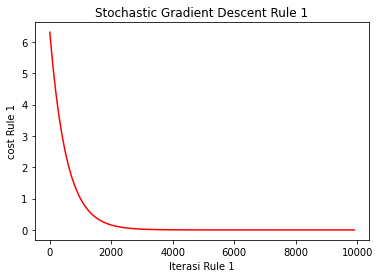

In [66]:
plt.xlabel("Iterasi Rule 1")
plt.ylabel("cost Rule 1")
plt.title("Stochastic Gradient Descent Rule 1")
plt.plot(s_iterasi_rule1_list,s_cost_rule1_list, color='red', label='Eror')
plt.show()

In [67]:
s_cost_rule1

5.939197148621948e-08

In [68]:
s_b0_rule1

-0.9373980049866266

In [69]:
s_bpoly_rule1 #hasil untuk x1 dan x2

array([0.35862242, 0.659128  , 0.25654641, 0.3716343 ])

In [70]:
data_rule_1

Age   TP   DB   AGR  Liver_Disease
5     46  7.6  0.7  1.30              2
8     51  7.0  1.3  0.50              2
25    48  5.8  0.6  0.61              2
26    47  6.2  1.3  1.10              2
30    50  6.4  1.2  1.00              2
39    38  6.8  1.6  1.30              2
40    38  6.3  0.3  1.20              2
83    39  7.1  1.5  0.80              2
98    48  5.7  1.6  0.62              2
104   45  5.6  1.5  1.00              2
111   50  5.9  0.8  0.96              2
119   50  7.2  0.4  1.10              2
125   48  7.0  2.3  0.52              2
127   47  5.6  1.5  0.47              2
131   44  6.6  0.6  1.00              2
154   45  7.6  1.2  1.10              2
155   40  7.0  1.8  0.70              2
156   40  6.7  1.7  1.30              2
159   42  7.0  1.3  0.80              2
162   38  7.2  1.0  1.00              2
180   50  7.9  1.6  0.60              2
192   38  6.0  0.7  1.00              2
193   50  6.2  0.3  1.20              2
215   45  8.0  0.8  1.00              2
216   48  8.3  1.4  1.00              2
225   50  7.5  0.5  0.90              2
227   45  8.6  0.3  1.00              2
239   50  6.8  0.6  1.00              2
243   48  7.3  1.0  0.40              2
246   48  8.0  0.7  1.10              2
275   37  5.7  0.8  1.00              2
276   37  5.3  0.4  0.60              2
278   48  7.2  0.8  1.10              2
300   47  6.8  1.6  1.00              2
305   50  7.3  0.8  0.90              2
318   41  8.0  1.3  1.00              2
319   48  5.9  0.3  0.70              2
321   48  7.5  1.1  0.90              2
322   48  6.5  2.6  1.00              2
331   50  7.0  2.3  0.70              2
335   41  6.9  0.5  0.97              2
389   38  5.5  0.3  1.00              2
394   45  7.3  1.3  1.20              2
395   45  7.2  0.4  1.11              2
405   35  7.9  0.3  0.70              2
414   36  5.9  1.5  0.70              2
420   50  7.5  0.3  1.00              2
424   45  6.8  1.6  1.00              2
427   49  8.4  0.3  1.00              2
428   49  6.9  2.1  0.70              2
431   45  7.2  1.4  1.00              2
435   52  6.4  0.8  0.70              2
440   40  7.6  0.6  1.10              2
441   54  7.0  3.2  0.80              2
447   46  5.6  1.5  0.70              2
454   51  6.2  1.2  1.00              2
455   51  7.5  2.5  1.10              2
464   52  6.0  1.4  0.39              2

In [71]:
X1=np.array(data_rule_1.iloc[::,:-1])
X1

array([[46.  ,  7.6 ,  0.7 ,  1.3 ],
       [51.  ,  7.  ,  1.3 ,  0.5 ],
       [48.  ,  5.8 ,  0.6 ,  0.61],
       [47.  ,  6.2 ,  1.3 ,  1.1 ],
       [50.  ,  6.4 ,  1.2 ,  1.  ],
       [38.  ,  6.8 ,  1.6 ,  1.3 ],
       [38.  ,  6.3 ,  0.3 ,  1.2 ],
       [39.  ,  7.1 ,  1.5 ,  0.8 ],
       [48.  ,  5.7 ,  1.6 ,  0.62],
       [45.  ,  5.6 ,  1.5 ,  1.  ],
       [50.  ,  5.9 ,  0.8 ,  0.96],
       [50.  ,  7.2 ,  0.4 ,  1.1 ],
       [48.  ,  7.  ,  2.3 ,  0.52],
       [47.  ,  5.6 ,  1.5 ,  0.47],
       [44.  ,  6.6 ,  0.6 ,  1.  ],
       [45.  ,  7.6 ,  1.2 ,  1.1 ],
       [40.  ,  7.  ,  1.8 ,  0.7 ],
       [40.  ,  6.7 ,  1.7 ,  1.3 ],
       [42.  ,  7.  ,  1.3 ,  0.8 ],
       [38.  ,  7.2 ,  1.  ,  1.  ],
       [50.  ,  7.9 ,  1.6 ,  0.6 ],
       [38.  ,  6.  ,  0.7 ,  1.  ],
       [50.  ,  6.2 ,  0.3 ,  1.2 ],
       [45.  ,  8.  ,  0.8 ,  1.  ],
       [48.  ,  8.3 ,  1.4 ,  1.  ],
       [50.  ,  7.5 ,  0.5 ,  0.9 ],
       [45.  ,  8.6 ,  0.3 ,  1.  ],
 

In [72]:
Y1=np.array(data_rule_1.iloc[:,3])  #mengambil angka dari kolom
Y1

array([1.3 , 0.5 , 0.61, 1.1 , 1.  , 1.3 , 1.2 , 0.8 , 0.62, 1.  , 0.96,
       1.1 , 0.52, 0.47, 1.  , 1.1 , 0.7 , 1.3 , 0.8 , 1.  , 0.6 , 1.  ,
       1.2 , 1.  , 1.  , 0.9 , 1.  , 1.  , 0.4 , 1.1 , 1.  , 0.6 , 1.1 ,
       1.  , 0.9 , 1.  , 0.7 , 0.9 , 1.  , 0.7 , 0.97, 1.  , 1.2 , 1.11,
       0.7 , 0.7 , 1.  , 1.  , 1.  , 0.7 , 1.  , 0.7 , 1.1 , 0.8 , 0.7 ,
       1.  , 1.1 , 0.39])

In [73]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X1_poly = poly_reg.fit_transform(X1)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X1_poly, Y1) 
# Proses Training Model
poly_reg.fit(X1, Y1) 

# Memprediksi hasil dengan regresi polynomial
y1_pred=lin_reg_2.predict(poly_reg.fit_transform(X1))
y1_pred

data_rule_1['pred'] = y1_pred
data_rule_1

Age   TP   DB   AGR  Liver_Disease  pred
5     46  7.6  0.7  1.30              2  1.30
8     51  7.0  1.3  0.50              2  0.50
25    48  5.8  0.6  0.61              2  0.61
26    47  6.2  1.3  1.10              2  1.10
30    50  6.4  1.2  1.00              2  1.00
39    38  6.8  1.6  1.30              2  1.30
40    38  6.3  0.3  1.20              2  1.20
83    39  7.1  1.5  0.80              2  0.80
98    48  5.7  1.6  0.62              2  0.62
104   45  5.6  1.5  1.00              2  1.00
111   50  5.9  0.8  0.96              2  0.96
119   50  7.2  0.4  1.10              2  1.10
125   48  7.0  2.3  0.52              2  0.52
127   47  5.6  1.5  0.47              2  0.47
131   44  6.6  0.6  1.00              2  1.00
154   45  7.6  1.2  1.10              2  1.10
155   40  7.0  1.8  0.70              2  0.70
156   40  6.7  1.7  1.30              2  1.30
159   42  7.0  1.3  0.80              2  0.80
162   38  7.2  1.0  1.00              2  1.00
180   50  7.9  1.6  0.60              2  0.60
192   38  6.0  0.7  1.00              2  1.00
193   50  6.2  0.3  1.20              2  1.20
215   45  8.0  0.8  1.00              2  1.00
216   48  8.3  1.4  1.00              2  1.00
225   50  7.5  0.5  0.90              2  0.90
227   45  8.6  0.3  1.00              2  1.00
239   50  6.8  0.6  1.00              2  1.00
243   48  7.3  1.0  0.40              2  0.40
246   48  8.0  0.7  1.10              2  1.10
275   37  5.7  0.8  1.00              2  1.00
276   37  5.3  0.4  0.60              2  0.60
278   48  7.2  0.8  1.10              2  1.10
300   47  6.8  1.6  1.00              2  1.00
305   50  7.3  0.8  0.90              2  0.90
318   41  8.0  1.3  1.00              2  1.00
319   48  5.9  0.3  0.70              2  0.70
321   48  7.5  1.1  0.90              2  0.90
322   48  6.5  2.6  1.00              2  1.00
331   50  7.0  2.3  0.70              2  0.70
335   41  6.9  0.5  0.97              2  0.97
389   38  5.5  0.3  1.00              2  1.00
394   45  7.3  1.3  1.20              2  1.20
395   45  7.2  0.4  1.11              2  1.11
405   35  7.9  0.3  0.70              2  0.70
414   36  5.9  1.5  0.70              2  0.70
420   50  7.5  0.3  1.00              2  1.00
424   45  6.8  1.6  1.00              2  1.00
427   49  8.4  0.3  1.00              2  1.00
428   49  6.9  2.1  0.70              2  0.70
431   45  7.2  1.4  1.00              2  1.00
435   52  6.4  0.8  0.70              2  0.70
440   40  7.6  0.6  1.10              2  1.10
441   54  7.0  3.2  0.80              2  0.80
447   46  5.6  1.5  0.70              2  0.70
454   51  6.2  1.2  1.00              2  1.00
455   51  7.5  2.5  1.10              2  1.10
464   52  6.0  1.4  0.39              2  0.39

##Rule 2


In [74]:
rule_2 = df_fuzz[df_fuzz['Rule']==" Jika X1 Tua dan X2 Normal dan X3 Normal dan X4 Rendah maka Y Nonliver"]
index=rule_2.index
data_rule_2=df_fuzz.iloc[index,:5]
data_rule_2

Age   TP   DB   AGR  Liver_Disease
2     62  7.0  4.1  0.89              2
3     58  6.8  0.4  1.00              2
4     72  7.3  2.0  0.40              2
9     62  6.4  3.0  0.90              2
48    58  7.2  0.5  1.00              2
49    58  7.2  0.5  1.00              2
51    57  6.5  0.4  0.60              2
52    57  5.6  0.7  0.80              2
76    60  7.1  1.9  0.80              2
77    60  7.3  2.8  0.78              2
78    60  6.8  3.2  0.70              2
79    60  7.4  4.0  0.60              2
80    60  7.0  2.7  0.70              2
81    60  6.8  2.4  0.70              2
101   66  7.1  2.1  0.40              2
106   66  5.5  1.3  0.40              2
122   60  5.4  2.7  0.50              2
126   55  6.2  3.6  0.60              2
129   60  6.8  4.0  0.80              2
130   72  6.2  0.8  0.93              2
145   60  6.0  1.1  0.53              2
157   70  6.1  0.3  0.68              2
172   70  5.7  0.5  1.10              2
214   60  6.0  0.8  0.80              2
226   57  7.0  2.3  1.30              2
233   74  7.9  0.3  1.00              2
261   75  6.2  3.6  1.00              2
262   75  6.4  1.2  0.80              2
263   75  6.1  0.8  0.90              2
264   75  5.9  0.4  0.70              2
268   70  5.6  1.6  0.50              2
270   60  5.6  1.3  0.50              2
273   70  6.1  0.4  0.80              2
325   65  7.1  2.7  0.70              2
332   55  6.7  3.9  0.70              2
342   73  5.5  0.7  0.50              2
372   65  5.7  0.5  0.35              2
381   66  5.3  0.3  0.60              2
410   67  7.2  1.1  0.70              2
412   55  7.2  1.6  0.60              2
413   70  6.0  1.2  0.60              2
429   60  6.7  0.3  0.80              2
433   62  8.6  0.9  0.80              2
434   55  7.1  2.9  0.40              2
451   73  6.5  0.9  0.80              2
460   64  7.2  0.5  0.50              2
468   90  6.9  0.3  0.70              2

In [75]:
rule_2.to_csv('hasilrule2.csv') 

###Stochastic Gradient Descent

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [77]:
df_rule2=pd.read_csv('hasilrule2.csv',sep=',')
df_rule2

Unnamed: 0  Age   TP   DB   AGR  Liver_Disease Age_fuzz TP_fuzz DB_fuzz  \
0            2   62  7.0  4.1  0.89              2      Tua  Normal  Normal   
1            3   58  6.8  0.4  1.00              2      Tua  Normal  Normal   
2            4   72  7.3  2.0  0.40              2      Tua  Normal  Normal   
3            9   62  6.4  3.0  0.90              2      Tua  Normal  Normal   
4           48   58  7.2  0.5  1.00              2      Tua  Normal  Normal   
5           49   58  7.2  0.5  1.00              2      Tua  Normal  Normal   
6           51   57  6.5  0.4  0.60              2      Tua  Normal  Normal   
7           52   57  5.6  0.7  0.80              2      Tua  Normal  Normal   
8           76   60  7.1  1.9  0.80              2      Tua  Normal  Normal   
9           77   60  7.3  2.8  0.78              2      Tua  Normal  Normal   
10          78   60  6.8  3.2  0.70              2      Tua  Normal  Normal   
11          79   60  7.4  4.0  0.60              2      Tua  Normal  Normal   
12          80   60  7.0  2.7  0.70              2      Tua  Normal  Normal   
13          81   60  6.8  2.4  0.70              2      Tua  Normal  Normal   
14         101   66  7.1  2.1  0.40              2      Tua  Normal  Normal   
15         106   66  5.5  1.3  0.40              2      Tua  Normal  Normal   
16         122   60  5.4  2.7  0.50              2      Tua  Normal  Normal   
17         126   55  6.2  3.6  0.60              2      Tua  Normal  Normal   
18         129   60  6.8  4.0  0.80              2      Tua  Normal  Normal   
19         130   72  6.2  0.8  0.93              2      Tua  Normal  Normal   
20         145   60  6.0  1.1  0.53              2      Tua  Normal  Normal   
21         157   70  6.1  0.3  0.68              2      Tua  Normal  Normal   
22         172   70  5.7  0.5  1.10              2      Tua  Normal  Normal   
23         214   60  6.0  0.8  0.80              2      Tua  Normal  Normal   
24         226   57  7.0  2.3  1.30              2      Tua  Normal  Normal   
25         233   74  7.9  0.3  1.00              2      Tua  Normal  Normal   
26         261   75  6.2  3.6  1.00              2      Tua  Normal  Normal   
27         262   75  6.4  1.2  0.80              2      Tua  Normal  Normal   
28         263   75  6.1  0.8  0.90              2      Tua  Normal  Normal   
29         264   75  5.9  0.4  0.70              2      Tua  Normal  Normal   
30         268   70  5.6  1.6  0.50              2      Tua  Normal  Normal   
31         270   60  5.6  1.3  0.50              2      Tua  Normal  Normal   
32         273   70  6.1  0.4  0.80              2      Tua  Normal  Normal   
33         325   65  7.1  2.7  0.70              2      Tua  Normal  Normal   
34         332   55  6.7  3.9  0.70              2      Tua  Normal  Normal   
35         342   73  5.5  0.7  0.50              2      Tua  Normal  Normal   
36         372   65  5.7  0.5  0.35              2      Tua  Normal  Normal   
37         381   66  5.3  0.3  0.60              2      Tua  Normal  Normal   
38         410   67  7.2  1.1  0.70              2      Tua  Normal  Normal   
39         412   55  7.2  1.6  0.60              2      Tua  Normal  Normal   
40         413   70  6.0  1.2  0.60              2      Tua  Normal  Normal   
41         429   60  6.7  0.3  0.80              2      Tua  Normal  Normal   
42         433   62  8.6  0.9  0.80              2      Tua  Normal  Normal   
43         434   55  7.1  2.9  0.40              2      Tua  Normal  Normal   
44         451   73  6.5  0.9  0.80              2      Tua  Normal  Normal   
45         460   64  7.2  0.5  0.50              2      Tua  Normal  Normal   
46         468   90  6.9  0.3  0.70              2      Tua  Normal  Normal   

   AGR_fuzz Liver_Disease_fuzz   miu_Age        miu_TP  miu_DB   miu_AGR  \
0    Rendah           Nonliver  0.388889  8.333333e-01     0.0  0.000000   
1    Rendah           Nonliver  0.166667  2.960595e-15     

In [78]:
df_rule2=df_rule2.drop(columns=['Unnamed: 0'])
df_rule2

Age   TP   DB   AGR  Liver_Disease Age_fuzz TP_fuzz DB_fuzz AGR_fuzz  \
0    62  7.0  4.1  0.89              2      Tua  Normal  Normal   Rendah   
1    58  6.8  0.4  1.00              2      Tua  Normal  Normal   Rendah   
2    72  7.3  2.0  0.40              2      Tua  Normal  Normal   Rendah   
3    62  6.4  3.0  0.90              2      Tua  Normal  Normal   Rendah   
4    58  7.2  0.5  1.00              2      Tua  Normal  Normal   Rendah   
5    58  7.2  0.5  1.00              2      Tua  Normal  Normal   Rendah   
6    57  6.5  0.4  0.60              2      Tua  Normal  Normal   Rendah   
7    57  5.6  0.7  0.80              2      Tua  Normal  Normal   Rendah   
8    60  7.1  1.9  0.80              2      Tua  Normal  Normal   Rendah   
9    60  7.3  2.8  0.78              2      Tua  Normal  Normal   Rendah   
10   60  6.8  3.2  0.70              2      Tua  Normal  Normal   Rendah   
11   60  7.4  4.0  0.60              2      Tua  Normal  Normal   Rendah   
12   60  7.0  2.7  0.70              2      Tua  Normal  Normal   Rendah   
13   60  6.8  2.4  0.70              2      Tua  Normal  Normal   Rendah   
14   66  7.1  2.1  0.40              2      Tua  Normal  Normal   Rendah   
15   66  5.5  1.3  0.40              2      Tua  Normal  Normal   Rendah   
16   60  5.4  2.7  0.50              2      Tua  Normal  Normal   Rendah   
17   55  6.2  3.6  0.60              2      Tua  Normal  Normal   Rendah   
18   60  6.8  4.0  0.80              2      Tua  Normal  Normal   Rendah   
19   72  6.2  0.8  0.93              2      Tua  Normal  Normal   Rendah   
20   60  6.0  1.1  0.53              2      Tua  Normal  Normal   Rendah   
21   70  6.1  0.3  0.68              2      Tua  Normal  Normal   Rendah   
22   70  5.7  0.5  1.10              2      Tua  Normal  Normal   Rendah   
23   60  6.0  0.8  0.80              2      Tua  Normal  Normal   Rendah   
24   57  7.0  2.3  1.30              2      Tua  Normal  Normal   Rendah   
25   74  7.9  0.3  1.00              2      Tua  Normal  Normal   Rendah   
26   75  6.2  3.6  1.00              2      Tua  Normal  Normal   Rendah   
27   75  6.4  1.2  0.80              2      Tua  Normal  Normal   Rendah   
28   75  6.1  0.8  0.90              2      Tua  Normal  Normal   Rendah   
29   75  5.9  0.4  0.70              2      Tua  Normal  Normal   Rendah   
30   70  5.6  1.6  0.50              2      Tua  Normal  Normal   Rendah   
31   60  5.6  1.3  0.50              2      Tua  Normal  Normal   Rendah   
32   70  6.1  0.4  0.80              2      Tua  Normal  Normal   Rendah   
33   65  7.1  2.7  0.70              2      Tua  Normal  Normal   Rendah   
34   55  6.7  3.9  0.70              2      Tua  Normal  Normal   Rendah   
35   73  5.5  0.7  0.50              2      Tua  Normal  Normal   Rendah   
36   65  5.7  0.5  0.35              2      Tua  Normal  Normal   Rendah   
37   66  5.3  0.3  0.60              2      Tua  Normal  Normal   Rendah   
38   67  7.2  1.1  0.70              2      Tua  Normal  Normal   Rendah   
39   55  7.2  1.6  0.60              2      Tua  Normal  Normal   Rendah   
40   70  6.0  1.2  0.60              2      Tua  Normal  Normal   Rendah   
41   60  6.7  0.3  0.80              2      Tua  Normal  Normal   Rendah   
42   62  8.6  0.9  0.80              2      Tua  Normal  Normal   Rendah   
43   55  7.1  2.9  0.40              2      Tua  Normal  Normal   Rendah   
44   73  6.5  0.9  0.80              2      Tua  Normal  Normal   Rendah   
45   64  7.2  0.5  0.50              2      Tua  Normal  Normal   Rendah   
46   90  6.9  0.3  0.70              2      Tua  Normal  Normal   Rendah   

   Liver_Disease_fuzz   miu_Age        miu_TP  miu_DB   miu_AGR  \
0            Nonliver  0.388889  8.333333e-01     0.0  0.000000   
1            Nonliver  0.166667  2.960595e-15     0.0  0.833333   
2            Nonliver  0.944444  8.333333e-01     0.0  0.000000   
3            Nonliver  0.388889  2.960595e-15     0.0  0.000000   
4            Nonlive

In [79]:
from sklearn import preprocessing
sx2 = preprocessing.MinMaxScaler()
sy2 = preprocessing.MinMaxScaler()

scaled_X2 = sx2.fit_transform(data_rule_2.drop('Liver_Disease',axis='columns'))
scaled_y2 = sy2.fit_transform(data_rule_2['Liver_Disease'].values.reshape(rule_2.shape[0],1))

scaled_X2

array([[0.2       , 0.51515152, 1.        , 0.56842105],
       [0.08571429, 0.45454545, 0.02631579, 0.68421053],
       [0.48571429, 0.60606061, 0.44736842, 0.05263158],
       [0.2       , 0.33333333, 0.71052632, 0.57894737],
       [0.08571429, 0.57575758, 0.05263158, 0.68421053],
       [0.08571429, 0.57575758, 0.05263158, 0.68421053],
       [0.05714286, 0.36363636, 0.02631579, 0.26315789],
       [0.05714286, 0.09090909, 0.10526316, 0.47368421],
       [0.14285714, 0.54545455, 0.42105263, 0.47368421],
       [0.14285714, 0.60606061, 0.65789474, 0.45263158],
       [0.14285714, 0.45454545, 0.76315789, 0.36842105],
       [0.14285714, 0.63636364, 0.97368421, 0.26315789],
       [0.14285714, 0.51515152, 0.63157895, 0.36842105],
       [0.14285714, 0.45454545, 0.55263158, 0.36842105],
       [0.31428571, 0.54545455, 0.47368421, 0.05263158],
       [0.31428571, 0.06060606, 0.26315789, 0.05263158],
       [0.14285714, 0.03030303, 0.63157895, 0.15789474],
       [0.        , 0.27272727,

In [80]:
scaled_y2_reshape=scaled_y2.reshape(scaled_y2.shape[0],)
scaled_y2_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [81]:
def stochastic_gradient_descent_rule2(X2, y2, iterasi, learning_rate = 0.001):

    jumlah_variabel_rule2 = X2.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule2 = np.ones(shape=(jumlah_variabel_rule2))       # b1, b2, ... b(jumlah variabel)
    b0_rule2 = 0                                         # b0 atau bias
    n = X2.shape[0]                                 # jumlah baris data X
    
    cost_rule2_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule2_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule2_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_index = np.random.RandomState(seed=42).randint(0, n-1)      # Memilih indeks data random untuk update parameter
        sample_x2 = X2[random_index]
        sample_y2 = y2[random_index]
        
        y2_pred = np.dot(bpoly_rule2, sample_x2.T) + b0_rule2                  # Menghitung y_pred pada setiap iterasi
        
        bpoly_rule2_grad = -(2/n)*(sample_x2.T.dot(sample_y2-y2_pred))    # Menghitung perubahan/gradien bpoly setiap iterasi
        b0_rule2_grad = -(2/n)*np.sum(sample_y2-y2_pred)                 # Menghitung perubahan/gradien b0 setiap iterasi
        bpoly_rule2 = bpoly_rule2 - learning_rate * bpoly_rule2_grad               # Memperbaharui bpoly setiap iterasi
        b0_rule2 = b0_rule2 - learning_rate * b0_rule2_grad                        # Memperbaharui bpoly setiap iterasi
        
        # Menyimpan parameter b dalam list tunggal
        bp=[]
        for jv_rule2 in range(jumlah_variabel_rule2):
            bp_rule2=bpoly_rule2[jv_rule2]
            bp.append(bp_rule2)
        b_rule2=[b0_rule2]+bp
        
        cost_rule2 = np.mean(np.square(sample_y2-y2_pred))        # MSE (Mean Squared Error)
        
        if i%100==0:                                      # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule2_list.append(cost_rule2)                        # Menyimpan nilai cost setiap iterasi
            iterasi_rule2_list.append(i)                        # Menyimpan nilai iterasi setiap iterasi
            b_rule2_list.append(b_rule2)                              # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule2, b0_rule2, cost_rule2, b_rule2_list, cost_rule2_list, iterasi_rule2_list  # Output

In [82]:
import time
mulai_rule2 = time.time()
s_bpoly_rule2, s_b0_rule2, s_cost_rule2, s_b_rule2_list, s_cost_rule2_list, s_iterasi_rule2_list=stochastic_gradient_descent_rule2 (scaled_X2, 
                                                                                                                                        scaled_y2_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        learning_rate = 0.1)
selesai_rule2 = time.time()
waktu_komputasi_rule2 = (selesai_rule2 - mulai_rule2)
print("Waktu Komputasi Rule 2: ",waktu_komputasi_rule2)

Waktu Komputasi Rule 2:  3.4329798221588135


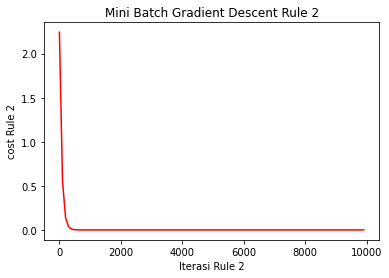

In [83]:
plt.xlabel("Iterasi Rule 2")
plt.ylabel("cost Rule 2")
plt.title("Mini Batch Gradient Descent Rule 2")
plt.plot(s_iterasi_rule2_list,s_cost_rule2_list, color='red', label='Eror')
plt.show()

In [84]:
s_cost_rule2

1.2823920090499073e-28

In [85]:
s_b0_rule2

-0.9192555017867157

In [86]:
s_bpoly_rule2 #hasil untuk x1 dan x2

array([0.68482669, 0.47073168, 0.80647253, 0.66132692])

In [87]:
data_rule_2

Age   TP   DB   AGR  Liver_Disease
2     62  7.0  4.1  0.89              2
3     58  6.8  0.4  1.00              2
4     72  7.3  2.0  0.40              2
9     62  6.4  3.0  0.90              2
48    58  7.2  0.5  1.00              2
49    58  7.2  0.5  1.00              2
51    57  6.5  0.4  0.60              2
52    57  5.6  0.7  0.80              2
76    60  7.1  1.9  0.80              2
77    60  7.3  2.8  0.78              2
78    60  6.8  3.2  0.70              2
79    60  7.4  4.0  0.60              2
80    60  7.0  2.7  0.70              2
81    60  6.8  2.4  0.70              2
101   66  7.1  2.1  0.40              2
106   66  5.5  1.3  0.40              2
122   60  5.4  2.7  0.50              2
126   55  6.2  3.6  0.60              2
129   60  6.8  4.0  0.80              2
130   72  6.2  0.8  0.93              2
145   60  6.0  1.1  0.53              2
157   70  6.1  0.3  0.68              2
172   70  5.7  0.5  1.10              2
214   60  6.0  0.8  0.80              2
226   57  7.0  2.3  1.30              2
233   74  7.9  0.3  1.00              2
261   75  6.2  3.6  1.00              2
262   75  6.4  1.2  0.80              2
263   75  6.1  0.8  0.90              2
264   75  5.9  0.4  0.70              2
268   70  5.6  1.6  0.50              2
270   60  5.6  1.3  0.50              2
273   70  6.1  0.4  0.80              2
325   65  7.1  2.7  0.70              2
332   55  6.7  3.9  0.70              2
342   73  5.5  0.7  0.50              2
372   65  5.7  0.5  0.35              2
381   66  5.3  0.3  0.60              2
410   67  7.2  1.1  0.70              2
412   55  7.2  1.6  0.60              2
413   70  6.0  1.2  0.60              2
429   60  6.7  0.3  0.80              2
433   62  8.6  0.9  0.80              2
434   55  7.1  2.9  0.40              2
451   73  6.5  0.9  0.80              2
460   64  7.2  0.5  0.50              2
468   90  6.9  0.3  0.70              2

In [88]:
X2=np.array(data_rule_2.iloc[::,:-1])
X2

array([[62.  ,  7.  ,  4.1 ,  0.89],
       [58.  ,  6.8 ,  0.4 ,  1.  ],
       [72.  ,  7.3 ,  2.  ,  0.4 ],
       [62.  ,  6.4 ,  3.  ,  0.9 ],
       [58.  ,  7.2 ,  0.5 ,  1.  ],
       [58.  ,  7.2 ,  0.5 ,  1.  ],
       [57.  ,  6.5 ,  0.4 ,  0.6 ],
       [57.  ,  5.6 ,  0.7 ,  0.8 ],
       [60.  ,  7.1 ,  1.9 ,  0.8 ],
       [60.  ,  7.3 ,  2.8 ,  0.78],
       [60.  ,  6.8 ,  3.2 ,  0.7 ],
       [60.  ,  7.4 ,  4.  ,  0.6 ],
       [60.  ,  7.  ,  2.7 ,  0.7 ],
       [60.  ,  6.8 ,  2.4 ,  0.7 ],
       [66.  ,  7.1 ,  2.1 ,  0.4 ],
       [66.  ,  5.5 ,  1.3 ,  0.4 ],
       [60.  ,  5.4 ,  2.7 ,  0.5 ],
       [55.  ,  6.2 ,  3.6 ,  0.6 ],
       [60.  ,  6.8 ,  4.  ,  0.8 ],
       [72.  ,  6.2 ,  0.8 ,  0.93],
       [60.  ,  6.  ,  1.1 ,  0.53],
       [70.  ,  6.1 ,  0.3 ,  0.68],
       [70.  ,  5.7 ,  0.5 ,  1.1 ],
       [60.  ,  6.  ,  0.8 ,  0.8 ],
       [57.  ,  7.  ,  2.3 ,  1.3 ],
       [74.  ,  7.9 ,  0.3 ,  1.  ],
       [75.  ,  6.2 ,  3.6 ,  1.  ],
 

In [89]:
Y2=np.array(data_rule_2.iloc[:,3])
Y2

array([0.89, 1.  , 0.4 , 0.9 , 1.  , 1.  , 0.6 , 0.8 , 0.8 , 0.78, 0.7 ,
       0.6 , 0.7 , 0.7 , 0.4 , 0.4 , 0.5 , 0.6 , 0.8 , 0.93, 0.53, 0.68,
       1.1 , 0.8 , 1.3 , 1.  , 1.  , 0.8 , 0.9 , 0.7 , 0.5 , 0.5 , 0.8 ,
       0.7 , 0.7 , 0.5 , 0.35, 0.6 , 0.7 , 0.6 , 0.6 , 0.8 , 0.8 , 0.4 ,
       0.8 , 0.5 , 0.7 ])

In [90]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X2_poly = poly_reg.fit_transform(X2)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X2_poly, Y2) 
# Proses Training Model
poly_reg.fit(X2, Y2) 

# Memprediksi hasil dengan regresi polynomial
# Memprediksi hasil dengan regresi polynomial
y2_pred=lin_reg_2.predict(poly_reg.fit_transform(X2))
y2_pred

data_rule_2['pred'] = y2_pred
data_rule_2

Age   TP   DB   AGR  Liver_Disease  pred
2     62  7.0  4.1  0.89              2  0.89
3     58  6.8  0.4  1.00              2  1.00
4     72  7.3  2.0  0.40              2  0.40
9     62  6.4  3.0  0.90              2  0.90
48    58  7.2  0.5  1.00              2  1.00
49    58  7.2  0.5  1.00              2  1.00
51    57  6.5  0.4  0.60              2  0.60
52    57  5.6  0.7  0.80              2  0.80
76    60  7.1  1.9  0.80              2  0.80
77    60  7.3  2.8  0.78              2  0.78
78    60  6.8  3.2  0.70              2  0.70
79    60  7.4  4.0  0.60              2  0.60
80    60  7.0  2.7  0.70              2  0.70
81    60  6.8  2.4  0.70              2  0.70
101   66  7.1  2.1  0.40              2  0.40
106   66  5.5  1.3  0.40              2  0.40
122   60  5.4  2.7  0.50              2  0.50
126   55  6.2  3.6  0.60              2  0.60
129   60  6.8  4.0  0.80              2  0.80
130   72  6.2  0.8  0.93              2  0.93
145   60  6.0  1.1  0.53              2  0.53
157   70  6.1  0.3  0.68              2  0.68
172   70  5.7  0.5  1.10              2  1.10
214   60  6.0  0.8  0.80              2  0.80
226   57  7.0  2.3  1.30              2  1.30
233   74  7.9  0.3  1.00              2  1.00
261   75  6.2  3.6  1.00              2  1.00
262   75  6.4  1.2  0.80              2  0.80
263   75  6.1  0.8  0.90              2  0.90
264   75  5.9  0.4  0.70              2  0.70
268   70  5.6  1.6  0.50              2  0.50
270   60  5.6  1.3  0.50              2  0.50
273   70  6.1  0.4  0.80              2  0.80
325   65  7.1  2.7  0.70              2  0.70
332   55  6.7  3.9  0.70              2  0.70
342   73  5.5  0.7  0.50              2  0.50
372   65  5.7  0.5  0.35              2  0.35
381   66  5.3  0.3  0.60              2  0.60
410   67  7.2  1.1  0.70              2  0.70
412   55  7.2  1.6  0.60              2  0.60
413   70  6.0  1.2  0.60              2  0.60
429   60  6.7  0.3  0.80              2  0.80
433   62  8.6  0.9  0.80              2  0.80
434   55  7.1  2.9  0.40              2  0.40
451   73  6.5  0.9  0.80              2  0.80
460   64  7.2  0.5  0.50              2  0.50
468   90  6.9  0.3  0.70              2  0.70

##Rule 3

In [91]:
rule_3 = df_fuzz[df_fuzz['Rule']==" Jika X1 Paruh baya dan X2 Normal dan X3 Menurun dan X4 Rendah maka Y Nonliver"]
index=rule_3.index
data_rule_3=df_fuzz.iloc[index,:5]
data_rule_3

Age   TP   DB   AGR  Liver_Disease
37    45  5.7  0.2  0.70              2
60    52  6.6  0.1  1.20              2
112   46  6.0  0.2  0.90              2
167   37  6.4  0.2  1.10              2
170   47  8.0  0.2  1.00              2
177   46  6.0  0.2  1.00              2
182   40  7.7  0.2  0.80              2
194   44  5.6  0.2  1.10              2
200   38  7.0  0.2  0.70              2
207   37  9.5  0.2  1.00              2
219   50  7.0  0.2  0.90              2
229   45  7.1  0.2  0.90              2
238   51  6.7  0.2  0.80              2
245   45  8.2  0.2  1.00              2
247   51  8.1  0.2  1.30              2
266   36  6.6  0.2  0.80              2
271   46  6.9  0.2  0.90              2
272   38  7.0  0.2  1.00              2
279   48  7.5  0.2  1.00              2
283   37  5.6  0.2  0.80              2
293   42  7.2  0.2  1.10              2
303   50  7.3  0.1  0.80              2
306   39  8.1  0.2  0.60              2
310   50  7.4  0.2  1.30              2
312   51  6.9  0.2  1.10              2
313   46  7.3  0.2  1.10              2
352   42  6.2  0.2  1.00              2
356   42  6.2  0.2  1.06              2
359   54  5.5  0.2  0.96              2
361   48  6.0  0.2  0.70              2
362   48  6.2  0.2  1.00              2
364   35  7.2  0.2  0.80              2
366   46  7.1  0.2  0.70              2
375   38  6.4  0.2  0.64              2
399   42  6.7  0.2  0.80              2
403   53  6.7  0.2  1.16              2
449   45  5.8  0.1  1.00              2
453   51  6.1  0.1  1.00              2
476   40  6.0  0.1  1.10              2
477   52  6.4  0.2  1.00              2

In [92]:
rule_3.to_csv('hasilrule3.csv') 

###Stochastic Gradient Descent

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [94]:
df_rule3=pd.read_csv('hasilrule3.csv',sep=',')
df_rule3

Unnamed: 0  Age   TP   DB   AGR  Liver_Disease    Age_fuzz TP_fuzz  \
0           37   45  5.7  0.2  0.70              2  Paruh baya  Normal   
1           60   52  6.6  0.1  1.20              2  Paruh baya  Normal   
2          112   46  6.0  0.2  0.90              2  Paruh baya  Normal   
3          167   37  6.4  0.2  1.10              2  Paruh baya  Normal   
4          170   47  8.0  0.2  1.00              2  Paruh baya  Normal   
5          177   46  6.0  0.2  1.00              2  Paruh baya  Normal   
6          182   40  7.7  0.2  0.80              2  Paruh baya  Normal   
7          194   44  5.6  0.2  1.10              2  Paruh baya  Normal   
8          200   38  7.0  0.2  0.70              2  Paruh baya  Normal   
9          207   37  9.5  0.2  1.00              2  Paruh baya  Normal   
10         219   50  7.0  0.2  0.90              2  Paruh baya  Normal   
11         229   45  7.1  0.2  0.90              2  Paruh baya  Normal   
12         238   51  6.7  0.2  0.80              2  Paruh baya  Normal   
13         245   45  8.2  0.2  1.00              2  Paruh baya  Normal   
14         247   51  8.1  0.2  1.30              2  Paruh baya  Normal   
15         266   36  6.6  0.2  0.80              2  Paruh baya  Normal   
16         271   46  6.9  0.2  0.90              2  Paruh baya  Normal   
17         272   38  7.0  0.2  1.00              2  Paruh baya  Normal   
18         279   48  7.5  0.2  1.00              2  Paruh baya  Normal   
19         283   37  5.6  0.2  0.80              2  Paruh baya  Normal   
20         293   42  7.2  0.2  1.10              2  Paruh baya  Normal   
21         303   50  7.3  0.1  0.80              2  Paruh baya  Normal   
22         306   39  8.1  0.2  0.60              2  Paruh baya  Normal   
23         310   50  7.4  0.2  1.30              2  Paruh baya  Normal   
24         312   51  6.9  0.2  1.10              2  Paruh baya  Normal   
25         313   46  7.3  0.2  1.10              2  Paruh baya  Normal   
26         352   42  6.2  0.2  1.00              2  Paruh baya  Normal   
27         356   42  6.2  0.2  1.06              2  Paruh baya  Normal   
28         359   54  5.5  0.2  0.96              2  Paruh baya  Normal   
29         361   48  6.0  0.2  0.70              2  Paruh baya  Normal   
30         362   48  6.2  0.2  1.00              2  Paruh baya  Normal   
31         364   35  7.2  0.2  0.80              2  Paruh baya  Normal   
32         366   46  7.1  0.2  0.70              2  Paruh baya  Normal   
33         375   38  6.4  0.2  0.64              2  Paruh baya  Normal   
34         399   42  6.7  0.2  0.80              2  Paruh baya  Normal   
35         403   53  6.7  0.2  1.16              2  Paruh baya  Normal   
36         449   45  5.8  0.1  1.00              2  Paruh baya  Normal   
37         453   51  6.1  0.1  1.00              2  Paruh baya  Normal   
38         476   40  6.0  0.1  1.10              2  Paruh baya  Normal   
39         477   52  6.4  0.2  1.00              2  Paruh baya  Normal   

    DB_fuzz AGR_fuzz Liver_Disease_fuzz  miu_Age        miu_TP  miu_DB  \
0   Menurun   Rendah           Nonliver      1.0  0.000000e+00     0.0   
1   Menurun   Rendah           Nonliver      0.3  2.960595e-15     0.0   
2   Menurun   Rendah           Nonliver      0.9  2.960595e-15     0.0   
3   Menurun   Rendah           Nonliver      0.2  2.960595e-15     0.0   
4   Menurun   Rendah           Nonliver      0.8  2.727273e-01     0.0   
5   Menurun   Rendah           Nonliver      0.9  2.960595e-15     0.0   
6   Menurun   Rendah           Nonliver      0.5  8.333333e-01     0.0   
7   Menurun   Rendah           Nonliver      0.9  0.000000e+00     0.0   
8   Menurun   Rendah           Nonliver      0.3  8.333333e-01     0.0   
9   Menurun   Rendah           Nonliver      0.2  0.000000e+00     0.0   
10  Menurun   Rendah           Nonliver      0.5  8.333333e-01     0.0   
11  Menurun   Rendah           Nonliver      1.0  8.333333e-01     0.0   
12  Men

In [95]:
df_rule3=df_rule3.drop(columns=['Unnamed: 0'])
df_rule3

Age   TP   DB   AGR  Liver_Disease    Age_fuzz TP_fuzz  DB_fuzz AGR_fuzz  \
0    45  5.7  0.2  0.70              2  Paruh baya  Normal  Menurun   Rendah   
1    52  6.6  0.1  1.20              2  Paruh baya  Normal  Menurun   Rendah   
2    46  6.0  0.2  0.90              2  Paruh baya  Normal  Menurun   Rendah   
3    37  6.4  0.2  1.10              2  Paruh baya  Normal  Menurun   Rendah   
4    47  8.0  0.2  1.00              2  Paruh baya  Normal  Menurun   Rendah   
5    46  6.0  0.2  1.00              2  Paruh baya  Normal  Menurun   Rendah   
6    40  7.7  0.2  0.80              2  Paruh baya  Normal  Menurun   Rendah   
7    44  5.6  0.2  1.10              2  Paruh baya  Normal  Menurun   Rendah   
8    38  7.0  0.2  0.70              2  Paruh baya  Normal  Menurun   Rendah   
9    37  9.5  0.2  1.00              2  Paruh baya  Normal  Menurun   Rendah   
10   50  7.0  0.2  0.90              2  Paruh baya  Normal  Menurun   Rendah   
11   45  7.1  0.2  0.90              2  Paruh baya  Normal  Menurun   Rendah   
12   51  6.7  0.2  0.80              2  Paruh baya  Normal  Menurun   Rendah   
13   45  8.2  0.2  1.00              2  Paruh baya  Normal  Menurun   Rendah   
14   51  8.1  0.2  1.30              2  Paruh baya  Normal  Menurun   Rendah   
15   36  6.6  0.2  0.80              2  Paruh baya  Normal  Menurun   Rendah   
16   46  6.9  0.2  0.90              2  Paruh baya  Normal  Menurun   Rendah   
17   38  7.0  0.2  1.00              2  Paruh baya  Normal  Menurun   Rendah   
18   48  7.5  0.2  1.00              2  Paruh baya  Normal  Menurun   Rendah   
19   37  5.6  0.2  0.80              2  Paruh baya  Normal  Menurun   Rendah   
20   42  7.2  0.2  1.10              2  Paruh baya  Normal  Menurun   Rendah   
21   50  7.3  0.1  0.80              2  Paruh baya  Normal  Menurun   Rendah   
22   39  8.1  0.2  0.60              2  Paruh baya  Normal  Menurun   Rendah   
23   50  7.4  0.2  1.30              2  Paruh baya  Normal  Menurun   Rendah   
24   51  6.9  0.2  1.10              2  Paruh baya  Normal  Menurun   Rendah   
25   46  7.3  0.2  1.10              2  Paruh baya  Normal  Menurun   Rendah   
26   42  6.2  0.2  1.00              2  Paruh baya  Normal  Menurun   Rendah   
27   42  6.2  0.2  1.06              2  Paruh baya  Normal  Menurun   Rendah   
28   54  5.5  0.2  0.96              2  Paruh baya  Normal  Menurun   Rendah   
29   48  6.0  0.2  0.70              2  Paruh baya  Normal  Menurun   Rendah   
30   48  6.2  0.2  1.00              2  Paruh baya  Normal  Menurun   Rendah   
31   35  7.2  0.2  0.80              2  Paruh baya  Normal  Menurun   Rendah   
32   46  7.1  0.2  0.70              2  Paruh baya  Normal  Menurun   Rendah   
33   38  6.4  0.2  0.64              2  Paruh baya  Normal  Menurun   Rendah   
34   42  6.7  0.2  0.80              2  Paruh baya  Normal  Menurun   Rendah   
35   53  6.7  0.2  1.16              2  Paruh baya  Normal  Menurun   Rendah   
36   45  5.8  0.1  1.00              2  Paruh baya  Normal  Menurun   Rendah   
37   51  6.1  0.1  1.00              2  Paruh baya  Normal  Menurun   Rendah   
38   40  6.0  0.1  1.10              2  Paruh baya  Normal  Menurun   Rendah   
39   52  6.4  0.2  1.00              2  Paruh baya  Normal  Menurun   Rendah   

   Liver_Disease_fuzz  miu_Age        miu_TP  miu_DB   miu_AGR  \
0            Nonliver      1.0  0.000000e+00     0.0  0.000000   
1            Nonliver      0.3  2.960595e-15     0.0  0.833333   
2            Nonliver      0.9  2.960595e-15     0.0  0.000000   
3            Nonliver      0.2  2.960595e-15     0.0  0.833333   
4            Nonliver      0.8  2.727273e-01     0.0  0.833333   
5            Nonliver      0.9  2.960595e-15     0.0  0.833333   
6            Nonliver      0.5  8.333333e-01     0.0  0.000000   
7            Nonliver      0.9  0.000000e+00     0.0  0.833333   
8            Nonliver      0.3  8.333333e-01     0.0  0.000000   
9            Nonliver      0.2  0.000000e+00     0.0  0.833333 

In [96]:
from sklearn import preprocessing
sx3 = preprocessing.MinMaxScaler()
sy3 = preprocessing.MinMaxScaler()

scaled_X3 = sx3.fit_transform(data_rule_3.drop('Liver_Disease',axis='columns'))
scaled_y3 = sy3.fit_transform(data_rule_3['Liver_Disease'].values.reshape(rule_3.shape[0],1))

scaled_X3

array([[0.52631579, 0.05      , 1.        , 0.14285714],
       [0.89473684, 0.275     , 0.        , 0.85714286],
       [0.57894737, 0.125     , 1.        , 0.42857143],
       [0.10526316, 0.225     , 1.        , 0.71428571],
       [0.63157895, 0.625     , 1.        , 0.57142857],
       [0.57894737, 0.125     , 1.        , 0.57142857],
       [0.26315789, 0.55      , 1.        , 0.28571429],
       [0.47368421, 0.025     , 1.        , 0.71428571],
       [0.15789474, 0.375     , 1.        , 0.14285714],
       [0.10526316, 1.        , 1.        , 0.57142857],
       [0.78947368, 0.375     , 1.        , 0.42857143],
       [0.52631579, 0.4       , 1.        , 0.42857143],
       [0.84210526, 0.3       , 1.        , 0.28571429],
       [0.52631579, 0.675     , 1.        , 0.57142857],
       [0.84210526, 0.65      , 1.        , 1.        ],
       [0.05263158, 0.275     , 1.        , 0.28571429],
       [0.57894737, 0.35      , 1.        , 0.42857143],
       [0.15789474, 0.375     ,

In [97]:
scaled_y3_reshape=scaled_y3.reshape(scaled_y3.shape[0],)
scaled_y3_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [98]:
def stochastic_gradient_descent_rule3(X3, y3, iterasi, learning_rate = 0.1):

    jumlah_variabel_rule3 = X3.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule3 = np.ones(shape=(jumlah_variabel_rule3))       # b1, b2, ... b(jumlah variabel)
    b0_rule3 = 0                                         # b0 atau bias
    n = X3.shape[0]                                 # jumlah baris data X
    
    cost_rule3_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule3_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule3_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_index = np.random.RandomState(seed=42).randint(0, n-1)      # Memilih indeks data random untuk update parameter
        sample_x3 = X3[random_index]
        sample_y3 = y3[random_index]
        
        y3_pred = np.dot(bpoly_rule3, sample_x3.T) + b0_rule3                  # Menghitung y_pred pada setiap iterasi
        
        bpoly_rule3_grad = -(2/n)*(sample_x3.T.dot(sample_y3-y3_pred))    # Menghitung perubahan/gradien bpoly setiap iterasi
        b0_rule3_grad = -(2/n)*np.sum(sample_y3-y3_pred)                 # Menghitung perubahan/gradien b0 setiap iterasi
        bpoly_rule3 = bpoly_rule3 - learning_rate * bpoly_rule3_grad               # Memperbaharui bpoly setiap iterasi
        b0_rule3 = b0_rule3 - learning_rate * b0_rule3_grad                        # Memperbaharui bpoly setiap iterasi
        
        # Menyimpan parameter b dalam list tunggal
        bp=[]
        for jv_rule3 in range(jumlah_variabel_rule3):
            bp_rule3=bpoly_rule3[jv_rule3]
            bp.append(bp_rule3)
        b_rule3=[b0_rule3]+bp
        
        cost_rule3 = np.mean(np.square(sample_y3-y3_pred))        # MSE (Mean Squared Error)
        
        if i%100==0:                                      # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule3_list.append(cost_rule3)                        # Menyimpan nilai cost setiap iterasi
            iterasi_rule3_list.append(i)                        # Menyimpan nilai iterasi setiap iterasi
            b_rule3_list.append(b_rule3)                              # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule3, b0_rule3, cost_rule3, b_rule3_list, cost_rule3_list, iterasi_rule3_list  # Output

In [99]:
import time
mulai_rule3 = time.time()
s_bpoly_rule3, s_b0_rule3, s_cost_rule3, s_b_rule3_list, s_cost_rule3_list, s_iterasi_rule3_list=stochastic_gradient_descent_rule3 (scaled_X3, 
                                                                                                                                        scaled_y3_reshape,
                                                                                                                                        iterasi=10000,
                                                                                                                                        learning_rate = 0.1)
selesai_rule3 = time.time()
waktu_komputasi_rule3 = (selesai_rule3 - mulai_rule3)
print("Waktu Komputasi Rule 3: ",waktu_komputasi_rule3)

Waktu Komputasi Rule 3:  3.473158836364746


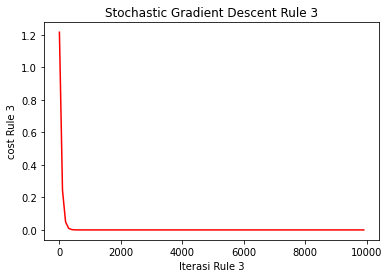

In [100]:
plt.xlabel("Iterasi Rule 3")
plt.ylabel("cost Rule 3")
plt.title("Stochastic Gradient Descent Rule 3")
plt.plot(s_iterasi_rule3_list,s_cost_rule3_list, color='red', label='Eror')
plt.show()

In [101]:
s_cost_rule3

1.232595164407831e-28

In [102]:
s_b0_rule3

-0.6911520474475039

In [103]:
s_bpoly_rule3 #hasil untuk x1 dan x2

array([0.81811788, 0.91360599, 1.        , 0.50631997])

In [104]:
data_rule_3

Age   TP   DB   AGR  Liver_Disease
37    45  5.7  0.2  0.70              2
60    52  6.6  0.1  1.20              2
112   46  6.0  0.2  0.90              2
167   37  6.4  0.2  1.10              2
170   47  8.0  0.2  1.00              2
177   46  6.0  0.2  1.00              2
182   40  7.7  0.2  0.80              2
194   44  5.6  0.2  1.10              2
200   38  7.0  0.2  0.70              2
207   37  9.5  0.2  1.00              2
219   50  7.0  0.2  0.90              2
229   45  7.1  0.2  0.90              2
238   51  6.7  0.2  0.80              2
245   45  8.2  0.2  1.00              2
247   51  8.1  0.2  1.30              2
266   36  6.6  0.2  0.80              2
271   46  6.9  0.2  0.90              2
272   38  7.0  0.2  1.00              2
279   48  7.5  0.2  1.00              2
283   37  5.6  0.2  0.80              2
293   42  7.2  0.2  1.10              2
303   50  7.3  0.1  0.80              2
306   39  8.1  0.2  0.60              2
310   50  7.4  0.2  1.30              2
312   51  6.9  0.2  1.10              2
313   46  7.3  0.2  1.10              2
352   42  6.2  0.2  1.00              2
356   42  6.2  0.2  1.06              2
359   54  5.5  0.2  0.96              2
361   48  6.0  0.2  0.70              2
362   48  6.2  0.2  1.00              2
364   35  7.2  0.2  0.80              2
366   46  7.1  0.2  0.70              2
375   38  6.4  0.2  0.64              2
399   42  6.7  0.2  0.80              2
403   53  6.7  0.2  1.16              2
449   45  5.8  0.1  1.00              2
453   51  6.1  0.1  1.00              2
476   40  6.0  0.1  1.10              2
477   52  6.4  0.2  1.00              2

In [105]:
X3=np.array(data_rule_3.iloc[::,:-1])
X3

array([[45.  ,  5.7 ,  0.2 ,  0.7 ],
       [52.  ,  6.6 ,  0.1 ,  1.2 ],
       [46.  ,  6.  ,  0.2 ,  0.9 ],
       [37.  ,  6.4 ,  0.2 ,  1.1 ],
       [47.  ,  8.  ,  0.2 ,  1.  ],
       [46.  ,  6.  ,  0.2 ,  1.  ],
       [40.  ,  7.7 ,  0.2 ,  0.8 ],
       [44.  ,  5.6 ,  0.2 ,  1.1 ],
       [38.  ,  7.  ,  0.2 ,  0.7 ],
       [37.  ,  9.5 ,  0.2 ,  1.  ],
       [50.  ,  7.  ,  0.2 ,  0.9 ],
       [45.  ,  7.1 ,  0.2 ,  0.9 ],
       [51.  ,  6.7 ,  0.2 ,  0.8 ],
       [45.  ,  8.2 ,  0.2 ,  1.  ],
       [51.  ,  8.1 ,  0.2 ,  1.3 ],
       [36.  ,  6.6 ,  0.2 ,  0.8 ],
       [46.  ,  6.9 ,  0.2 ,  0.9 ],
       [38.  ,  7.  ,  0.2 ,  1.  ],
       [48.  ,  7.5 ,  0.2 ,  1.  ],
       [37.  ,  5.6 ,  0.2 ,  0.8 ],
       [42.  ,  7.2 ,  0.2 ,  1.1 ],
       [50.  ,  7.3 ,  0.1 ,  0.8 ],
       [39.  ,  8.1 ,  0.2 ,  0.6 ],
       [50.  ,  7.4 ,  0.2 ,  1.3 ],
       [51.  ,  6.9 ,  0.2 ,  1.1 ],
       [46.  ,  7.3 ,  0.2 ,  1.1 ],
       [42.  ,  6.2 ,  0.2 ,  1.  ],
 

In [106]:
Y3=np.array(data_rule_3.iloc[:,3])
Y3

array([0.7 , 1.2 , 0.9 , 1.1 , 1.  , 1.  , 0.8 , 1.1 , 0.7 , 1.  , 0.9 ,
       0.9 , 0.8 , 1.  , 1.3 , 0.8 , 0.9 , 1.  , 1.  , 0.8 , 1.1 , 0.8 ,
       0.6 , 1.3 , 1.1 , 1.1 , 1.  , 1.06, 0.96, 0.7 , 1.  , 0.8 , 0.7 ,
       0.64, 0.8 , 1.16, 1.  , 1.  , 1.1 , 1.  ])

In [107]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X3_poly = poly_reg.fit_transform(X3)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X3_poly, Y3) 
# Proses Training Model
poly_reg.fit(X3, Y3) 

# Memprediksi hasil dengan regresi polynomial
y3_pred=lin_reg_2.predict(poly_reg.fit_transform(X3))
y3_pred

data_rule_3['pred'] = y3_pred
data_rule_3

Age   TP   DB   AGR  Liver_Disease  pred
37    45  5.7  0.2  0.70              2  0.70
60    52  6.6  0.1  1.20              2  1.20
112   46  6.0  0.2  0.90              2  0.90
167   37  6.4  0.2  1.10              2  1.10
170   47  8.0  0.2  1.00              2  1.00
177   46  6.0  0.2  1.00              2  1.00
182   40  7.7  0.2  0.80              2  0.80
194   44  5.6  0.2  1.10              2  1.10
200   38  7.0  0.2  0.70              2  0.70
207   37  9.5  0.2  1.00              2  1.00
219   50  7.0  0.2  0.90              2  0.90
229   45  7.1  0.2  0.90              2  0.90
238   51  6.7  0.2  0.80              2  0.80
245   45  8.2  0.2  1.00              2  1.00
247   51  8.1  0.2  1.30              2  1.30
266   36  6.6  0.2  0.80              2  0.80
271   46  6.9  0.2  0.90              2  0.90
272   38  7.0  0.2  1.00              2  1.00
279   48  7.5  0.2  1.00              2  1.00
283   37  5.6  0.2  0.80              2  0.80
293   42  7.2  0.2  1.10              2  1.10
303   50  7.3  0.1  0.80              2  0.80
306   39  8.1  0.2  0.60              2  0.60
310   50  7.4  0.2  1.30              2  1.30
312   51  6.9  0.2  1.10              2  1.10
313   46  7.3  0.2  1.10              2  1.10
352   42  6.2  0.2  1.00              2  1.00
356   42  6.2  0.2  1.06              2  1.06
359   54  5.5  0.2  0.96              2  0.96
361   48  6.0  0.2  0.70              2  0.70
362   48  6.2  0.2  1.00              2  1.00
364   35  7.2  0.2  0.80              2  0.80
366   46  7.1  0.2  0.70              2  0.70
375   38  6.4  0.2  0.64              2  0.64
399   42  6.7  0.2  0.80              2  0.80
403   53  6.7  0.2  1.16              2  1.16
449   45  5.8  0.1  1.00              2  1.00
453   51  6.1  0.1  1.00              2  1.00
476   40  6.0  0.1  1.10              2  1.10
477   52  6.4  0.2  1.00              2  1.00

##Rule 4

In [108]:
rule_4 = df_fuzz[df_fuzz['Rule']==" Jika X1 Muda dan X2 Normal dan X3 Normal dan X4 Rendah maka Y Nonliver"]
index=rule_4.index
data_rule_4=df_fuzz.iloc[index,:5]
data_rule_4

Age   TP   DB   AGR  Liver_Disease
7     29  6.7  0.3  1.10              2
14    34  7.2  3.0  1.20              2
22    30  6.9  0.4  0.90              2
70    33  5.4  1.0  1.25              2
102   30  5.6  0.4  0.90              2
103   30  5.6  0.4  0.90              2
114   34  5.6  2.5  0.90              2
115   34  5.8  4.0  0.70              2
116   32  6.2  0.3  1.00              2
174   26  8.0  0.4  1.00              2
181   33  6.2  1.4  0.90              2
187   33  7.0  0.3  0.70              2
188   33  6.5  1.3  0.80              2
189   33  5.9  0.8  0.80              2
211   33  8.0  0.8  1.00              2
221   18  8.0  0.3  1.00              2
222   13  7.9  0.5  0.90              2
231   22  8.3  1.0  1.10              2
235   31  7.9  0.3  0.90              2
250   26  7.8  0.9  1.20              2
255   26  6.1  0.9  0.80              2
256   26  5.4  0.6  0.60              2
257   26  6.2  3.3  0.80              2
282   33  6.8  0.7  0.70              2
309   34  6.5  2.1  0.70              2
349   23  6.2  0.3  1.00              2
373   22  5.5  1.0  0.80              2
391   33  6.9  3.7  1.09              2
392   33  7.3  1.6  0.70              2
398   22  6.2  3.2  0.80              2
466   16  7.1  4.1  1.20              2
467   16  5.4  1.2  0.90              2
470   32  6.2  1.6  0.40              2
478   31  6.8  0.5  1.00              2

In [109]:
rule_4.to_csv('hasilrule4.csv') 

###Stochastic Gradient Descent

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [111]:
df_rule4=pd.read_csv('hasilrule4.csv',sep=',')
df_rule4

Unnamed: 0  Age   TP   DB   AGR  Liver_Disease Age_fuzz TP_fuzz DB_fuzz  \
0            7   29  6.7  0.3  1.10              2     Muda  Normal  Normal   
1           14   34  7.2  3.0  1.20              2     Muda  Normal  Normal   
2           22   30  6.9  0.4  0.90              2     Muda  Normal  Normal   
3           70   33  5.4  1.0  1.25              2     Muda  Normal  Normal   
4          102   30  5.6  0.4  0.90              2     Muda  Normal  Normal   
5          103   30  5.6  0.4  0.90              2     Muda  Normal  Normal   
6          114   34  5.6  2.5  0.90              2     Muda  Normal  Normal   
7          115   34  5.8  4.0  0.70              2     Muda  Normal  Normal   
8          116   32  6.2  0.3  1.00              2     Muda  Normal  Normal   
9          174   26  8.0  0.4  1.00              2     Muda  Normal  Normal   
10         181   33  6.2  1.4  0.90              2     Muda  Normal  Normal   
11         187   33  7.0  0.3  0.70              2     Muda  Normal  Normal   
12         188   33  6.5  1.3  0.80              2     Muda  Normal  Normal   
13         189   33  5.9  0.8  0.80              2     Muda  Normal  Normal   
14         211   33  8.0  0.8  1.00              2     Muda  Normal  Normal   
15         221   18  8.0  0.3  1.00              2     Muda  Normal  Normal   
16         222   13  7.9  0.5  0.90              2     Muda  Normal  Normal   
17         231   22  8.3  1.0  1.10              2     Muda  Normal  Normal   
18         235   31  7.9  0.3  0.90              2     Muda  Normal  Normal   
19         250   26  7.8  0.9  1.20              2     Muda  Normal  Normal   
20         255   26  6.1  0.9  0.80              2     Muda  Normal  Normal   
21         256   26  5.4  0.6  0.60              2     Muda  Normal  Normal   
22         257   26  6.2  3.3  0.80              2     Muda  Normal  Normal   
23         282   33  6.8  0.7  0.70              2     Muda  Normal  Normal   
24         309   34  6.5  2.1  0.70              2     Muda  Normal  Normal   
25         349   23  6.2  0.3  1.00              2     Muda  Normal  Normal   
26         373   22  5.5  1.0  0.80              2     Muda  Normal  Normal   
27         391   33  6.9  3.7  1.09              2     Muda  Normal  Normal   
28         392   33  7.3  1.6  0.70              2     Muda  Normal  Normal   
29         398   22  6.2  3.2  0.80              2     Muda  Normal  Normal   
30         466   16  7.1  4.1  1.20              2     Muda  Normal  Normal   
31         467   16  5.4  1.2  0.90              2     Muda  Normal  Normal   
32         470   32  6.2  1.6  0.40              2     Muda  Normal  Normal   
33         478   31  6.8  0.5  1.00              2     Muda  Normal  Normal   

   AGR_fuzz Liver_Disease_fuzz   miu_Age        miu_TP  miu_DB   miu_AGR  \
0    Rendah           Nonliver  0.461538  2.960595e-15     0.0  0.833333   
1    Rendah           Nonliver  0.076923  8.333333e-01     0.0  0.833333   
2    Rendah           Nonliver  0.384615  2.960595e-15     0.0  0.000000   
3    Rendah           Nonliver  0.153846  0.000000e+00     0.5  0.833333   
4    Rendah           Nonliver  0.384615  0.000000e+00     0.0  0.000000   
5    Rendah           Nonliver  0.384615  0.000000e+00     0.0  0.000000   
6    Rendah           Nonliver  0.076923  0.000000e+00     0.0  0.000000   
7    Rendah           Nonliver  0.076923  0.000000e+00     0.0  0.000000   
8    Rendah           Nonliver  0.230769  2.960595e-15     0.0  0.833333   
9    Rendah           Nonliver  0.692308  2.727273e-01     0.0  0.833333   
10   Rendah           Nonliver  0.153846  2.960595e-15     0.5  0.000000   
11   Rendah           Nonliver  0.153846  8.333333e-01     0.0  0.000000   
12   Rendah           Nonliver  0.153846  2.960595e-15     0.5  0.000000   
13   Rendah           Nonliver  0.153846  0.000000e+00     0.0  0.000000   
14   Rendah           Nonliver  0.153846  2.727273e-01     0.0  0.833333   
15   Rendah           

In [112]:
df_rule4=df_rule4.drop(columns=['Unnamed: 0'])
df_rule4

Age   TP   DB   AGR  Liver_Disease Age_fuzz TP_fuzz DB_fuzz AGR_fuzz  \
0    29  6.7  0.3  1.10              2     Muda  Normal  Normal   Rendah   
1    34  7.2  3.0  1.20              2     Muda  Normal  Normal   Rendah   
2    30  6.9  0.4  0.90              2     Muda  Normal  Normal   Rendah   
3    33  5.4  1.0  1.25              2     Muda  Normal  Normal   Rendah   
4    30  5.6  0.4  0.90              2     Muda  Normal  Normal   Rendah   
5    30  5.6  0.4  0.90              2     Muda  Normal  Normal   Rendah   
6    34  5.6  2.5  0.90              2     Muda  Normal  Normal   Rendah   
7    34  5.8  4.0  0.70              2     Muda  Normal  Normal   Rendah   
8    32  6.2  0.3  1.00              2     Muda  Normal  Normal   Rendah   
9    26  8.0  0.4  1.00              2     Muda  Normal  Normal   Rendah   
10   33  6.2  1.4  0.90              2     Muda  Normal  Normal   Rendah   
11   33  7.0  0.3  0.70              2     Muda  Normal  Normal   Rendah   
12   33  6.5  1.3  0.80              2     Muda  Normal  Normal   Rendah   
13   33  5.9  0.8  0.80              2     Muda  Normal  Normal   Rendah   
14   33  8.0  0.8  1.00              2     Muda  Normal  Normal   Rendah   
15   18  8.0  0.3  1.00              2     Muda  Normal  Normal   Rendah   
16   13  7.9  0.5  0.90              2     Muda  Normal  Normal   Rendah   
17   22  8.3  1.0  1.10              2     Muda  Normal  Normal   Rendah   
18   31  7.9  0.3  0.90              2     Muda  Normal  Normal   Rendah   
19   26  7.8  0.9  1.20              2     Muda  Normal  Normal   Rendah   
20   26  6.1  0.9  0.80              2     Muda  Normal  Normal   Rendah   
21   26  5.4  0.6  0.60              2     Muda  Normal  Normal   Rendah   
22   26  6.2  3.3  0.80              2     Muda  Normal  Normal   Rendah   
23   33  6.8  0.7  0.70              2     Muda  Normal  Normal   Rendah   
24   34  6.5  2.1  0.70              2     Muda  Normal  Normal   Rendah   
25   23  6.2  0.3  1.00              2     Muda  Normal  Normal   Rendah   
26   22  5.5  1.0  0.80              2     Muda  Normal  Normal   Rendah   
27   33  6.9  3.7  1.09              2     Muda  Normal  Normal   Rendah   
28   33  7.3  1.6  0.70              2     Muda  Normal  Normal   Rendah   
29   22  6.2  3.2  0.80              2     Muda  Normal  Normal   Rendah   
30   16  7.1  4.1  1.20              2     Muda  Normal  Normal   Rendah   
31   16  5.4  1.2  0.90              2     Muda  Normal  Normal   Rendah   
32   32  6.2  1.6  0.40              2     Muda  Normal  Normal   Rendah   
33   31  6.8  0.5  1.00              2     Muda  Normal  Normal   Rendah   

   Liver_Disease_fuzz   miu_Age        miu_TP  miu_DB   miu_AGR  \
0            Nonliver  0.461538  2.960595e-15     0.0  0.833333   
1            Nonliver  0.076923  8.333333e-01     0.0  0.833333   
2            Nonliver  0.384615  2.960595e-15     0.0  0.000000   
3            Nonliver  0.153846  0.000000e+00     0.5  0.833333   
4            Nonliver  0.384615  0.000000e+00     0.0  0.000000   
5            Nonliver  0.384615  0.000000e+00     0.0  0.000000   
6            Nonliver  0.076923  0.000000e+00     0.0  0.000000   
7            Nonliver  0.076923  0.000000e+00     0.0  0.000000   
8            Nonliver  0.230769  2.960595e-15     0.0  0.833333   
9            Nonliver  0.692308  2.727273e-01     0.0  0.833333   
10           Nonliver  0.153846  2.960595e-15     0.5  0.000000   
11           Nonliver  0.153846  8.333333e-01     0.0  0.000000   
12           Nonliver  0.153846  2.960595e-15     0.5  0.000000   
13           Nonliver  0.153846  0.000000e+00     0.0  0.000000   
14           Nonliver  0.153846  2.727273e-01     0.0  0.833333   
15           Nonliver  0.666667  2.727273e-01     0.0  0.833333   
16           Nonliver  0.250000  8.333333e-01     0.0  0.000000   
17           Nonliver  1.000000  2.727273e-01     0.5  0.833333   
18           Nonliver  0.307692  8.333333e-01     0.0  0.000000   
19 

In [113]:
from sklearn import preprocessing
sx4 = preprocessing.MinMaxScaler()
sy4 = preprocessing.MinMaxScaler()

scaled_X4 = sx4.fit_transform(data_rule_4.drop('Liver_Disease',axis='columns'))
scaled_y4 = sy4.fit_transform(data_rule_4['Liver_Disease'].values.reshape(rule_4.shape[0],1))

scaled_X4

array([[0.76190476, 0.44827586, 0.        , 0.82352941],
       [1.        , 0.62068966, 0.71052632, 0.94117647],
       [0.80952381, 0.51724138, 0.02631579, 0.58823529],
       [0.95238095, 0.        , 0.18421053, 1.        ],
       [0.80952381, 0.06896552, 0.02631579, 0.58823529],
       [0.80952381, 0.06896552, 0.02631579, 0.58823529],
       [1.        , 0.06896552, 0.57894737, 0.58823529],
       [1.        , 0.13793103, 0.97368421, 0.35294118],
       [0.9047619 , 0.27586207, 0.        , 0.70588235],
       [0.61904762, 0.89655172, 0.02631579, 0.70588235],
       [0.95238095, 0.27586207, 0.28947368, 0.58823529],
       [0.95238095, 0.55172414, 0.        , 0.35294118],
       [0.95238095, 0.37931034, 0.26315789, 0.47058824],
       [0.95238095, 0.17241379, 0.13157895, 0.47058824],
       [0.95238095, 0.89655172, 0.13157895, 0.70588235],
       [0.23809524, 0.89655172, 0.        , 0.70588235],
       [0.        , 0.86206897, 0.05263158, 0.58823529],
       [0.42857143, 1.        ,

In [114]:
scaled_y4_reshape=scaled_y4.reshape(scaled_y4.shape[0],)
scaled_y4_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [115]:
def stochastic_gradient_descent_rule4(X4, y4, iterasi, learning_rate = 0.1):

    jumlah_variabel_rule4 = X4.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule4 = np.ones(shape=(jumlah_variabel_rule4))       # b1, b2, ... b(jumlah variabel)
    b0_rule4 = 0                                         # b0 atau bias
    n = X4.shape[0]                                 # jumlah baris data X
    
    cost_rule4_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule4_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule4_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_index = np.random.RandomState(seed=42).randint(0, n-1)      # Memilih indeks data random untuk update parameter
        sample_x4 = X4[random_index]
        sample_y4 = y4[random_index]
        
        y4_pred = np.dot(bpoly_rule4, sample_x4.T) + b0_rule4                  # Menghitung y_pred pada setiap iterasi
        
        bpoly_rule4_grad = -(2/n)*(sample_x4.T.dot(sample_y4-y4_pred))    # Menghitung perubahan/gradien bpoly setiap iterasi
        b0_rule4_grad = -(2/n)*np.sum(sample_y4-y4_pred)                 # Menghitung perubahan/gradien b0 setiap iterasi
        bpoly_rule4 = bpoly_rule4 - learning_rate * bpoly_rule4_grad               # Memperbaharui bpoly setiap iterasi
        b0_rule4 = b0_rule4 - learning_rate * b0_rule4_grad                        # Memperbaharui bpoly setiap iterasi
        
        # Menyimpan parameter b dalam list tunggal
        bp=[]
        for jv_rule4 in range(jumlah_variabel_rule4):
            bp_rule4=bpoly_rule4[jv_rule4]
            bp.append(bp_rule4)
        b_rule4=[b0_rule4]+bp
        
        cost_rule4 = np.mean(np.square(sample_y4-y4_pred))        # MSE (Mean Squared Error)
        
        if i%100==0:                                      # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule4_list.append(cost_rule4)                        # Menyimpan nilai cost setiap iterasi
            iterasi_rule4_list.append(i)                        # Menyimpan nilai iterasi setiap iterasi
            b_rule4_list.append(b_rule4)                              # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule4, b0_rule4, cost_rule4, b_rule4_list, cost_rule4_list, iterasi_rule4_list  # Output

In [116]:
import time
mulai_rule4 = time.time()
s_bpoly_rule4, s_b0_rule4, s_cost_rule4, s_b_rule4_list, s_cost_rule4_list, s_iterasi_rule4_list=stochastic_gradient_descent_rule4 (scaled_X4, 
                                                                                                                                    scaled_y4_reshape,
                                                                                                                                    iterasi=10000,
                                                                                                                                    learning_rate = 0.1)
selesai_rule4 = time.time()
waktu_komputasi_rule4 = (selesai_rule4 - mulai_rule4)
print("Waktu Komputasi Rule 4: ",waktu_komputasi_rule4)

Waktu Komputasi Rule 4:  3.427333116531372


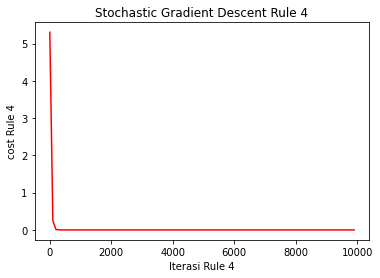

In [117]:
plt.xlabel("Iterasi Rule 4")
plt.ylabel("cost Rule 4")
plt.title("Stochastic Gradient Descent Rule 4")
plt.plot(s_iterasi_rule4_list,s_cost_rule4_list, color='red', label='Eror')
plt.show()

In [118]:
s_cost_rule4

5.965760595733902e-30

In [119]:
s_b0_rule4

-0.8932131682329236

In [120]:
s_bpoly_rule4 #hasil untuk x1 dan x2

array([0.14932079, 0.41479137, 0.69442707, 0.68474829])

In [121]:
data_rule_4

Age   TP   DB   AGR  Liver_Disease
7     29  6.7  0.3  1.10              2
14    34  7.2  3.0  1.20              2
22    30  6.9  0.4  0.90              2
70    33  5.4  1.0  1.25              2
102   30  5.6  0.4  0.90              2
103   30  5.6  0.4  0.90              2
114   34  5.6  2.5  0.90              2
115   34  5.8  4.0  0.70              2
116   32  6.2  0.3  1.00              2
174   26  8.0  0.4  1.00              2
181   33  6.2  1.4  0.90              2
187   33  7.0  0.3  0.70              2
188   33  6.5  1.3  0.80              2
189   33  5.9  0.8  0.80              2
211   33  8.0  0.8  1.00              2
221   18  8.0  0.3  1.00              2
222   13  7.9  0.5  0.90              2
231   22  8.3  1.0  1.10              2
235   31  7.9  0.3  0.90              2
250   26  7.8  0.9  1.20              2
255   26  6.1  0.9  0.80              2
256   26  5.4  0.6  0.60              2
257   26  6.2  3.3  0.80              2
282   33  6.8  0.7  0.70              2
309   34  6.5  2.1  0.70              2
349   23  6.2  0.3  1.00              2
373   22  5.5  1.0  0.80              2
391   33  6.9  3.7  1.09              2
392   33  7.3  1.6  0.70              2
398   22  6.2  3.2  0.80              2
466   16  7.1  4.1  1.20              2
467   16  5.4  1.2  0.90              2
470   32  6.2  1.6  0.40              2
478   31  6.8  0.5  1.00              2

In [122]:
X4=np.array(data_rule_4.iloc[::,:-1])
X4

array([[29.  ,  6.7 ,  0.3 ,  1.1 ],
       [34.  ,  7.2 ,  3.  ,  1.2 ],
       [30.  ,  6.9 ,  0.4 ,  0.9 ],
       [33.  ,  5.4 ,  1.  ,  1.25],
       [30.  ,  5.6 ,  0.4 ,  0.9 ],
       [30.  ,  5.6 ,  0.4 ,  0.9 ],
       [34.  ,  5.6 ,  2.5 ,  0.9 ],
       [34.  ,  5.8 ,  4.  ,  0.7 ],
       [32.  ,  6.2 ,  0.3 ,  1.  ],
       [26.  ,  8.  ,  0.4 ,  1.  ],
       [33.  ,  6.2 ,  1.4 ,  0.9 ],
       [33.  ,  7.  ,  0.3 ,  0.7 ],
       [33.  ,  6.5 ,  1.3 ,  0.8 ],
       [33.  ,  5.9 ,  0.8 ,  0.8 ],
       [33.  ,  8.  ,  0.8 ,  1.  ],
       [18.  ,  8.  ,  0.3 ,  1.  ],
       [13.  ,  7.9 ,  0.5 ,  0.9 ],
       [22.  ,  8.3 ,  1.  ,  1.1 ],
       [31.  ,  7.9 ,  0.3 ,  0.9 ],
       [26.  ,  7.8 ,  0.9 ,  1.2 ],
       [26.  ,  6.1 ,  0.9 ,  0.8 ],
       [26.  ,  5.4 ,  0.6 ,  0.6 ],
       [26.  ,  6.2 ,  3.3 ,  0.8 ],
       [33.  ,  6.8 ,  0.7 ,  0.7 ],
       [34.  ,  6.5 ,  2.1 ,  0.7 ],
       [23.  ,  6.2 ,  0.3 ,  1.  ],
       [22.  ,  5.5 ,  1.  ,  0.8 ],
 

In [123]:
Y4=np.array(data_rule_4.iloc[:,3])
Y4

array([1.1 , 1.2 , 0.9 , 1.25, 0.9 , 0.9 , 0.9 , 0.7 , 1.  , 1.  , 0.9 ,
       0.7 , 0.8 , 0.8 , 1.  , 1.  , 0.9 , 1.1 , 0.9 , 1.2 , 0.8 , 0.6 ,
       0.8 , 0.7 , 0.7 , 1.  , 0.8 , 1.09, 0.7 , 0.8 , 1.2 , 0.9 , 0.4 ,
       1.  ])

In [124]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X4_poly = poly_reg.fit_transform(X4)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X4_poly, Y4) 
# Proses Training Model
poly_reg.fit(X4, Y4) 

# Memprediksi hasil dengan regresi polynomial
y4_pred=lin_reg_2.predict(poly_reg.fit_transform(X4))
y4_pred

data_rule_4['pred'] = y4_pred
data_rule_4

Age   TP   DB   AGR  Liver_Disease  pred
7     29  6.7  0.3  1.10              2  1.10
14    34  7.2  3.0  1.20              2  1.20
22    30  6.9  0.4  0.90              2  0.90
70    33  5.4  1.0  1.25              2  1.25
102   30  5.6  0.4  0.90              2  0.90
103   30  5.6  0.4  0.90              2  0.90
114   34  5.6  2.5  0.90              2  0.90
115   34  5.8  4.0  0.70              2  0.70
116   32  6.2  0.3  1.00              2  1.00
174   26  8.0  0.4  1.00              2  1.00
181   33  6.2  1.4  0.90              2  0.90
187   33  7.0  0.3  0.70              2  0.70
188   33  6.5  1.3  0.80              2  0.80
189   33  5.9  0.8  0.80              2  0.80
211   33  8.0  0.8  1.00              2  1.00
221   18  8.0  0.3  1.00              2  1.00
222   13  7.9  0.5  0.90              2  0.90
231   22  8.3  1.0  1.10              2  1.10
235   31  7.9  0.3  0.90              2  0.90
250   26  7.8  0.9  1.20              2  1.20
255   26  6.1  0.9  0.80              2  0.80
256   26  5.4  0.6  0.60              2  0.60
257   26  6.2  3.3  0.80              2  0.80
282   33  6.8  0.7  0.70              2  0.70
309   34  6.5  2.1  0.70              2  0.70
349   23  6.2  0.3  1.00              2  1.00
373   22  5.5  1.0  0.80              2  0.80
391   33  6.9  3.7  1.09              2  1.09
392   33  7.3  1.6  0.70              2  0.70
398   22  6.2  3.2  0.80              2  0.80
466   16  7.1  4.1  1.20              2  1.20
467   16  5.4  1.2  0.90              2  0.90
470   32  6.2  1.6  0.40              2  0.40
478   31  6.8  0.5  1.00              2  1.00

##Rule 5

In [125]:
rule_5 = df_fuzz[df_fuzz['Rule']==" Jika X1 Muda dan X2 Normal dan X3 Menurun dan X4 Rendah maka Y Nonliver"]
index=rule_5.index
data_rule_5=df_fuzz.iloc[index,:5]
data_rule_5

Age   TP   DB   AGR  Liver_Disease
6     26  7.0  0.2  1.00              2
35    32  6.0  0.1  1.00              2
38    34  6.6  0.1  1.00              2
47    31  6.0  0.2  1.00              2
57    19  5.5  0.2  1.20              2
63    31  5.3  0.2  0.70              2
75    18  7.5  0.2  0.70              2
85    18  5.9  0.1  1.10              2
86    18  6.9  0.1  1.10              2
135   31  7.3  0.2  1.20              2
146   26  5.7  0.2  0.75              2
161   18  7.5  0.2  0.80              2
173   26  7.9  0.2  1.00              2
199   18  6.9  0.2  1.30              2
210   30  9.6  0.2  1.20              2
223   34  8.6  0.2  1.20              2
232   22  8.0  0.2  0.90              2
259   13  7.4  0.2  1.10              2
260   13  8.9  0.1  1.20              2
277   26  8.2  0.2  1.10              2
281   33  8.5  0.2  0.80              2
285   24  6.6  0.2  1.00              2
301   33  7.0  0.1  1.10              2
320   12  7.2  0.2  1.00              2
337   32  7.0  0.1  0.70              2
368   21  6.8  0.1  1.00              2
376   25  8.0  0.1  1.00              2
400   32  6.0  0.2  0.93              2
430   28  8.0  0.2  1.00              2

In [126]:
rule_5.to_csv('hasilrule5.csv') 

###Stochastic Gradient Descent

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [128]:
df_rule5=pd.read_csv('hasilrule5.csv',sep=',')
df_rule5

Unnamed: 0  Age   TP   DB   AGR  Liver_Disease Age_fuzz TP_fuzz  DB_fuzz  \
0            6   26  7.0  0.2  1.00              2     Muda  Normal  Menurun   
1           35   32  6.0  0.1  1.00              2     Muda  Normal  Menurun   
2           38   34  6.6  0.1  1.00              2     Muda  Normal  Menurun   
3           47   31  6.0  0.2  1.00              2     Muda  Normal  Menurun   
4           57   19  5.5  0.2  1.20              2     Muda  Normal  Menurun   
5           63   31  5.3  0.2  0.70              2     Muda  Normal  Menurun   
6           75   18  7.5  0.2  0.70              2     Muda  Normal  Menurun   
7           85   18  5.9  0.1  1.10              2     Muda  Normal  Menurun   
8           86   18  6.9  0.1  1.10              2     Muda  Normal  Menurun   
9          135   31  7.3  0.2  1.20              2     Muda  Normal  Menurun   
10         146   26  5.7  0.2  0.75              2     Muda  Normal  Menurun   
11         161   18  7.5  0.2  0.80              2     Muda  Normal  Menurun   
12         173   26  7.9  0.2  1.00              2     Muda  Normal  Menurun   
13         199   18  6.9  0.2  1.30              2     Muda  Normal  Menurun   
14         210   30  9.6  0.2  1.20              2     Muda  Normal  Menurun   
15         223   34  8.6  0.2  1.20              2     Muda  Normal  Menurun   
16         232   22  8.0  0.2  0.90              2     Muda  Normal  Menurun   
17         259   13  7.4  0.2  1.10              2     Muda  Normal  Menurun   
18         260   13  8.9  0.1  1.20              2     Muda  Normal  Menurun   
19         277   26  8.2  0.2  1.10              2     Muda  Normal  Menurun   
20         281   33  8.5  0.2  0.80              2     Muda  Normal  Menurun   
21         285   24  6.6  0.2  1.00              2     Muda  Normal  Menurun   
22         301   33  7.0  0.1  1.10              2     Muda  Normal  Menurun   
23         320   12  7.2  0.2  1.00              2     Muda  Normal  Menurun   
24         337   32  7.0  0.1  0.70              2     Muda  Normal  Menurun   
25         368   21  6.8  0.1  1.00              2     Muda  Normal  Menurun   
26         376   25  8.0  0.1  1.00              2     Muda  Normal  Menurun   
27         400   32  6.0  0.2  0.93              2     Muda  Normal  Menurun   
28         430   28  8.0  0.2  1.00              2     Muda  Normal  Menurun   

   AGR_fuzz Liver_Disease_fuzz   miu_Age        miu_TP  miu_DB   miu_AGR  \
0    Rendah           Nonliver  0.692308  8.333333e-01     0.0  0.833333   
1    Rendah           Nonliver  0.230769  2.960595e-15     0.0  0.833333   
2    Rendah           Nonliver  0.076923  2.960595e-15     0.0  0.833333   
3    Rendah           Nonliver  0.307692  2.960595e-15     0.0  0.833333   
4    Rendah           Nonliver  0.750000  0.000000e+00     0.0  0.833333   
5    Rendah           Nonliver  0.307692  0.000000e+00     0.0  0.000000   
6    Rendah           Nonliver  0.666667  8.333333e-01     0.0  0.000000   
7    Rendah           Nonliver  0.666667  0.000000e+00     0.0  0.833333   
8    Rendah           Nonliver  0.666667  2.960595e-15     0.0  0.833333   
9    Rendah           Nonliver  0.307692  8.333333e-01     0.0  0.833333   
10   Rendah           Nonliver  0.692308  0.000000e+00     0.0  0.000000   
11   Rendah           Nonliver  0.666667  8.333333e-01     0.0  0.000000   
12   Rendah           Nonliver  0.692308  8.333333e-01     0.0  0.833333   
13   Rendah           Nonliver  0.666667  2.960595e-15     0.0  0.833333   
14   Rendah           Nonliver  0.384615  0.000000e+00     0.0  0.833333   
15   Rendah           Nonliver  0.076923  2.727273e-01     0.0  0.833333   
16   Rendah           Nonliver  1.000000  2.727273e-01     0.0  0.000000   
17   Rendah           Nonliver  0.250000  8.333333e-01     0.0  0.833333   
18   Rendah           Nonliver  0.250000  2.727273e-01     0.0  0.833333   
19   Rendah           Nonliver  0.692308  2.727273e-01     0.0  0.833333   
20   Re

In [129]:
df_rule5=df_rule5.drop(columns=['Unnamed: 0'])
df_rule5

Age   TP   DB   AGR  Liver_Disease Age_fuzz TP_fuzz  DB_fuzz AGR_fuzz  \
0    26  7.0  0.2  1.00              2     Muda  Normal  Menurun   Rendah   
1    32  6.0  0.1  1.00              2     Muda  Normal  Menurun   Rendah   
2    34  6.6  0.1  1.00              2     Muda  Normal  Menurun   Rendah   
3    31  6.0  0.2  1.00              2     Muda  Normal  Menurun   Rendah   
4    19  5.5  0.2  1.20              2     Muda  Normal  Menurun   Rendah   
5    31  5.3  0.2  0.70              2     Muda  Normal  Menurun   Rendah   
6    18  7.5  0.2  0.70              2     Muda  Normal  Menurun   Rendah   
7    18  5.9  0.1  1.10              2     Muda  Normal  Menurun   Rendah   
8    18  6.9  0.1  1.10              2     Muda  Normal  Menurun   Rendah   
9    31  7.3  0.2  1.20              2     Muda  Normal  Menurun   Rendah   
10   26  5.7  0.2  0.75              2     Muda  Normal  Menurun   Rendah   
11   18  7.5  0.2  0.80              2     Muda  Normal  Menurun   Rendah   
12   26  7.9  0.2  1.00              2     Muda  Normal  Menurun   Rendah   
13   18  6.9  0.2  1.30              2     Muda  Normal  Menurun   Rendah   
14   30  9.6  0.2  1.20              2     Muda  Normal  Menurun   Rendah   
15   34  8.6  0.2  1.20              2     Muda  Normal  Menurun   Rendah   
16   22  8.0  0.2  0.90              2     Muda  Normal  Menurun   Rendah   
17   13  7.4  0.2  1.10              2     Muda  Normal  Menurun   Rendah   
18   13  8.9  0.1  1.20              2     Muda  Normal  Menurun   Rendah   
19   26  8.2  0.2  1.10              2     Muda  Normal  Menurun   Rendah   
20   33  8.5  0.2  0.80              2     Muda  Normal  Menurun   Rendah   
21   24  6.6  0.2  1.00              2     Muda  Normal  Menurun   Rendah   
22   33  7.0  0.1  1.10              2     Muda  Normal  Menurun   Rendah   
23   12  7.2  0.2  1.00              2     Muda  Normal  Menurun   Rendah   
24   32  7.0  0.1  0.70              2     Muda  Normal  Menurun   Rendah   
25   21  6.8  0.1  1.00              2     Muda  Normal  Menurun   Rendah   
26   25  8.0  0.1  1.00              2     Muda  Normal  Menurun   Rendah   
27   32  6.0  0.2  0.93              2     Muda  Normal  Menurun   Rendah   
28   28  8.0  0.2  1.00              2     Muda  Normal  Menurun   Rendah   

   Liver_Disease_fuzz   miu_Age        miu_TP  miu_DB   miu_AGR  \
0            Nonliver  0.692308  8.333333e-01     0.0  0.833333   
1            Nonliver  0.230769  2.960595e-15     0.0  0.833333   
2            Nonliver  0.076923  2.960595e-15     0.0  0.833333   
3            Nonliver  0.307692  2.960595e-15     0.0  0.833333   
4            Nonliver  0.750000  0.000000e+00     0.0  0.833333   
5            Nonliver  0.307692  0.000000e+00     0.0  0.000000   
6            Nonliver  0.666667  8.333333e-01     0.0  0.000000   
7            Nonliver  0.666667  0.000000e+00     0.0  0.833333   
8            Nonliver  0.666667  2.960595e-15     0.0  0.833333   
9            Nonliver  0.307692  8.333333e-01     0.0  0.833333   
10           Nonliver  0.692308  0.000000e+00     0.0  0.000000   
11           Nonliver  0.666667  8.333333e-01     0.0  0.000000   
12           Nonliver  0.692308  8.333333e-01     0.0  0.833333   
13           Nonliver  0.666667  2.960595e-15     0.0  0.833333   
14           Nonliver  0.384615  0.000000e+00     0.0  0.833333   
15           Nonliver  0.076923  2.727273e-01     0.0  0.833333   
16           Nonliver  1.000000  2.727273e-01     0.0  0.000000   
17           Nonliver  0.250000  8.333333e-01     0.0  0.833333   
18           Nonliver  0.250000  2.727273e-01     0.0  0.833333   
19           Nonliver  0.692308  2.727273e-01     0.0  0.833333   
20           Nonliver  0.153846  2.727273e-01     0.0  0.000000   
21           Nonliver  0.846154  2.960595e-15     0.0  0.833333   
22           Nonliver  0.153846  8.333333e-01     0.0  0.833333   
23           Nonliver  0.166667  8.333333e-01     0.0  0.833333   
24           Nonli

In [130]:
from sklearn import preprocessing
sx5 = preprocessing.MinMaxScaler()
sy5 = preprocessing.MinMaxScaler()

scaled_X5 = sx5.fit_transform(data_rule_5.drop('Liver_Disease',axis='columns'))
scaled_y5 = sy5.fit_transform(data_rule_5['Liver_Disease'].values.reshape(rule_5.shape[0],1))

scaled_X5

array([[0.63636364, 0.39534884, 1.        , 0.5       ],
       [0.90909091, 0.1627907 , 0.        , 0.5       ],
       [1.        , 0.30232558, 0.        , 0.5       ],
       [0.86363636, 0.1627907 , 1.        , 0.5       ],
       [0.31818182, 0.04651163, 1.        , 0.83333333],
       [0.86363636, 0.        , 1.        , 0.        ],
       [0.27272727, 0.51162791, 1.        , 0.        ],
       [0.27272727, 0.13953488, 0.        , 0.66666667],
       [0.27272727, 0.37209302, 0.        , 0.66666667],
       [0.86363636, 0.46511628, 1.        , 0.83333333],
       [0.63636364, 0.09302326, 1.        , 0.08333333],
       [0.27272727, 0.51162791, 1.        , 0.16666667],
       [0.63636364, 0.60465116, 1.        , 0.5       ],
       [0.27272727, 0.37209302, 1.        , 1.        ],
       [0.81818182, 1.        , 1.        , 0.83333333],
       [1.        , 0.76744186, 1.        , 0.83333333],
       [0.45454545, 0.62790698, 1.        , 0.33333333],
       [0.04545455, 0.48837209,

In [131]:
scaled_y5_reshape=scaled_y5.reshape(scaled_y5.shape[0],)
scaled_y5_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [132]:
def stochastic_gradient_descent_rule5(X5, y5, iterasi, learning_rate = 0.1):

    jumlah_variabel_rule5 = X5.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule5 = np.ones(shape=(jumlah_variabel_rule5))       # b1, b2, ... b(jumlah variabel)
    b0_rule5 = 0                                         # b0 atau bias
    n = X5.shape[0]                                 # jumlah baris data X
    
    cost_rule5_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule5_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule5_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_index = np.random.RandomState(seed=42).randint(0, n-1)      # Memilih indeks data random untuk update parameter
        sample_x5 = X5[random_index]
        sample_y5 = y5[random_index]
        
        y5_pred = np.dot(bpoly_rule5, sample_x5.T) + b0_rule5                  # Menghitung y_pred pada setiap iterasi
        
        bpoly_rule5_grad = -(2/n)*(sample_x5.T.dot(sample_y5-y5_pred))    # Menghitung perubahan/gradien bpoly setiap iterasi
        b0_rule5_grad = -(2/n)*np.sum(sample_y5-y5_pred)                 # Menghitung perubahan/gradien b0 setiap iterasi
        bpoly_rule5 = bpoly_rule5 - learning_rate * bpoly_rule5_grad               # Memperbaharui bpoly setiap iterasi
        b0_rule5 = b0_rule5 - learning_rate * b0_rule5_grad                        # Memperbaharui bpoly setiap iterasi
        
        # Menyimpan parameter b dalam list tunggal
        bp=[]
        for jv_rule5 in range(jumlah_variabel_rule5):
            bp_rule5=bpoly_rule5[jv_rule5]
            bp.append(bp_rule5)
        b_rule5=[b0_rule5]+bp
        
        cost_rule5 = np.mean(np.square(sample_y5-y5_pred))        # MSE (Mean Squared Error)
        
        if i%100==0:                                      # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule5_list.append(cost_rule5)                        # Menyimpan nilai cost setiap iterasi
            iterasi_rule5_list.append(i)                        # Menyimpan nilai iterasi setiap iterasi
            b_rule5_list.append(b_rule5)                              # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule5, b0_rule5, cost_rule5, b_rule5_list, cost_rule5_list, iterasi_rule5_list  # Output

In [133]:
import time
mulai_rule5 = time.time()
s_bpoly_rule5, s_b0_rule5, s_cost_rule5, s_b_rule5_list, s_cost_rule5_list, s_iterasi_rule5_list=stochastic_gradient_descent_rule5 (scaled_X5, 
                                                                                                                                    scaled_y5_reshape,
                                                                                                                                    iterasi=10000,
                                                                                                                                    learning_rate = 0.1)
selesai_rule5 = time.time()
waktu_komputasi_rule5 = (selesai_rule5 - mulai_rule5)
print("Waktu Komputasi Rule 5: ",waktu_komputasi_rule5)

Waktu Komputasi Rule 5:  3.2969436645507812


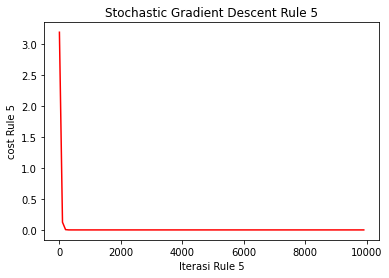

In [134]:
plt.xlabel("Iterasi Rule 5")
plt.ylabel("cost Rule 5")
plt.title("Stochastic Gradient Descent Rule 5")
plt.plot(s_iterasi_rule5_list,s_cost_rule5_list, color='red', label='Eror')
plt.show()

In [135]:
s_cost_rule5

3.993608332681372e-30

In [136]:
s_b0_rule5

-0.7638038277054202

In [137]:
s_bpoly_rule5

array([0.79168987, 0.60921665, 0.23619617, 1.        ])

In [138]:
data_rule_5

Age   TP   DB   AGR  Liver_Disease
6     26  7.0  0.2  1.00              2
35    32  6.0  0.1  1.00              2
38    34  6.6  0.1  1.00              2
47    31  6.0  0.2  1.00              2
57    19  5.5  0.2  1.20              2
63    31  5.3  0.2  0.70              2
75    18  7.5  0.2  0.70              2
85    18  5.9  0.1  1.10              2
86    18  6.9  0.1  1.10              2
135   31  7.3  0.2  1.20              2
146   26  5.7  0.2  0.75              2
161   18  7.5  0.2  0.80              2
173   26  7.9  0.2  1.00              2
199   18  6.9  0.2  1.30              2
210   30  9.6  0.2  1.20              2
223   34  8.6  0.2  1.20              2
232   22  8.0  0.2  0.90              2
259   13  7.4  0.2  1.10              2
260   13  8.9  0.1  1.20              2
277   26  8.2  0.2  1.10              2
281   33  8.5  0.2  0.80              2
285   24  6.6  0.2  1.00              2
301   33  7.0  0.1  1.10              2
320   12  7.2  0.2  1.00              2
337   32  7.0  0.1  0.70              2
368   21  6.8  0.1  1.00              2
376   25  8.0  0.1  1.00              2
400   32  6.0  0.2  0.93              2
430   28  8.0  0.2  1.00              2

In [139]:
X5=np.array(data_rule_5.iloc[::,:-1])
X5

array([[26.  ,  7.  ,  0.2 ,  1.  ],
       [32.  ,  6.  ,  0.1 ,  1.  ],
       [34.  ,  6.6 ,  0.1 ,  1.  ],
       [31.  ,  6.  ,  0.2 ,  1.  ],
       [19.  ,  5.5 ,  0.2 ,  1.2 ],
       [31.  ,  5.3 ,  0.2 ,  0.7 ],
       [18.  ,  7.5 ,  0.2 ,  0.7 ],
       [18.  ,  5.9 ,  0.1 ,  1.1 ],
       [18.  ,  6.9 ,  0.1 ,  1.1 ],
       [31.  ,  7.3 ,  0.2 ,  1.2 ],
       [26.  ,  5.7 ,  0.2 ,  0.75],
       [18.  ,  7.5 ,  0.2 ,  0.8 ],
       [26.  ,  7.9 ,  0.2 ,  1.  ],
       [18.  ,  6.9 ,  0.2 ,  1.3 ],
       [30.  ,  9.6 ,  0.2 ,  1.2 ],
       [34.  ,  8.6 ,  0.2 ,  1.2 ],
       [22.  ,  8.  ,  0.2 ,  0.9 ],
       [13.  ,  7.4 ,  0.2 ,  1.1 ],
       [13.  ,  8.9 ,  0.1 ,  1.2 ],
       [26.  ,  8.2 ,  0.2 ,  1.1 ],
       [33.  ,  8.5 ,  0.2 ,  0.8 ],
       [24.  ,  6.6 ,  0.2 ,  1.  ],
       [33.  ,  7.  ,  0.1 ,  1.1 ],
       [12.  ,  7.2 ,  0.2 ,  1.  ],
       [32.  ,  7.  ,  0.1 ,  0.7 ],
       [21.  ,  6.8 ,  0.1 ,  1.  ],
       [25.  ,  8.  ,  0.1 ,  1.  ],
 

In [140]:
Y5=np.array(data_rule_5.iloc[:,3])
Y5

array([1.  , 1.  , 1.  , 1.  , 1.2 , 0.7 , 0.7 , 1.1 , 1.1 , 1.2 , 0.75,
       0.8 , 1.  , 1.3 , 1.2 , 1.2 , 0.9 , 1.1 , 1.2 , 1.1 , 0.8 , 1.  ,
       1.1 , 1.  , 0.7 , 1.  , 1.  , 0.93, 1.  ])

In [141]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X5_poly = poly_reg.fit_transform(X5)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X5_poly, Y5) 
# Proses Training Model
poly_reg.fit(X5, Y5) 

# Memprediksi hasil dengan regresi polynomial
y5_pred=lin_reg_2.predict(poly_reg.fit_transform(X5))
y5_pred

data_rule_5['pred'] = y5_pred
data_rule_5

Age   TP   DB   AGR  Liver_Disease  pred
6     26  7.0  0.2  1.00              2  1.00
35    32  6.0  0.1  1.00              2  1.00
38    34  6.6  0.1  1.00              2  1.00
47    31  6.0  0.2  1.00              2  1.00
57    19  5.5  0.2  1.20              2  1.20
63    31  5.3  0.2  0.70              2  0.70
75    18  7.5  0.2  0.70              2  0.70
85    18  5.9  0.1  1.10              2  1.10
86    18  6.9  0.1  1.10              2  1.10
135   31  7.3  0.2  1.20              2  1.20
146   26  5.7  0.2  0.75              2  0.75
161   18  7.5  0.2  0.80              2  0.80
173   26  7.9  0.2  1.00              2  1.00
199   18  6.9  0.2  1.30              2  1.30
210   30  9.6  0.2  1.20              2  1.20
223   34  8.6  0.2  1.20              2  1.20
232   22  8.0  0.2  0.90              2  0.90
259   13  7.4  0.2  1.10              2  1.10
260   13  8.9  0.1  1.20              2  1.20
277   26  8.2  0.2  1.10              2  1.10
281   33  8.5  0.2  0.80              2  0.80
285   24  6.6  0.2  1.00              2  1.00
301   33  7.0  0.1  1.10              2  1.10
320   12  7.2  0.2  1.00              2  1.00
337   32  7.0  0.1  0.70              2  0.70
368   21  6.8  0.1  1.00              2  1.00
376   25  8.0  0.1  1.00              2  1.00
400   32  6.0  0.2  0.93              2  0.93
430   28  8.0  0.2  1.00              2  1.00

##Rule 6

In [142]:
rule_6 = df_fuzz[df_fuzz['Rule']==" Jika X1 Paruh baya dan X2 Normal dan X3 Menurun dan X4 Rendah maka Y Liver"]
index=rule_6.index
data_rule_6=df_fuzz.iloc[index,:5]
data_rule_6

Age   TP   DB   AGR  Liver_Disease
44    48  5.5  0.2  0.90              1
69    49  5.4  0.1  1.00              1
94    36  6.0  0.2  0.50              1
95    36  6.0  0.2  0.50              1
96    36  5.9  0.1  0.90              1
113   52  6.5  0.1  1.20              1
147   41  6.1  0.2  0.90              1
151   38  6.1  0.2  1.03              1
213   35  6.4  0.2  1.20              1
218   50  7.4  0.2  1.30              1
240   50  8.4  0.2  1.00              1
252   44  7.1  0.2  1.00              1
253   43  6.0  0.2  0.90              1
258   36  5.9  0.2  1.10              1
267   35  7.0  0.2  1.30              1
274   49  6.6  0.2  1.20              1
288   42  8.5  0.2  1.00              1
290   40  5.3  0.2  0.80              1
341   52  6.9  0.1  0.90              1
344   47  6.7  0.2  0.76              1
346   41  7.6  0.2  1.00              1
384   49  6.6  0.1  0.70              1
385   42  5.8  0.2  0.70              1
423   37  9.2  0.2  1.00              1
437   42  7.0  0.2  0.70              1
438   42  6.6  0.2  0.80              1
461   38  5.9  0.1  0.90              1

In [143]:
rule_6.to_csv('hasilrule6.csv') 

###Stochastic Gradient Descent

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [145]:
df_rule6=pd.read_csv('hasilrule6.csv',sep=',')
df_rule6

Unnamed: 0  Age   TP   DB   AGR  Liver_Disease    Age_fuzz TP_fuzz  \
0           44   48  5.5  0.2  0.90              1  Paruh baya  Normal   
1           69   49  5.4  0.1  1.00              1  Paruh baya  Normal   
2           94   36  6.0  0.2  0.50              1  Paruh baya  Normal   
3           95   36  6.0  0.2  0.50              1  Paruh baya  Normal   
4           96   36  5.9  0.1  0.90              1  Paruh baya  Normal   
5          113   52  6.5  0.1  1.20              1  Paruh baya  Normal   
6          147   41  6.1  0.2  0.90              1  Paruh baya  Normal   
7          151   38  6.1  0.2  1.03              1  Paruh baya  Normal   
8          213   35  6.4  0.2  1.20              1  Paruh baya  Normal   
9          218   50  7.4  0.2  1.30              1  Paruh baya  Normal   
10         240   50  8.4  0.2  1.00              1  Paruh baya  Normal   
11         252   44  7.1  0.2  1.00              1  Paruh baya  Normal   
12         253   43  6.0  0.2  0.90              1  Paruh baya  Normal   
13         258   36  5.9  0.2  1.10              1  Paruh baya  Normal   
14         267   35  7.0  0.2  1.30              1  Paruh baya  Normal   
15         274   49  6.6  0.2  1.20              1  Paruh baya  Normal   
16         288   42  8.5  0.2  1.00              1  Paruh baya  Normal   
17         290   40  5.3  0.2  0.80              1  Paruh baya  Normal   
18         341   52  6.9  0.1  0.90              1  Paruh baya  Normal   
19         344   47  6.7  0.2  0.76              1  Paruh baya  Normal   
20         346   41  7.6  0.2  1.00              1  Paruh baya  Normal   
21         384   49  6.6  0.1  0.70              1  Paruh baya  Normal   
22         385   42  5.8  0.2  0.70              1  Paruh baya  Normal   
23         423   37  9.2  0.2  1.00              1  Paruh baya  Normal   
24         437   42  7.0  0.2  0.70              1  Paruh baya  Normal   
25         438   42  6.6  0.2  0.80              1  Paruh baya  Normal   
26         461   38  5.9  0.1  0.90              1  Paruh baya  Normal   

    DB_fuzz AGR_fuzz Liver_Disease_fuzz  miu_Age        miu_TP  miu_DB  \
0   Menurun   Rendah              Liver      0.7  0.000000e+00     0.0   
1   Menurun   Rendah              Liver      0.6  0.000000e+00     0.0   
2   Menurun   Rendah              Liver      0.1  2.960595e-15     0.0   
3   Menurun   Rendah              Liver      0.1  2.960595e-15     0.0   
4   Menurun   Rendah              Liver      0.1  0.000000e+00     0.0   
5   Menurun   Rendah              Liver      0.3  2.960595e-15     0.0   
6   Menurun   Rendah              Liver      0.6  2.960595e-15     0.0   
7   Menurun   Rendah              Liver      0.3  2.960595e-15     0.0   
8   Menurun   Rendah              Liver      0.0  2.960595e-15     0.0   
9   Menurun   Rendah              Liver      0.5  8.333333e-01     0.0   
10  Menurun   Rendah              Liver      0.5  2.727273e-01     0.0   
11  Menurun   Rendah              Liver      0.9  8.333333e-01     0.0   
12  Menurun   Rendah              Liver      0.8  2.960595e-15     0.0   
13  Menurun   Rendah              Liver      0.1  0.000000e+00     0.0   
14  Menurun   Rendah              Liver      0.0  8.333333e-01     0.0   
15  Menurun   Rendah              Liver      0.6  2.960595e-15     0.0   
16  Menurun   Rendah              Liver      0.7  2.727273e-01     0.0   
17  Menurun   Rendah              Liver      0.5  0.000000e+00     0.0   
18  Menurun   Rendah              Liver      0.3  2.960595e-15     0.0   
19  Menurun   Rendah              Liver      0.8  2.960595e-15     0.0   
20  Menurun   Rendah              Liver      0.6  8.333333e-01     0.0   
21  Menurun   Rendah              Liver      0.6  2.960595e-15     0.0   
22  Menurun   Rendah              Liver      0.7  0.000000e+00     0.0   
23  Menurun   Rendah              Liver      0.2  0.000000e+00     0.0   
24  Menurun   Rendah              Liver      0.7  8.333333e-01     0.0   
25  Men

In [146]:
df_rule6=df_rule6.drop(columns=['Unnamed: 0'])
df_rule6

Age   TP   DB   AGR  Liver_Disease    Age_fuzz TP_fuzz  DB_fuzz AGR_fuzz  \
0    48  5.5  0.2  0.90              1  Paruh baya  Normal  Menurun   Rendah   
1    49  5.4  0.1  1.00              1  Paruh baya  Normal  Menurun   Rendah   
2    36  6.0  0.2  0.50              1  Paruh baya  Normal  Menurun   Rendah   
3    36  6.0  0.2  0.50              1  Paruh baya  Normal  Menurun   Rendah   
4    36  5.9  0.1  0.90              1  Paruh baya  Normal  Menurun   Rendah   
5    52  6.5  0.1  1.20              1  Paruh baya  Normal  Menurun   Rendah   
6    41  6.1  0.2  0.90              1  Paruh baya  Normal  Menurun   Rendah   
7    38  6.1  0.2  1.03              1  Paruh baya  Normal  Menurun   Rendah   
8    35  6.4  0.2  1.20              1  Paruh baya  Normal  Menurun   Rendah   
9    50  7.4  0.2  1.30              1  Paruh baya  Normal  Menurun   Rendah   
10   50  8.4  0.2  1.00              1  Paruh baya  Normal  Menurun   Rendah   
11   44  7.1  0.2  1.00              1  Paruh baya  Normal  Menurun   Rendah   
12   43  6.0  0.2  0.90              1  Paruh baya  Normal  Menurun   Rendah   
13   36  5.9  0.2  1.10              1  Paruh baya  Normal  Menurun   Rendah   
14   35  7.0  0.2  1.30              1  Paruh baya  Normal  Menurun   Rendah   
15   49  6.6  0.2  1.20              1  Paruh baya  Normal  Menurun   Rendah   
16   42  8.5  0.2  1.00              1  Paruh baya  Normal  Menurun   Rendah   
17   40  5.3  0.2  0.80              1  Paruh baya  Normal  Menurun   Rendah   
18   52  6.9  0.1  0.90              1  Paruh baya  Normal  Menurun   Rendah   
19   47  6.7  0.2  0.76              1  Paruh baya  Normal  Menurun   Rendah   
20   41  7.6  0.2  1.00              1  Paruh baya  Normal  Menurun   Rendah   
21   49  6.6  0.1  0.70              1  Paruh baya  Normal  Menurun   Rendah   
22   42  5.8  0.2  0.70              1  Paruh baya  Normal  Menurun   Rendah   
23   37  9.2  0.2  1.00              1  Paruh baya  Normal  Menurun   Rendah   
24   42  7.0  0.2  0.70              1  Paruh baya  Normal  Menurun   Rendah   
25   42  6.6  0.2  0.80              1  Paruh baya  Normal  Menurun   Rendah   
26   38  5.9  0.1  0.90              1  Paruh baya  Normal  Menurun   Rendah   

   Liver_Disease_fuzz  miu_Age        miu_TP  miu_DB   miu_AGR  \
0               Liver      0.7  0.000000e+00     0.0  0.000000   
1               Liver      0.6  0.000000e+00     0.0  0.833333   
2               Liver      0.1  2.960595e-15     0.0  0.000000   
3               Liver      0.1  2.960595e-15     0.0  0.000000   
4               Liver      0.1  0.000000e+00     0.0  0.000000   
5               Liver      0.3  2.960595e-15     0.0  0.833333   
6               Liver      0.6  2.960595e-15     0.0  0.000000   
7               Liver      0.3  2.960595e-15     0.0  0.833333   
8               Liver      0.0  2.960595e-15     0.0  0.833333   
9               Liver      0.5  8.333333e-01     0.0  0.833333   
10              Liver      0.5  2.727273e-01     0.0  0.833333   
11              Liver      0.9  8.333333e-01     0.0  0.833333   
12              Liver      0.8  2.960595e-15     0.0  0.000000   
13              Liver      0.1  0.000000e+00     0.0  0.833333   
14              Liver      0.0  8.333333e-01     0.0  0.833333   
15              Liver      0.6  2.960595e-15     0.0  0.833333   
16              Liver      0.7  2.727273e-01     0.0  0.833333   
17              Liver      0.5  0.000000e+00     0.0  0.000000   
18              Liver      0.3  2.960595e-15     0.0  0.000000   
19              Liver      0.8  2.960595e-15     0.0  0.000000   
20              Liver      0.6  8.333333e-01     0.0  0.833333   
21              Liver      0.6  2.960595e-15     0.0  0.000000   
22              Liver      0.7  0.000000e+00     0.0  0.000000   
23              Liver      0.2  0.000000e+00     0.0  0.833333   
24              Liver      0.7  8.333333e-01     0.0  0.000000   
25              Liver      0.7  2.960595e-15   

In [147]:
from sklearn import preprocessing
sx6 = preprocessing.MinMaxScaler()
sy6 = preprocessing.MinMaxScaler()

scaled_X6 = sx6.fit_transform(data_rule_6.drop('Liver_Disease',axis='columns'))
scaled_y6 = sy6.fit_transform(data_rule_6['Liver_Disease'].values.reshape(rule_6.shape[0],1))

scaled_X6

array([[0.76470588, 0.05128205, 1.        , 0.5       ],
       [0.82352941, 0.02564103, 0.        , 0.625     ],
       [0.05882353, 0.17948718, 1.        , 0.        ],
       [0.05882353, 0.17948718, 1.        , 0.        ],
       [0.05882353, 0.15384615, 0.        , 0.5       ],
       [1.        , 0.30769231, 0.        , 0.875     ],
       [0.35294118, 0.20512821, 1.        , 0.5       ],
       [0.17647059, 0.20512821, 1.        , 0.6625    ],
       [0.        , 0.28205128, 1.        , 0.875     ],
       [0.88235294, 0.53846154, 1.        , 1.        ],
       [0.88235294, 0.79487179, 1.        , 0.625     ],
       [0.52941176, 0.46153846, 1.        , 0.625     ],
       [0.47058824, 0.17948718, 1.        , 0.5       ],
       [0.05882353, 0.15384615, 1.        , 0.75      ],
       [0.        , 0.43589744, 1.        , 1.        ],
       [0.82352941, 0.33333333, 1.        , 0.875     ],
       [0.41176471, 0.82051282, 1.        , 0.625     ],
       [0.29411765, 0.        ,

In [148]:
scaled_y6_reshape=scaled_y6.reshape(scaled_y6.shape[0],)
scaled_y6_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [149]:
def stochastic_gradient_descent_rule6(X6, y6, iterasi, learning_rate = 0.1):

    jumlah_variabel_rule6 = X6.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule6 = np.ones(shape=(jumlah_variabel_rule6))       # b1, b2, ... b(jumlah variabel)
    b0_rule6 = 0                                         # b0 atau bias
    n = X6.shape[0]                                 # jumlah baris data X
    
    cost_rule6_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule6_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule6_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_index = np.random.RandomState(seed=42).randint(0, n-1)      # Memilih indeks data random untuk update parameter
        sample_x6 = X6[random_index]
        sample_y6 = y6[random_index]
        
        y6_pred = np.dot(bpoly_rule6, sample_x6.T) + b0_rule6                  # Menghitung y_pred pada setiap iterasi
        
        bpoly_rule6_grad = -(2/n)*(sample_x6.T.dot(sample_y6-y6_pred))    # Menghitung perubahan/gradien bpoly setiap iterasi
        b0_rule6_grad = -(2/n)*np.sum(sample_y6-y6_pred)                 # Menghitung perubahan/gradien b0 setiap iterasi
        bpoly_rule6 = bpoly_rule6 - learning_rate * bpoly_rule6_grad               # Memperbaharui bpoly setiap iterasi
        b0_rule6 = b0_rule6 - learning_rate * b0_rule6_grad                        # Memperbaharui bpoly setiap iterasi
        
        # Menyimpan parameter b dalam list tunggal
        bp=[]
        for jv_rule6 in range(jumlah_variabel_rule6):
            bp_rule6=bpoly_rule6[jv_rule6]
            bp.append(bp_rule6)
        b_rule6=[b0_rule6]+bp
        
        cost_rule6 = np.mean(np.square(sample_y6-y6_pred))        # MSE (Mean Squared Error)
        
        if i%100==0:                                      # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule6_list.append(cost_rule6)                        # Menyimpan nilai cost setiap iterasi
            iterasi_rule6_list.append(i)                        # Menyimpan nilai iterasi setiap iterasi
            b_rule6_list.append(b_rule6)                              # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule6, b0_rule6, cost_rule6, b_rule6_list, cost_rule6_list, iterasi_rule6_list  # Output

In [150]:
import time
mulai_rule6 = time.time()
s_bpoly_rule6, s_b0_rule6, s_cost_rule6, s_b_rule6_list, s_cost_rule6_list, s_iterasi_rule6_list=stochastic_gradient_descent_rule6 (scaled_X6, 
                                                                                                                                    scaled_y6_reshape,
                                                                                                                                    iterasi=10000,
                                                                                                                                    learning_rate = 0.1)
selesai_rule6 = time.time()
waktu_komputasi_rule6 = (selesai_rule6 - mulai_rule6)
print("Waktu Komputasi Rule 6: ",waktu_komputasi_rule6)

Waktu Komputasi Rule 6:  3.203139066696167


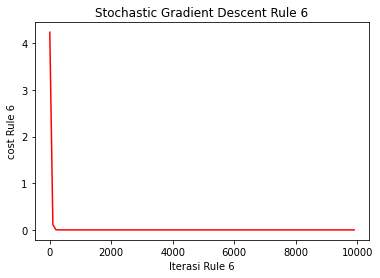

In [151]:
plt.xlabel("Iterasi Rule 6")
plt.ylabel("cost Rule 6")
plt.title("Stochastic Gradient Descent Rule 6")
plt.plot(s_iterasi_rule6_list,s_cost_rule6_list, color='red', label='Eror')
plt.show()

In [152]:
s_cost_rule6

3.1554436208840472e-30

In [153]:
s_b0_rule6

-0.8516225325237202

In [154]:
s_bpoly_rule6

array([0.69942734, 0.8253082 , 0.14837747, 0.57418873])

In [155]:
data_rule_6

Age   TP   DB   AGR  Liver_Disease
44    48  5.5  0.2  0.90              1
69    49  5.4  0.1  1.00              1
94    36  6.0  0.2  0.50              1
95    36  6.0  0.2  0.50              1
96    36  5.9  0.1  0.90              1
113   52  6.5  0.1  1.20              1
147   41  6.1  0.2  0.90              1
151   38  6.1  0.2  1.03              1
213   35  6.4  0.2  1.20              1
218   50  7.4  0.2  1.30              1
240   50  8.4  0.2  1.00              1
252   44  7.1  0.2  1.00              1
253   43  6.0  0.2  0.90              1
258   36  5.9  0.2  1.10              1
267   35  7.0  0.2  1.30              1
274   49  6.6  0.2  1.20              1
288   42  8.5  0.2  1.00              1
290   40  5.3  0.2  0.80              1
341   52  6.9  0.1  0.90              1
344   47  6.7  0.2  0.76              1
346   41  7.6  0.2  1.00              1
384   49  6.6  0.1  0.70              1
385   42  5.8  0.2  0.70              1
423   37  9.2  0.2  1.00              1
437   42  7.0  0.2  0.70              1
438   42  6.6  0.2  0.80              1
461   38  5.9  0.1  0.90              1

In [156]:
X6=np.array(data_rule_6.iloc[::,:-1])
X6

array([[48.  ,  5.5 ,  0.2 ,  0.9 ],
       [49.  ,  5.4 ,  0.1 ,  1.  ],
       [36.  ,  6.  ,  0.2 ,  0.5 ],
       [36.  ,  6.  ,  0.2 ,  0.5 ],
       [36.  ,  5.9 ,  0.1 ,  0.9 ],
       [52.  ,  6.5 ,  0.1 ,  1.2 ],
       [41.  ,  6.1 ,  0.2 ,  0.9 ],
       [38.  ,  6.1 ,  0.2 ,  1.03],
       [35.  ,  6.4 ,  0.2 ,  1.2 ],
       [50.  ,  7.4 ,  0.2 ,  1.3 ],
       [50.  ,  8.4 ,  0.2 ,  1.  ],
       [44.  ,  7.1 ,  0.2 ,  1.  ],
       [43.  ,  6.  ,  0.2 ,  0.9 ],
       [36.  ,  5.9 ,  0.2 ,  1.1 ],
       [35.  ,  7.  ,  0.2 ,  1.3 ],
       [49.  ,  6.6 ,  0.2 ,  1.2 ],
       [42.  ,  8.5 ,  0.2 ,  1.  ],
       [40.  ,  5.3 ,  0.2 ,  0.8 ],
       [52.  ,  6.9 ,  0.1 ,  0.9 ],
       [47.  ,  6.7 ,  0.2 ,  0.76],
       [41.  ,  7.6 ,  0.2 ,  1.  ],
       [49.  ,  6.6 ,  0.1 ,  0.7 ],
       [42.  ,  5.8 ,  0.2 ,  0.7 ],
       [37.  ,  9.2 ,  0.2 ,  1.  ],
       [42.  ,  7.  ,  0.2 ,  0.7 ],
       [42.  ,  6.6 ,  0.2 ,  0.8 ],
       [38.  ,  5.9 ,  0.1 ,  0.9 ]])

In [157]:
Y6=np.array(data_rule_6.iloc[:,3])
Y6

array([0.9 , 1.  , 0.5 , 0.5 , 0.9 , 1.2 , 0.9 , 1.03, 1.2 , 1.3 , 1.  ,
       1.  , 0.9 , 1.1 , 1.3 , 1.2 , 1.  , 0.8 , 0.9 , 0.76, 1.  , 0.7 ,
       0.7 , 1.  , 0.7 , 0.8 , 0.9 ])

In [158]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X6_poly = poly_reg.fit_transform(X6)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X6_poly, Y6) 
# Proses Training Model
poly_reg.fit(X6, Y6) 

# Memprediksi hasil dengan regresi polynomial
y6_pred=lin_reg_2.predict(poly_reg.fit_transform(X6))
y6_pred

data_rule_6['pred'] = y6_pred
data_rule_6

Age   TP   DB   AGR  Liver_Disease  pred
44    48  5.5  0.2  0.90              1  0.90
69    49  5.4  0.1  1.00              1  1.00
94    36  6.0  0.2  0.50              1  0.50
95    36  6.0  0.2  0.50              1  0.50
96    36  5.9  0.1  0.90              1  0.90
113   52  6.5  0.1  1.20              1  1.20
147   41  6.1  0.2  0.90              1  0.90
151   38  6.1  0.2  1.03              1  1.03
213   35  6.4  0.2  1.20              1  1.20
218   50  7.4  0.2  1.30              1  1.30
240   50  8.4  0.2  1.00              1  1.00
252   44  7.1  0.2  1.00              1  1.00
253   43  6.0  0.2  0.90              1  0.90
258   36  5.9  0.2  1.10              1  1.10
267   35  7.0  0.2  1.30              1  1.30
274   49  6.6  0.2  1.20              1  1.20
288   42  8.5  0.2  1.00              1  1.00
290   40  5.3  0.2  0.80              1  0.80
341   52  6.9  0.1  0.90              1  0.90
344   47  6.7  0.2  0.76              1  0.76
346   41  7.6  0.2  1.00              1  1.00
384   49  6.6  0.1  0.70              1  0.70
385   42  5.8  0.2  0.70              1  0.70
423   37  9.2  0.2  1.00              1  1.00
437   42  7.0  0.2  0.70              1  0.70
438   42  6.6  0.2  0.80              1  0.80
461   38  5.9  0.1  0.90              1  0.90

##Rule 7

In [159]:
rule_7 = df_fuzz[df_fuzz['Rule']==" Jika X1 Tua dan X2 Normal dan X3 Menurun dan X4 Rendah maka Y Nonliver"]
index=rule_7.index
data_rule_7=df_fuzz.iloc[index,:5]
data_rule_7

Age   TP   DB   AGR  Liver_Disease
0     65  6.8  0.1  0.90              2
61    68  5.8  0.1  1.00              2
74    58  6.2  0.2  1.00              2
91    63  5.5  0.1  0.80              2
107   65  5.3  0.1  1.10              2
109   60  7.1  0.2  1.20              2
117   72  5.8  0.1  0.50              2
118   72  5.8  0.1  0.50              2
136   55  5.7  0.2  0.80              2
179   61  8.5  0.1  1.00              2
185   55  5.9  0.2  0.80              2
217   58  6.0  0.2  1.00              2
265   75  6.2  0.2  0.80              2
294   58  7.0  0.2  1.30              2
307   58  6.7  0.1  0.90              2
314   72  6.3  0.1  1.00              2
315   72  6.0  0.2  1.00              2
316   75  6.9  0.2  1.10              2
329   70  6.3  0.1  0.75              2
340   65  7.0  0.2  0.75              2
365   58  7.1  0.2  0.90              2
426   69  6.9  0.2  0.70              2
452   55  7.0  0.2  0.70              2

In [160]:
rule_7.to_csv('hasilrule7.csv') 

###Stochastic Gradient Descent

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [162]:
df_rule7=pd.read_csv('hasilrule7.csv',sep=',')
df_rule7

Unnamed: 0  Age   TP   DB   AGR  Liver_Disease Age_fuzz TP_fuzz  DB_fuzz  \
0            0   65  6.8  0.1  0.90              2      Tua  Normal  Menurun   
1           61   68  5.8  0.1  1.00              2      Tua  Normal  Menurun   
2           74   58  6.2  0.2  1.00              2      Tua  Normal  Menurun   
3           91   63  5.5  0.1  0.80              2      Tua  Normal  Menurun   
4          107   65  5.3  0.1  1.10              2      Tua  Normal  Menurun   
5          109   60  7.1  0.2  1.20              2      Tua  Normal  Menurun   
6          117   72  5.8  0.1  0.50              2      Tua  Normal  Menurun   
7          118   72  5.8  0.1  0.50              2      Tua  Normal  Menurun   
8          136   55  5.7  0.2  0.80              2      Tua  Normal  Menurun   
9          179   61  8.5  0.1  1.00              2      Tua  Normal  Menurun   
10         185   55  5.9  0.2  0.80              2      Tua  Normal  Menurun   
11         217   58  6.0  0.2  1.00              2      Tua  Normal  Menurun   
12         265   75  6.2  0.2  0.80              2      Tua  Normal  Menurun   
13         294   58  7.0  0.2  1.30              2      Tua  Normal  Menurun   
14         307   58  6.7  0.1  0.90              2      Tua  Normal  Menurun   
15         314   72  6.3  0.1  1.00              2      Tua  Normal  Menurun   
16         315   72  6.0  0.2  1.00              2      Tua  Normal  Menurun   
17         316   75  6.9  0.2  1.10              2      Tua  Normal  Menurun   
18         329   70  6.3  0.1  0.75              2      Tua  Normal  Menurun   
19         340   65  7.0  0.2  0.75              2      Tua  Normal  Menurun   
20         365   58  7.1  0.2  0.90              2      Tua  Normal  Menurun   
21         426   69  6.9  0.2  0.70              2      Tua  Normal  Menurun   
22         452   55  7.0  0.2  0.70              2      Tua  Normal  Menurun   

   AGR_fuzz Liver_Disease_fuzz   miu_Age        miu_TP  miu_DB   miu_AGR  \
0    Rendah           Nonliver  0.555556  2.960595e-15     0.0  0.000000   
1    Rendah           Nonliver  0.722222  0.000000e+00     0.0  0.833333   
2    Rendah           Nonliver  0.166667  2.960595e-15     0.0  0.833333   
3    Rendah           Nonliver  0.444444  0.000000e+00     0.0  0.000000   
4    Rendah           Nonliver  0.555556  0.000000e+00     0.0  0.833333   
5    Rendah           Nonliver  0.277778  8.333333e-01     0.0  0.833333   
6    Rendah           Nonliver  0.944444  0.000000e+00     0.0  0.000000   
7    Rendah           Nonliver  0.944444  0.000000e+00     0.0  0.000000   
8    Rendah           Nonliver  0.000000  0.000000e+00     0.0  0.000000   
9    Rendah           Nonliver  0.333333  2.727273e-01     0.0  0.833333   
10   Rendah           Nonliver  0.000000  0.000000e+00     0.0  0.000000   
11   Rendah           Nonliver  0.166667  2.960595e-15     0.0  0.833333   
12   Rendah           Nonliver  0.888889  2.960595e-15     0.0  0.000000   
13   Rendah           Nonliver  0.166667  8.333333e-01     0.0  0.833333   
14   Rendah           Nonliver  0.166667  2.960595e-15     0.0  0.000000   
15   Rendah           Nonliver  0.944444  2.960595e-15     0.0  0.833333   
16   Rendah           Nonliver  0.944444  2.960595e-15     0.0  0.833333   
17   Rendah           Nonliver  0.888889  2.960595e-15     0.0  0.833333   
18   Rendah           Nonliver  0.833333  2.960595e-15     0.0  0.000000   
19   Rendah           Nonliver  0.555556  8.333333e-01     0.0  0.000000   
20   Rendah           Nonliver  0.166667  8.333333e-01     0.0  0.000000   
21   Rendah           Nonliver  0.777778  2.960595e-15     0.0  0.000000   
22   Rendah           Nonliver  0.000000  8.333333e-01     0.0  0.000000   

    miu_Liver_Disease                                               Rule  
0                 0.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
1                 0.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
2                 0.0   Jika X1 T

In [163]:
df_rule7=df_rule7.drop(columns=['Unnamed: 0'])
df_rule7

Age   TP   DB   AGR  Liver_Disease Age_fuzz TP_fuzz  DB_fuzz AGR_fuzz  \
0    65  6.8  0.1  0.90              2      Tua  Normal  Menurun   Rendah   
1    68  5.8  0.1  1.00              2      Tua  Normal  Menurun   Rendah   
2    58  6.2  0.2  1.00              2      Tua  Normal  Menurun   Rendah   
3    63  5.5  0.1  0.80              2      Tua  Normal  Menurun   Rendah   
4    65  5.3  0.1  1.10              2      Tua  Normal  Menurun   Rendah   
5    60  7.1  0.2  1.20              2      Tua  Normal  Menurun   Rendah   
6    72  5.8  0.1  0.50              2      Tua  Normal  Menurun   Rendah   
7    72  5.8  0.1  0.50              2      Tua  Normal  Menurun   Rendah   
8    55  5.7  0.2  0.80              2      Tua  Normal  Menurun   Rendah   
9    61  8.5  0.1  1.00              2      Tua  Normal  Menurun   Rendah   
10   55  5.9  0.2  0.80              2      Tua  Normal  Menurun   Rendah   
11   58  6.0  0.2  1.00              2      Tua  Normal  Menurun   Rendah   
12   75  6.2  0.2  0.80              2      Tua  Normal  Menurun   Rendah   
13   58  7.0  0.2  1.30              2      Tua  Normal  Menurun   Rendah   
14   58  6.7  0.1  0.90              2      Tua  Normal  Menurun   Rendah   
15   72  6.3  0.1  1.00              2      Tua  Normal  Menurun   Rendah   
16   72  6.0  0.2  1.00              2      Tua  Normal  Menurun   Rendah   
17   75  6.9  0.2  1.10              2      Tua  Normal  Menurun   Rendah   
18   70  6.3  0.1  0.75              2      Tua  Normal  Menurun   Rendah   
19   65  7.0  0.2  0.75              2      Tua  Normal  Menurun   Rendah   
20   58  7.1  0.2  0.90              2      Tua  Normal  Menurun   Rendah   
21   69  6.9  0.2  0.70              2      Tua  Normal  Menurun   Rendah   
22   55  7.0  0.2  0.70              2      Tua  Normal  Menurun   Rendah   

   Liver_Disease_fuzz   miu_Age        miu_TP  miu_DB   miu_AGR  \
0            Nonliver  0.555556  2.960595e-15     0.0  0.000000   
1            Nonliver  0.722222  0.000000e+00     0.0  0.833333   
2            Nonliver  0.166667  2.960595e-15     0.0  0.833333   
3            Nonliver  0.444444  0.000000e+00     0.0  0.000000   
4            Nonliver  0.555556  0.000000e+00     0.0  0.833333   
5            Nonliver  0.277778  8.333333e-01     0.0  0.833333   
6            Nonliver  0.944444  0.000000e+00     0.0  0.000000   
7            Nonliver  0.944444  0.000000e+00     0.0  0.000000   
8            Nonliver  0.000000  0.000000e+00     0.0  0.000000   
9            Nonliver  0.333333  2.727273e-01     0.0  0.833333   
10           Nonliver  0.000000  0.000000e+00     0.0  0.000000   
11           Nonliver  0.166667  2.960595e-15     0.0  0.833333   
12           Nonliver  0.888889  2.960595e-15     0.0  0.000000   
13           Nonliver  0.166667  8.333333e-01     0.0  0.833333   
14           Nonliver  0.166667  2.960595e-15     0.0  0.000000   
15           Nonliver  0.944444  2.960595e-15     0.0  0.833333   
16           Nonliver  0.944444  2.960595e-15     0.0  0.833333   
17           Nonliver  0.888889  2.960595e-15     0.0  0.833333   
18           Nonliver  0.833333  2.960595e-15     0.0  0.000000   
19           Nonliver  0.555556  8.333333e-01     0.0  0.000000   
20           Nonliver  0.166667  8.333333e-01     0.0  0.000000   
21           Nonliver  0.777778  2.960595e-15     0.0  0.000000   
22           Nonliver  0.000000  8.333333e-01     0.0  0.000000   

    miu_Liver_Disease                                               Rule  
0                 0.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
1                 0.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
2                 0.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
3                 0.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
4                 0.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
5                 0.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
6                 0.0

In [164]:
from sklearn import preprocessing
sx7 = preprocessing.MinMaxScaler()
sy7 = preprocessing.MinMaxScaler()

scaled_X7 = sx7.fit_transform(data_rule_7.drop('Liver_Disease',axis='columns'))
scaled_y7 = sy7.fit_transform(data_rule_7['Liver_Disease'].values.reshape(rule_7.shape[0],1))

scaled_X7

array([[0.5    , 0.46875, 0.     , 0.5    ],
       [0.65   , 0.15625, 0.     , 0.625  ],
       [0.15   , 0.28125, 1.     , 0.625  ],
       [0.4    , 0.0625 , 0.     , 0.375  ],
       [0.5    , 0.     , 0.     , 0.75   ],
       [0.25   , 0.5625 , 1.     , 0.875  ],
       [0.85   , 0.15625, 0.     , 0.     ],
       [0.85   , 0.15625, 0.     , 0.     ],
       [0.     , 0.125  , 1.     , 0.375  ],
       [0.3    , 1.     , 0.     , 0.625  ],
       [0.     , 0.1875 , 1.     , 0.375  ],
       [0.15   , 0.21875, 1.     , 0.625  ],
       [1.     , 0.28125, 1.     , 0.375  ],
       [0.15   , 0.53125, 1.     , 1.     ],
       [0.15   , 0.4375 , 0.     , 0.5    ],
       [0.85   , 0.3125 , 0.     , 0.625  ],
       [0.85   , 0.21875, 1.     , 0.625  ],
       [1.     , 0.5    , 1.     , 0.75   ],
       [0.75   , 0.3125 , 0.     , 0.3125 ],
       [0.5    , 0.53125, 1.     , 0.3125 ],
       [0.15   , 0.5625 , 1.     , 0.5    ],
       [0.7    , 0.5    , 1.     , 0.25   ],
       [0.

In [165]:
scaled_y7_reshape=scaled_y7.reshape(scaled_y7.shape[0],)
scaled_y7_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [166]:
def stochastic_gradient_descent_rule7(X7, y7, iterasi, learning_rate = 0.1):

    jumlah_variabel_rule7 = X7.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule7 = np.ones(shape=(jumlah_variabel_rule7))       # b1, b2, ... b(jumlah variabel)
    b0_rule7 = 0                                         # b0 atau bias
    n = X7.shape[0]                                 # jumlah baris data X
    
    cost_rule7_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule7_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule7_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_index = np.random.RandomState(seed=42).randint(0, n-1)      # Memilih indeks data random untuk update parameter
        sample_x7 = X7[random_index]
        sample_y7 = y7[random_index]
        
        y7_pred = np.dot(bpoly_rule7, sample_x7.T) + b0_rule7                  # Menghitung y_pred pada setiap iterasi
        
        bpoly_rule7_grad = -(2/n)*(sample_x7.T.dot(sample_y7-y7_pred))    # Menghitung perubahan/gradien bpoly setiap iterasi
        b0_rule7_grad = -(2/n)*np.sum(sample_y7-y7_pred)                 # Menghitung perubahan/gradien b0 setiap iterasi
        bpoly_rule7 = bpoly_rule7 - learning_rate * bpoly_rule7_grad               # Memperbaharui bpoly setiap iterasi
        b0_rule7 = b0_rule7 - learning_rate * b0_rule7_grad                        # Memperbaharui bpoly setiap iterasi
        
        # Menyimpan parameter b dalam list tunggal
        bp=[]
        for jv_rule7 in range(jumlah_variabel_rule7):
            bp_rule7=bpoly_rule7[jv_rule7]
            bp.append(bp_rule7)
        b_rule7=[b0_rule7]+bp
        
        cost_rule7 = np.mean(np.square(sample_y7-y7_pred))        # MSE (Mean Squared Error)
        
        if i%100==0:                                      # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule7_list.append(cost_rule7)                        # Menyimpan nilai cost setiap iterasi
            iterasi_rule7_list.append(i)                        # Menyimpan nilai iterasi setiap iterasi
            b_rule7_list.append(b_rule7)                              # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule7, b0_rule7, cost_rule7, b_rule7_list, cost_rule7_list, iterasi_rule7_list  # Output

In [167]:
import time
mulai_rule7 = time.time()
s_bpoly_rule7, s_b0_rule7, s_cost_rule7, s_b_rule7_list, s_cost_rule7_list, s_iterasi_rule7_list=stochastic_gradient_descent_rule7 (scaled_X7, 
                                                                                                                                    scaled_y7_reshape,
                                                                                                                                    iterasi=10000,
                                                                                                                                    learning_rate = 0.1)
selesai_rule7 = time.time()
waktu_komputasi_rule7 = (selesai_rule7 - mulai_rule7)
print("Waktu Komputasi Rule 7: ",waktu_komputasi_rule7)

Waktu Komputasi Rule 7:  3.5267579555511475


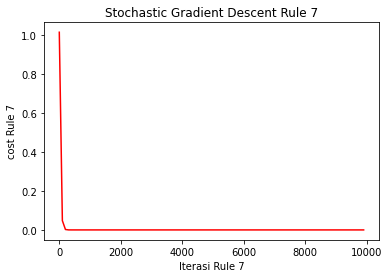

In [168]:
plt.xlabel("Iterasi Rule 7")
plt.ylabel("cost Rule 7")
plt.title("Stochastic Gradient Descent Rule 7")
plt.plot(s_iterasi_rule7_list,s_cost_rule7_list, color='red', label='Eror')
plt.show()

In [169]:
s_cost_rule7

4.004701689161043e-29

In [170]:
s_b0_rule7

-0.5760157420451207

In [171]:
s_bpoly_rule7

array([0.51038662, 0.90999754, 1.        , 1.        ])

In [172]:
data_rule_7

Age   TP   DB   AGR  Liver_Disease
0     65  6.8  0.1  0.90              2
61    68  5.8  0.1  1.00              2
74    58  6.2  0.2  1.00              2
91    63  5.5  0.1  0.80              2
107   65  5.3  0.1  1.10              2
109   60  7.1  0.2  1.20              2
117   72  5.8  0.1  0.50              2
118   72  5.8  0.1  0.50              2
136   55  5.7  0.2  0.80              2
179   61  8.5  0.1  1.00              2
185   55  5.9  0.2  0.80              2
217   58  6.0  0.2  1.00              2
265   75  6.2  0.2  0.80              2
294   58  7.0  0.2  1.30              2
307   58  6.7  0.1  0.90              2
314   72  6.3  0.1  1.00              2
315   72  6.0  0.2  1.00              2
316   75  6.9  0.2  1.10              2
329   70  6.3  0.1  0.75              2
340   65  7.0  0.2  0.75              2
365   58  7.1  0.2  0.90              2
426   69  6.9  0.2  0.70              2
452   55  7.0  0.2  0.70              2

In [173]:
X7=np.array(data_rule_7.iloc[::,:-1])
X7

array([[65.  ,  6.8 ,  0.1 ,  0.9 ],
       [68.  ,  5.8 ,  0.1 ,  1.  ],
       [58.  ,  6.2 ,  0.2 ,  1.  ],
       [63.  ,  5.5 ,  0.1 ,  0.8 ],
       [65.  ,  5.3 ,  0.1 ,  1.1 ],
       [60.  ,  7.1 ,  0.2 ,  1.2 ],
       [72.  ,  5.8 ,  0.1 ,  0.5 ],
       [72.  ,  5.8 ,  0.1 ,  0.5 ],
       [55.  ,  5.7 ,  0.2 ,  0.8 ],
       [61.  ,  8.5 ,  0.1 ,  1.  ],
       [55.  ,  5.9 ,  0.2 ,  0.8 ],
       [58.  ,  6.  ,  0.2 ,  1.  ],
       [75.  ,  6.2 ,  0.2 ,  0.8 ],
       [58.  ,  7.  ,  0.2 ,  1.3 ],
       [58.  ,  6.7 ,  0.1 ,  0.9 ],
       [72.  ,  6.3 ,  0.1 ,  1.  ],
       [72.  ,  6.  ,  0.2 ,  1.  ],
       [75.  ,  6.9 ,  0.2 ,  1.1 ],
       [70.  ,  6.3 ,  0.1 ,  0.75],
       [65.  ,  7.  ,  0.2 ,  0.75],
       [58.  ,  7.1 ,  0.2 ,  0.9 ],
       [69.  ,  6.9 ,  0.2 ,  0.7 ],
       [55.  ,  7.  ,  0.2 ,  0.7 ]])

In [174]:
Y7=np.array(data_rule_7.iloc[:,3])
Y7

array([0.9 , 1.  , 1.  , 0.8 , 1.1 , 1.2 , 0.5 , 0.5 , 0.8 , 1.  , 0.8 ,
       1.  , 0.8 , 1.3 , 0.9 , 1.  , 1.  , 1.1 , 0.75, 0.75, 0.9 , 0.7 ,
       0.7 ])

In [175]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X7_poly = poly_reg.fit_transform(X7)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X7_poly, Y7) 
# Proses Training Model
poly_reg.fit(X7, Y7) 

# Memprediksi hasil dengan regresi polynomial
y7_pred=lin_reg_2.predict(poly_reg.fit_transform(X7))
y7_pred

data_rule_7['pred'] = y7_pred
data_rule_7

Age   TP   DB   AGR  Liver_Disease  pred
0     65  6.8  0.1  0.90              2  0.90
61    68  5.8  0.1  1.00              2  1.00
74    58  6.2  0.2  1.00              2  1.00
91    63  5.5  0.1  0.80              2  0.80
107   65  5.3  0.1  1.10              2  1.10
109   60  7.1  0.2  1.20              2  1.20
117   72  5.8  0.1  0.50              2  0.50
118   72  5.8  0.1  0.50              2  0.50
136   55  5.7  0.2  0.80              2  0.80
179   61  8.5  0.1  1.00              2  1.00
185   55  5.9  0.2  0.80              2  0.80
217   58  6.0  0.2  1.00              2  1.00
265   75  6.2  0.2  0.80              2  0.80
294   58  7.0  0.2  1.30              2  1.30
307   58  6.7  0.1  0.90              2  0.90
314   72  6.3  0.1  1.00              2  1.00
315   72  6.0  0.2  1.00              2  1.00
316   75  6.9  0.2  1.10              2  1.10
329   70  6.3  0.1  0.75              2  0.75
340   65  7.0  0.2  0.75              2  0.75
365   58  7.1  0.2  0.90              2  0.90
426   69  6.9  0.2  0.70              2  0.70
452   55  7.0  0.2  0.70              2  0.70

##Rule 8

In [176]:
rule_8 = df_fuzz[df_fuzz['Rule']==" Jika X1 Muda dan X2 Normal dan X3 Menurun dan X4 Rendah maka Y Liver"]
index=rule_8.index
data_rule_8=df_fuzz.iloc[index,:5]
data_rule_8

Age   TP   DB   AGR  Liver_Disease
23    17  7.2  0.2  1.18              1
43    33  8.0  0.2  1.00              1
73    13  7.2  0.1  1.00              1
88    27  5.3  0.2  0.70              1
97    24  5.5  0.2  0.71              1
153   21  6.4  0.2  1.00              1
184   22  7.9  0.2  0.90              1
202   14  8.0  0.2  1.00              1
208   14  6.5  0.2  0.90              1
236   24  7.4  0.2  1.20              1
249   30  7.9  0.2  1.30              1
254   21  7.3  0.2  1.20              1
289   21  6.8  0.2  1.00              1
291   16  7.2  0.2  1.30              1
298   25  7.6  0.1  1.30              1
302   20  6.1  0.2  0.90              1
347   30  7.5  0.2  0.92              1
358   17  7.3  0.2  1.20              1
367   28  7.0  0.2  1.00              1
369   32  7.4  0.2  0.70              1
393   17  7.9  0.1  1.10              1
396   30  7.8  0.2  1.20              1
408   32  6.1  0.2  0.96              1

In [177]:
rule_8.to_csv('hasilrule8.csv') 

###Stochastic Gradient Descent

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [179]:
df_rule8=pd.read_csv('hasilrule8.csv',sep=',')
df_rule8

Unnamed: 0  Age   TP   DB   AGR  Liver_Disease Age_fuzz TP_fuzz  DB_fuzz  \
0           23   17  7.2  0.2  1.18              1     Muda  Normal  Menurun   
1           43   33  8.0  0.2  1.00              1     Muda  Normal  Menurun   
2           73   13  7.2  0.1  1.00              1     Muda  Normal  Menurun   
3           88   27  5.3  0.2  0.70              1     Muda  Normal  Menurun   
4           97   24  5.5  0.2  0.71              1     Muda  Normal  Menurun   
5          153   21  6.4  0.2  1.00              1     Muda  Normal  Menurun   
6          184   22  7.9  0.2  0.90              1     Muda  Normal  Menurun   
7          202   14  8.0  0.2  1.00              1     Muda  Normal  Menurun   
8          208   14  6.5  0.2  0.90              1     Muda  Normal  Menurun   
9          236   24  7.4  0.2  1.20              1     Muda  Normal  Menurun   
10         249   30  7.9  0.2  1.30              1     Muda  Normal  Menurun   
11         254   21  7.3  0.2  1.20              1     Muda  Normal  Menurun   
12         289   21  6.8  0.2  1.00              1     Muda  Normal  Menurun   
13         291   16  7.2  0.2  1.30              1     Muda  Normal  Menurun   
14         298   25  7.6  0.1  1.30              1     Muda  Normal  Menurun   
15         302   20  6.1  0.2  0.90              1     Muda  Normal  Menurun   
16         347   30  7.5  0.2  0.92              1     Muda  Normal  Menurun   
17         358   17  7.3  0.2  1.20              1     Muda  Normal  Menurun   
18         367   28  7.0  0.2  1.00              1     Muda  Normal  Menurun   
19         369   32  7.4  0.2  0.70              1     Muda  Normal  Menurun   
20         393   17  7.9  0.1  1.10              1     Muda  Normal  Menurun   
21         396   30  7.8  0.2  1.20              1     Muda  Normal  Menurun   
22         408   32  6.1  0.2  0.96              1     Muda  Normal  Menurun   

   AGR_fuzz Liver_Disease_fuzz   miu_Age        miu_TP  miu_DB   miu_AGR  \
0    Rendah              Liver  0.583333  8.333333e-01     0.0  0.833333   
1    Rendah              Liver  0.153846  2.727273e-01     0.0  0.833333   
2    Rendah              Liver  0.250000  8.333333e-01     0.0  0.833333   
3    Rendah              Liver  0.615385  0.000000e+00     0.0  0.000000   
4    Rendah              Liver  0.846154  0.000000e+00     0.0  0.000000   
5    Rendah              Liver  0.916667  2.960595e-15     0.0  0.833333   
6    Rendah              Liver  1.000000  8.333333e-01     0.0  0.000000   
7    Rendah              Liver  0.333333  2.727273e-01     0.0  0.833333   
8    Rendah              Liver  0.333333  2.960595e-15     0.0  0.000000   
9    Rendah              Liver  0.846154  8.333333e-01     0.0  0.833333   
10   Rendah              Liver  0.384615  8.333333e-01     0.0  0.833333   
11   Rendah              Liver  0.916667  8.333333e-01     0.0  0.833333   
12   Rendah              Liver  0.916667  2.960595e-15     0.0  0.833333   
13   Rendah              Liver  0.500000  8.333333e-01     0.0  0.833333   
14   Rendah              Liver  0.769231  8.333333e-01     0.0  0.833333   
15   Rendah              Liver  0.833333  2.960595e-15     0.0  0.000000   
16   Rendah              Liver  0.384615  8.333333e-01     0.0  0.000000   
17   Rendah              Liver  0.583333  8.333333e-01     0.0  0.833333   
18   Rendah              Liver  0.538462  8.333333e-01     0.0  0.833333   
19   Rendah              Liver  0.230769  8.333333e-01     0.0  0.000000   
20   Rendah              Liver  0.583333  8.333333e-01     0.0  0.833333   
21   Rendah              Liver  0.384615  8.333333e-01     0.0  0.833333   
22   Rendah              Liver  0.230769  2.960595e-15     0.0  0.000000   

    miu_Liver_Disease                                               Rule  
0                 1.0   Jika X1 Muda dan X2 Normal dan X3 Menurun dan...  
1                 1.0   Jika X1 Muda dan X2 Normal dan X3 Menurun dan...  
2                 1.0   Jika X1 M

In [180]:
df_rule8=df_rule8.drop(columns=['Unnamed: 0'])
df_rule8

Age   TP   DB   AGR  Liver_Disease Age_fuzz TP_fuzz  DB_fuzz AGR_fuzz  \
0    17  7.2  0.2  1.18              1     Muda  Normal  Menurun   Rendah   
1    33  8.0  0.2  1.00              1     Muda  Normal  Menurun   Rendah   
2    13  7.2  0.1  1.00              1     Muda  Normal  Menurun   Rendah   
3    27  5.3  0.2  0.70              1     Muda  Normal  Menurun   Rendah   
4    24  5.5  0.2  0.71              1     Muda  Normal  Menurun   Rendah   
5    21  6.4  0.2  1.00              1     Muda  Normal  Menurun   Rendah   
6    22  7.9  0.2  0.90              1     Muda  Normal  Menurun   Rendah   
7    14  8.0  0.2  1.00              1     Muda  Normal  Menurun   Rendah   
8    14  6.5  0.2  0.90              1     Muda  Normal  Menurun   Rendah   
9    24  7.4  0.2  1.20              1     Muda  Normal  Menurun   Rendah   
10   30  7.9  0.2  1.30              1     Muda  Normal  Menurun   Rendah   
11   21  7.3  0.2  1.20              1     Muda  Normal  Menurun   Rendah   
12   21  6.8  0.2  1.00              1     Muda  Normal  Menurun   Rendah   
13   16  7.2  0.2  1.30              1     Muda  Normal  Menurun   Rendah   
14   25  7.6  0.1  1.30              1     Muda  Normal  Menurun   Rendah   
15   20  6.1  0.2  0.90              1     Muda  Normal  Menurun   Rendah   
16   30  7.5  0.2  0.92              1     Muda  Normal  Menurun   Rendah   
17   17  7.3  0.2  1.20              1     Muda  Normal  Menurun   Rendah   
18   28  7.0  0.2  1.00              1     Muda  Normal  Menurun   Rendah   
19   32  7.4  0.2  0.70              1     Muda  Normal  Menurun   Rendah   
20   17  7.9  0.1  1.10              1     Muda  Normal  Menurun   Rendah   
21   30  7.8  0.2  1.20              1     Muda  Normal  Menurun   Rendah   
22   32  6.1  0.2  0.96              1     Muda  Normal  Menurun   Rendah   

   Liver_Disease_fuzz   miu_Age        miu_TP  miu_DB   miu_AGR  \
0               Liver  0.583333  8.333333e-01     0.0  0.833333   
1               Liver  0.153846  2.727273e-01     0.0  0.833333   
2               Liver  0.250000  8.333333e-01     0.0  0.833333   
3               Liver  0.615385  0.000000e+00     0.0  0.000000   
4               Liver  0.846154  0.000000e+00     0.0  0.000000   
5               Liver  0.916667  2.960595e-15     0.0  0.833333   
6               Liver  1.000000  8.333333e-01     0.0  0.000000   
7               Liver  0.333333  2.727273e-01     0.0  0.833333   
8               Liver  0.333333  2.960595e-15     0.0  0.000000   
9               Liver  0.846154  8.333333e-01     0.0  0.833333   
10              Liver  0.384615  8.333333e-01     0.0  0.833333   
11              Liver  0.916667  8.333333e-01     0.0  0.833333   
12              Liver  0.916667  2.960595e-15     0.0  0.833333   
13              Liver  0.500000  8.333333e-01     0.0  0.833333   
14              Liver  0.769231  8.333333e-01     0.0  0.833333   
15              Liver  0.833333  2.960595e-15     0.0  0.000000   
16              Liver  0.384615  8.333333e-01     0.0  0.000000   
17              Liver  0.583333  8.333333e-01     0.0  0.833333   
18              Liver  0.538462  8.333333e-01     0.0  0.833333   
19              Liver  0.230769  8.333333e-01     0.0  0.000000   
20              Liver  0.583333  8.333333e-01     0.0  0.833333   
21              Liver  0.384615  8.333333e-01     0.0  0.833333   
22              Liver  0.230769  2.960595e-15     0.0  0.000000   

    miu_Liver_Disease                                               Rule  
0                 1.0   Jika X1 Muda dan X2 Normal dan X3 Menurun dan...  
1                 1.0   Jika X1 Muda dan X2 Normal dan X3 Menurun dan...  
2                 1.0   Jika X1 Muda dan X2 Normal dan X3 Menurun dan...  
3                 1.0   Jika X1 Muda dan X2 Normal dan X3 Menurun dan...  
4                 1.0   Jika X1 Muda dan X2 Normal dan X3 Menurun dan...  
5                 1.0   Jika X1 Muda dan X2 Normal dan X3 Menurun dan...  
6                 1.0

In [181]:
from sklearn import preprocessing
sx8 = preprocessing.MinMaxScaler()
sy8 = preprocessing.MinMaxScaler()

scaled_X8 = sx8.fit_transform(data_rule_8.drop('Liver_Disease',axis='columns'))
scaled_y8 = sy8.fit_transform(data_rule_8['Liver_Disease'].values.reshape(rule_8.shape[0],1))

scaled_X8

array([[0.2       , 0.7037037 , 1.        , 0.8       ],
       [1.        , 1.        , 1.        , 0.5       ],
       [0.        , 0.7037037 , 0.        , 0.5       ],
       [0.7       , 0.        , 1.        , 0.        ],
       [0.55      , 0.07407407, 1.        , 0.01666667],
       [0.4       , 0.40740741, 1.        , 0.5       ],
       [0.45      , 0.96296296, 1.        , 0.33333333],
       [0.05      , 1.        , 1.        , 0.5       ],
       [0.05      , 0.44444444, 1.        , 0.33333333],
       [0.55      , 0.77777778, 1.        , 0.83333333],
       [0.85      , 0.96296296, 1.        , 1.        ],
       [0.4       , 0.74074074, 1.        , 0.83333333],
       [0.4       , 0.55555556, 1.        , 0.5       ],
       [0.15      , 0.7037037 , 1.        , 1.        ],
       [0.6       , 0.85185185, 0.        , 1.        ],
       [0.35      , 0.2962963 , 1.        , 0.33333333],
       [0.85      , 0.81481481, 1.        , 0.36666667],
       [0.2       , 0.74074074,

In [182]:
scaled_y8_reshape=scaled_y8.reshape(scaled_y8.shape[0],)
scaled_y8_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [183]:
def stochastic_gradient_descent_rule8(X8, y8, iterasi, learning_rate = 0.1):

    jumlah_variabel_rule8 = X8.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule8 = np.ones(shape=(jumlah_variabel_rule8))       # b1, b2, ... b(jumlah variabel)
    b0_rule8 = 0                                         # b0 atau bias
    n = X8.shape[0]                                 # jumlah baris data X
    
    cost_rule8_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule8_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule8_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_index = np.random.RandomState(seed=42).randint(0, n-1)      # Memilih indeks data random untuk update parameter
        sample_x8 = X8[random_index]
        sample_y8 = y8[random_index]
        
        y8_pred = np.dot(bpoly_rule8, sample_x8.T) + b0_rule8                  # Menghitung y_pred pada setiap iterasi
        
        bpoly_rule8_grad = -(2/n)*(sample_x8.T.dot(sample_y8-y8_pred))    # Menghitung perubahan/gradien bpoly setiap iterasi
        b0_rule8_grad = -(2/n)*np.sum(sample_y8-y8_pred)                 # Menghitung perubahan/gradien b0 setiap iterasi
        bpoly_rule8 = bpoly_rule8 - learning_rate * bpoly_rule8_grad               # Memperbaharui bpoly setiap iterasi
        b0_rule8 = b0_rule8 - learning_rate * b0_rule8_grad                        # Memperbaharui bpoly setiap iterasi
        
        # Menyimpan parameter b dalam list tunggal
        bp=[]
        for jv_rule8 in range(jumlah_variabel_rule8):
            bp_rule8=bpoly_rule8[jv_rule8]
            bp.append(bp_rule8)
        b_rule8=[b0_rule8]+bp
        
        cost_rule8 = np.mean(np.square(sample_y8-y8_pred))        # MSE (Mean Squared Error)
        
        if i%100==0:                                      # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule8_list.append(cost_rule8)                        # Menyimpan nilai cost setiap iterasi
            iterasi_rule8_list.append(i)                        # Menyimpan nilai iterasi setiap iterasi
            b_rule8_list.append(b_rule8)                              # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule8, b0_rule8, cost_rule8, b_rule8_list, cost_rule8_list, iterasi_rule8_list  # Output

In [184]:
import time
mulai_rule8 = time.time()
s_bpoly_rule8, s_b0_rule8, s_cost_rule8, s_b_rule8_list, s_cost_rule8_list, s_iterasi_rule8_list=stochastic_gradient_descent_rule8 (scaled_X8, 
                                                                                                                                    scaled_y8_reshape,
                                                                                                                                    iterasi=10000,
                                                                                                                                    learning_rate = 0.1)
selesai_rule8 = time.time()
waktu_komputasi_rule8 = (selesai_rule8 - mulai_rule8)
print("Waktu Komputasi Rule 8: ",waktu_komputasi_rule8)

Waktu Komputasi Rule 8:  3.12687611579895


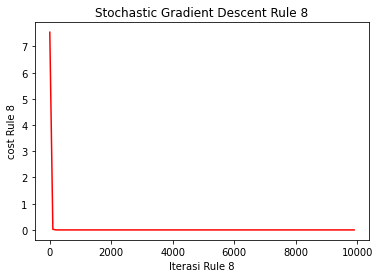

In [185]:
plt.xlabel("Iterasi Rule 8")
plt.ylabel("cost Rule 8")
plt.title("Stochastic Gradient Descent Rule 8")
plt.plot(s_iterasi_rule8_list,s_cost_rule8_list, color='red', label='Eror')
plt.show()

In [186]:
s_cost_rule8

2.4158865222393487e-30

In [187]:
s_b0_rule8

-0.8473846329661195

In [188]:
s_bpoly_rule8

array([0.61867692, 0.18399998, 0.15261537, 0.71753846])

In [189]:
data_rule_8

Age   TP   DB   AGR  Liver_Disease
23    17  7.2  0.2  1.18              1
43    33  8.0  0.2  1.00              1
73    13  7.2  0.1  1.00              1
88    27  5.3  0.2  0.70              1
97    24  5.5  0.2  0.71              1
153   21  6.4  0.2  1.00              1
184   22  7.9  0.2  0.90              1
202   14  8.0  0.2  1.00              1
208   14  6.5  0.2  0.90              1
236   24  7.4  0.2  1.20              1
249   30  7.9  0.2  1.30              1
254   21  7.3  0.2  1.20              1
289   21  6.8  0.2  1.00              1
291   16  7.2  0.2  1.30              1
298   25  7.6  0.1  1.30              1
302   20  6.1  0.2  0.90              1
347   30  7.5  0.2  0.92              1
358   17  7.3  0.2  1.20              1
367   28  7.0  0.2  1.00              1
369   32  7.4  0.2  0.70              1
393   17  7.9  0.1  1.10              1
396   30  7.8  0.2  1.20              1
408   32  6.1  0.2  0.96              1

In [190]:
X8=np.array(data_rule_8.iloc[::,:-1])
X8

array([[17.  ,  7.2 ,  0.2 ,  1.18],
       [33.  ,  8.  ,  0.2 ,  1.  ],
       [13.  ,  7.2 ,  0.1 ,  1.  ],
       [27.  ,  5.3 ,  0.2 ,  0.7 ],
       [24.  ,  5.5 ,  0.2 ,  0.71],
       [21.  ,  6.4 ,  0.2 ,  1.  ],
       [22.  ,  7.9 ,  0.2 ,  0.9 ],
       [14.  ,  8.  ,  0.2 ,  1.  ],
       [14.  ,  6.5 ,  0.2 ,  0.9 ],
       [24.  ,  7.4 ,  0.2 ,  1.2 ],
       [30.  ,  7.9 ,  0.2 ,  1.3 ],
       [21.  ,  7.3 ,  0.2 ,  1.2 ],
       [21.  ,  6.8 ,  0.2 ,  1.  ],
       [16.  ,  7.2 ,  0.2 ,  1.3 ],
       [25.  ,  7.6 ,  0.1 ,  1.3 ],
       [20.  ,  6.1 ,  0.2 ,  0.9 ],
       [30.  ,  7.5 ,  0.2 ,  0.92],
       [17.  ,  7.3 ,  0.2 ,  1.2 ],
       [28.  ,  7.  ,  0.2 ,  1.  ],
       [32.  ,  7.4 ,  0.2 ,  0.7 ],
       [17.  ,  7.9 ,  0.1 ,  1.1 ],
       [30.  ,  7.8 ,  0.2 ,  1.2 ],
       [32.  ,  6.1 ,  0.2 ,  0.96]])

In [191]:
Y8=np.array(data_rule_8.iloc[:,3])
Y8

array([1.18, 1.  , 1.  , 0.7 , 0.71, 1.  , 0.9 , 1.  , 0.9 , 1.2 , 1.3 ,
       1.2 , 1.  , 1.3 , 1.3 , 0.9 , 0.92, 1.2 , 1.  , 0.7 , 1.1 , 1.2 ,
       0.96])

In [192]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X8_poly = poly_reg.fit_transform(X8)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X8_poly, Y8) 
# Proses Training Model
poly_reg.fit(X8, Y8) 

# Memprediksi hasil dengan regresi polynomial
y8_pred=lin_reg_2.predict(poly_reg.fit_transform(X8))
y8_pred

data_rule_8['pred'] = y8_pred
data_rule_8

Age   TP   DB   AGR  Liver_Disease  pred
23    17  7.2  0.2  1.18              1  1.18
43    33  8.0  0.2  1.00              1  1.00
73    13  7.2  0.1  1.00              1  1.00
88    27  5.3  0.2  0.70              1  0.70
97    24  5.5  0.2  0.71              1  0.71
153   21  6.4  0.2  1.00              1  1.00
184   22  7.9  0.2  0.90              1  0.90
202   14  8.0  0.2  1.00              1  1.00
208   14  6.5  0.2  0.90              1  0.90
236   24  7.4  0.2  1.20              1  1.20
249   30  7.9  0.2  1.30              1  1.30
254   21  7.3  0.2  1.20              1  1.20
289   21  6.8  0.2  1.00              1  1.00
291   16  7.2  0.2  1.30              1  1.30
298   25  7.6  0.1  1.30              1  1.30
302   20  6.1  0.2  0.90              1  0.90
347   30  7.5  0.2  0.92              1  0.92
358   17  7.3  0.2  1.20              1  1.20
367   28  7.0  0.2  1.00              1  1.00
369   32  7.4  0.2  0.70              1  0.70
393   17  7.9  0.1  1.10              1  1.10
396   30  7.8  0.2  1.20              1  1.20
408   32  6.1  0.2  0.96              1  0.96

##Rule 9

In [193]:
rule_9 = df_fuzz[df_fuzz['Rule']==" Jika X1 Tua dan X2 Normal dan X3 Menurun dan X4 Rendah maka Y Liver"]
index=rule_9.index
data_rule_9=df_fuzz.iloc[index,:5]
data_rule_9

Age   TP   DB   AGR  Liver_Disease
16    84  6.0  0.2  1.10              1
56    60  6.3  0.2  0.90              1
90    55  6.1  0.2  1.20              1
100   60  6.2  0.1  1.10              1
105   65  5.4  0.2  1.10              1
164   55  6.2  0.2  1.00              1
228   60  7.8  0.2  1.10              1
237   58  8.2  0.2  1.10              1
286   65  6.8  0.2  0.70              1
299   56  7.0  0.1  1.30              1
304   72  7.3  0.2  1.00              1
357   61  6.3  0.2  0.80              1
370   61  6.9  0.2  0.90              1
401   60  7.0  0.2  1.00              1
402   65  5.9  0.1  1.18              1
436   65  7.2  0.2  0.90              1
439   62  7.3  0.2  1.20              1
475   60  5.9  0.1  0.37              1

In [194]:
rule_9.to_csv('hasilrule9.csv') 

###Stochastic Gradient Descent

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [196]:
df_rule9=pd.read_csv('hasilrule9.csv',sep=',')
df_rule9

Unnamed: 0  Age   TP   DB   AGR  Liver_Disease Age_fuzz TP_fuzz  DB_fuzz  \
0           16   84  6.0  0.2  1.10              1      Tua  Normal  Menurun   
1           56   60  6.3  0.2  0.90              1      Tua  Normal  Menurun   
2           90   55  6.1  0.2  1.20              1      Tua  Normal  Menurun   
3          100   60  6.2  0.1  1.10              1      Tua  Normal  Menurun   
4          105   65  5.4  0.2  1.10              1      Tua  Normal  Menurun   
5          164   55  6.2  0.2  1.00              1      Tua  Normal  Menurun   
6          228   60  7.8  0.2  1.10              1      Tua  Normal  Menurun   
7          237   58  8.2  0.2  1.10              1      Tua  Normal  Menurun   
8          286   65  6.8  0.2  0.70              1      Tua  Normal  Menurun   
9          299   56  7.0  0.1  1.30              1      Tua  Normal  Menurun   
10         304   72  7.3  0.2  1.00              1      Tua  Normal  Menurun   
11         357   61  6.3  0.2  0.80              1      Tua  Normal  Menurun   
12         370   61  6.9  0.2  0.90              1      Tua  Normal  Menurun   
13         401   60  7.0  0.2  1.00              1      Tua  Normal  Menurun   
14         402   65  5.9  0.1  1.18              1      Tua  Normal  Menurun   
15         436   65  7.2  0.2  0.90              1      Tua  Normal  Menurun   
16         439   62  7.3  0.2  1.20              1      Tua  Normal  Menurun   
17         475   60  5.9  0.1  0.37              1      Tua  Normal  Menurun   

   AGR_fuzz Liver_Disease_fuzz   miu_Age        miu_TP  miu_DB   miu_AGR  \
0    Rendah              Liver  0.388889  2.960595e-15     0.0  0.833333   
1    Rendah              Liver  0.277778  2.960595e-15     0.0  0.000000   
2    Rendah              Liver  0.000000  2.960595e-15     0.0  0.833333   
3    Rendah              Liver  0.277778  2.960595e-15     0.0  0.833333   
4    Rendah              Liver  0.555556  0.000000e+00     0.0  0.833333   
5    Rendah              Liver  0.000000  2.960595e-15     0.0  0.833333   
6    Rendah              Liver  0.277778  8.333333e-01     0.0  0.833333   
7    Rendah              Liver  0.166667  2.727273e-01     0.0  0.833333   
8    Rendah              Liver  0.555556  2.960595e-15     0.0  0.000000   
9    Rendah              Liver  0.055556  8.333333e-01     0.0  0.833333   
10   Rendah              Liver  0.944444  8.333333e-01     0.0  0.833333   
11   Rendah              Liver  0.333333  2.960595e-15     0.0  0.000000   
12   Rendah              Liver  0.333333  2.960595e-15     0.0  0.000000   
13   Rendah              Liver  0.277778  8.333333e-01     0.0  0.833333   
14   Rendah              Liver  0.555556  0.000000e+00     0.0  0.833333   
15   Rendah              Liver  0.555556  8.333333e-01     0.0  0.000000   
16   Rendah              Liver  0.388889  8.333333e-01     0.0  0.833333   
17   Rendah              Liver  0.277778  0.000000e+00     0.0  0.000000   

    miu_Liver_Disease                                               Rule  
0                 1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
1                 1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
2                 1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
3                 1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
4                 1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
5                 1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
6                 1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
7                 1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
8                 1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
9                 1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
10                1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
11                1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
12                1.0   Jika X1 Tua dan X2 Normal dan X3 Menuru

In [197]:
df_rule9=df_rule9.drop(columns=['Unnamed: 0'])
df_rule9

Age   TP   DB   AGR  Liver_Disease Age_fuzz TP_fuzz  DB_fuzz AGR_fuzz  \
0    84  6.0  0.2  1.10              1      Tua  Normal  Menurun   Rendah   
1    60  6.3  0.2  0.90              1      Tua  Normal  Menurun   Rendah   
2    55  6.1  0.2  1.20              1      Tua  Normal  Menurun   Rendah   
3    60  6.2  0.1  1.10              1      Tua  Normal  Menurun   Rendah   
4    65  5.4  0.2  1.10              1      Tua  Normal  Menurun   Rendah   
5    55  6.2  0.2  1.00              1      Tua  Normal  Menurun   Rendah   
6    60  7.8  0.2  1.10              1      Tua  Normal  Menurun   Rendah   
7    58  8.2  0.2  1.10              1      Tua  Normal  Menurun   Rendah   
8    65  6.8  0.2  0.70              1      Tua  Normal  Menurun   Rendah   
9    56  7.0  0.1  1.30              1      Tua  Normal  Menurun   Rendah   
10   72  7.3  0.2  1.00              1      Tua  Normal  Menurun   Rendah   
11   61  6.3  0.2  0.80              1      Tua  Normal  Menurun   Rendah   
12   61  6.9  0.2  0.90              1      Tua  Normal  Menurun   Rendah   
13   60  7.0  0.2  1.00              1      Tua  Normal  Menurun   Rendah   
14   65  5.9  0.1  1.18              1      Tua  Normal  Menurun   Rendah   
15   65  7.2  0.2  0.90              1      Tua  Normal  Menurun   Rendah   
16   62  7.3  0.2  1.20              1      Tua  Normal  Menurun   Rendah   
17   60  5.9  0.1  0.37              1      Tua  Normal  Menurun   Rendah   

   Liver_Disease_fuzz   miu_Age        miu_TP  miu_DB   miu_AGR  \
0               Liver  0.388889  2.960595e-15     0.0  0.833333   
1               Liver  0.277778  2.960595e-15     0.0  0.000000   
2               Liver  0.000000  2.960595e-15     0.0  0.833333   
3               Liver  0.277778  2.960595e-15     0.0  0.833333   
4               Liver  0.555556  0.000000e+00     0.0  0.833333   
5               Liver  0.000000  2.960595e-15     0.0  0.833333   
6               Liver  0.277778  8.333333e-01     0.0  0.833333   
7               Liver  0.166667  2.727273e-01     0.0  0.833333   
8               Liver  0.555556  2.960595e-15     0.0  0.000000   
9               Liver  0.055556  8.333333e-01     0.0  0.833333   
10              Liver  0.944444  8.333333e-01     0.0  0.833333   
11              Liver  0.333333  2.960595e-15     0.0  0.000000   
12              Liver  0.333333  2.960595e-15     0.0  0.000000   
13              Liver  0.277778  8.333333e-01     0.0  0.833333   
14              Liver  0.555556  0.000000e+00     0.0  0.833333   
15              Liver  0.555556  8.333333e-01     0.0  0.000000   
16              Liver  0.388889  8.333333e-01     0.0  0.833333   
17              Liver  0.277778  0.000000e+00     0.0  0.000000   

    miu_Liver_Disease                                               Rule  
0                 1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
1                 1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
2                 1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
3                 1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
4                 1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
5                 1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
6                 1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
7                 1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
8                 1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
9                 1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
10                1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
11                1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
12                1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
13                1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
14                1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...  
15                1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun d

In [198]:
from sklearn import preprocessing
sx9 = preprocessing.MinMaxScaler()
sy9 = preprocessing.MinMaxScaler()

scaled_X9 = sx9.fit_transform(data_rule_9.drop('Liver_Disease',axis='columns'))
scaled_y9 = sy9.fit_transform(data_rule_9['Liver_Disease'].values.reshape(rule_9.shape[0],1))

scaled_X9

array([[1.        , 0.21428571, 1.        , 0.78494624],
       [0.17241379, 0.32142857, 1.        , 0.56989247],
       [0.        , 0.25      , 1.        , 0.89247312],
       [0.17241379, 0.28571429, 0.        , 0.78494624],
       [0.34482759, 0.        , 1.        , 0.78494624],
       [0.        , 0.28571429, 1.        , 0.67741935],
       [0.17241379, 0.85714286, 1.        , 0.78494624],
       [0.10344828, 1.        , 1.        , 0.78494624],
       [0.34482759, 0.5       , 1.        , 0.35483871],
       [0.03448276, 0.57142857, 0.        , 1.        ],
       [0.5862069 , 0.67857143, 1.        , 0.67741935],
       [0.20689655, 0.32142857, 1.        , 0.46236559],
       [0.20689655, 0.53571429, 1.        , 0.56989247],
       [0.17241379, 0.57142857, 1.        , 0.67741935],
       [0.34482759, 0.17857143, 0.        , 0.87096774],
       [0.34482759, 0.64285714, 1.        , 0.56989247],
       [0.24137931, 0.67857143, 1.        , 0.89247312],
       [0.17241379, 0.17857143,

In [199]:
scaled_y9_reshape=scaled_y9.reshape(scaled_y9.shape[0],)
scaled_y9_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [200]:
def stochastic_gradient_descent_rule9(X9, y9, iterasi, learning_rate = 0.1):

    jumlah_variabel_rule9 = X9.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule9 = np.ones(shape=(jumlah_variabel_rule9))       # b1, b2, ... b(jumlah variabel)
    b0_rule9 = 0                                         # b0 atau bias
    n = X9.shape[0]                                 # jumlah baris data X
    
    cost_rule9_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule9_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule9_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_index = np.random.RandomState(seed=42).randint(0, n-1)      # Memilih indeks data random untuk update parameter
        sample_x9 = X9[random_index]
        sample_y9 = y9[random_index]
        
        y9_pred = np.dot(bpoly_rule9, sample_x9.T) + b0_rule9                  # Menghitung y_pred pada setiap iterasi
        
        bpoly_rule9_grad = -(2/n)*(sample_x9.T.dot(sample_y9-y9_pred))    # Menghitung perubahan/gradien bpoly setiap iterasi
        b0_rule9_grad = -(2/n)*np.sum(sample_y9-y9_pred)                 # Menghitung perubahan/gradien b0 setiap iterasi
        bpoly_rule9 = bpoly_rule9 - learning_rate * bpoly_rule9_grad               # Memperbaharui bpoly setiap iterasi
        b0_rule9 = b0_rule9 - learning_rate * b0_rule9_grad                        # Memperbaharui bpoly setiap iterasi
        
        # Menyimpan parameter b dalam list tunggal
        bp=[]
        for jv_rule9 in range(jumlah_variabel_rule9):
            bp_rule9=bpoly_rule9[jv_rule9]
            bp.append(bp_rule9)
        b_rule9=[b0_rule9]+bp
        
        cost_rule9 = np.mean(np.square(sample_y9-y9_pred))        # MSE (Mean Squared Error)
        
        if i%100==0:                                      # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule9_list.append(cost_rule9)                        # Menyimpan nilai cost setiap iterasi
            iterasi_rule9_list.append(i)                        # Menyimpan nilai iterasi setiap iterasi
            b_rule9_list.append(b_rule9)                              # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule9, b0_rule9, cost_rule9, b_rule9_list, cost_rule9_list, iterasi_rule9_list  # Output

In [201]:
import time
mulai_rule9 = time.time()
s_bpoly_rule9, s_b0_rule9, s_cost_rule9, s_b_rule9_list, s_cost_rule9_list, s_iterasi_rule9_list=stochastic_gradient_descent_rule9 (scaled_X9, 
                                                                                                                                    scaled_y9_reshape,
                                                                                                                                    iterasi=10000,
                                                                                                                                     learning_rate = 0.1)
selesai_rule9 = time.time()
waktu_komputasi_rule9 = (selesai_rule9 - mulai_rule9)
print("Waktu Komputasi Rule 9: ",waktu_komputasi_rule9)

Waktu Komputasi Rule 9:  3.46213698387146


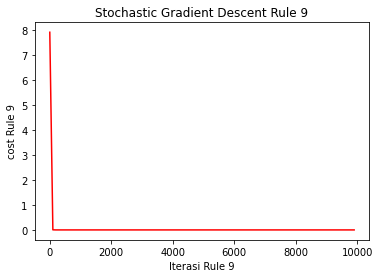

In [202]:
plt.xlabel("Iterasi Rule 9")
plt.ylabel("cost Rule 9")
plt.title("Stochastic Gradient Descent Rule 9")
plt.plot(s_iterasi_rule9_list,s_cost_rule9_list, color='red', label='Eror')
plt.show()

In [203]:
s_cost_rule9

1.4914401489334754e-30

In [204]:
s_b0_rule9

-0.8325549803379588

In [205]:
s_bpoly_rule9

array([0.85645604, 0.28638145, 0.16744502, 0.3464891 ])

In [206]:
data_rule_9

Age   TP   DB   AGR  Liver_Disease
16    84  6.0  0.2  1.10              1
56    60  6.3  0.2  0.90              1
90    55  6.1  0.2  1.20              1
100   60  6.2  0.1  1.10              1
105   65  5.4  0.2  1.10              1
164   55  6.2  0.2  1.00              1
228   60  7.8  0.2  1.10              1
237   58  8.2  0.2  1.10              1
286   65  6.8  0.2  0.70              1
299   56  7.0  0.1  1.30              1
304   72  7.3  0.2  1.00              1
357   61  6.3  0.2  0.80              1
370   61  6.9  0.2  0.90              1
401   60  7.0  0.2  1.00              1
402   65  5.9  0.1  1.18              1
436   65  7.2  0.2  0.90              1
439   62  7.3  0.2  1.20              1
475   60  5.9  0.1  0.37              1

In [207]:
X9=np.array(data_rule_9.iloc[::,:-1])
X9

array([[84.  ,  6.  ,  0.2 ,  1.1 ],
       [60.  ,  6.3 ,  0.2 ,  0.9 ],
       [55.  ,  6.1 ,  0.2 ,  1.2 ],
       [60.  ,  6.2 ,  0.1 ,  1.1 ],
       [65.  ,  5.4 ,  0.2 ,  1.1 ],
       [55.  ,  6.2 ,  0.2 ,  1.  ],
       [60.  ,  7.8 ,  0.2 ,  1.1 ],
       [58.  ,  8.2 ,  0.2 ,  1.1 ],
       [65.  ,  6.8 ,  0.2 ,  0.7 ],
       [56.  ,  7.  ,  0.1 ,  1.3 ],
       [72.  ,  7.3 ,  0.2 ,  1.  ],
       [61.  ,  6.3 ,  0.2 ,  0.8 ],
       [61.  ,  6.9 ,  0.2 ,  0.9 ],
       [60.  ,  7.  ,  0.2 ,  1.  ],
       [65.  ,  5.9 ,  0.1 ,  1.18],
       [65.  ,  7.2 ,  0.2 ,  0.9 ],
       [62.  ,  7.3 ,  0.2 ,  1.2 ],
       [60.  ,  5.9 ,  0.1 ,  0.37]])

In [208]:
Y9=np.array(data_rule_9.iloc[:,3])
Y9

array([1.1 , 0.9 , 1.2 , 1.1 , 1.1 , 1.  , 1.1 , 1.1 , 0.7 , 1.3 , 1.  ,
       0.8 , 0.9 , 1.  , 1.18, 0.9 , 1.2 , 0.37])

In [209]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X9_poly = poly_reg.fit_transform(X9)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X9_poly, Y9) 
# Proses Training Model
poly_reg.fit(X9, Y9) 

# Memprediksi hasil dengan regresi polynomial
y9_pred=lin_reg_2.predict(poly_reg.fit_transform(X9))
y9_pred

data_rule_9['pred'] = y9_pred
data_rule_9

Age   TP   DB   AGR  Liver_Disease  pred
16    84  6.0  0.2  1.10              1  1.10
56    60  6.3  0.2  0.90              1  0.90
90    55  6.1  0.2  1.20              1  1.20
100   60  6.2  0.1  1.10              1  1.10
105   65  5.4  0.2  1.10              1  1.10
164   55  6.2  0.2  1.00              1  1.00
228   60  7.8  0.2  1.10              1  1.10
237   58  8.2  0.2  1.10              1  1.10
286   65  6.8  0.2  0.70              1  0.70
299   56  7.0  0.1  1.30              1  1.30
304   72  7.3  0.2  1.00              1  1.00
357   61  6.3  0.2  0.80              1  0.80
370   61  6.9  0.2  0.90              1  0.90
401   60  7.0  0.2  1.00              1  1.00
402   65  5.9  0.1  1.18              1  1.18
436   65  7.2  0.2  0.90              1  0.90
439   62  7.3  0.2  1.20              1  1.20
475   60  5.9  0.1  0.37              1  0.37

##Rule 10

In [210]:
rule_10 = df_fuzz[df_fuzz['Rule']==" Jika X1 Paruh baya dan X2 Normal dan X3 Meningkat dan X4 Rendah maka Y Nonliver"]
index=rule_10.index
data_rule_10=df_fuzz.iloc[index,:5]
data_rule_10

Age   TP    DB   AGR  Liver_Disease
41    42  5.8   4.5  0.50              2
42    42  5.8   4.5  0.50              2
197   42  5.4   8.9  0.50              2
205   40  5.7   6.4  0.50              2
248   54  7.2  12.6  0.90              2
295   54  7.8  11.4  0.80              2
317   41  6.3   4.3  0.90              2
360   45  7.7  12.8  0.80              2
416   53  8.1  10.4  0.40              2
421   46  7.5   8.5  0.70              2
422   46  5.4  10.0  1.20              2
432   35  9.2  12.1  0.30              2
443   45  5.4  11.7  0.70              2
444   50  7.1  10.8  0.40              2
450   46  7.0   4.2  0.60              2
462   43  6.6  11.8  0.46              2

In [211]:
rule_10.to_csv('hasilrule10.csv') 

###Stochastic Gradient Descent

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [213]:
df_rule10=pd.read_csv('hasilrule10.csv',sep=',')
df_rule10

Unnamed: 0  Age   TP    DB   AGR  Liver_Disease    Age_fuzz TP_fuzz  \
0           41   42  5.8   4.5  0.50              2  Paruh baya  Normal   
1           42   42  5.8   4.5  0.50              2  Paruh baya  Normal   
2          197   42  5.4   8.9  0.50              2  Paruh baya  Normal   
3          205   40  5.7   6.4  0.50              2  Paruh baya  Normal   
4          248   54  7.2  12.6  0.90              2  Paruh baya  Normal   
5          295   54  7.8  11.4  0.80              2  Paruh baya  Normal   
6          317   41  6.3   4.3  0.90              2  Paruh baya  Normal   
7          360   45  7.7  12.8  0.80              2  Paruh baya  Normal   
8          416   53  8.1  10.4  0.40              2  Paruh baya  Normal   
9          421   46  7.5   8.5  0.70              2  Paruh baya  Normal   
10         422   46  5.4  10.0  1.20              2  Paruh baya  Normal   
11         432   35  9.2  12.1  0.30              2  Paruh baya  Normal   
12         443   45  5.4  11.7  0.70              2  Paruh baya  Normal   
13         444   50  7.1  10.8  0.40              2  Paruh baya  Normal   
14         450   46  7.0   4.2  0.60              2  Paruh baya  Normal   
15         462   43  6.6  11.8  0.46              2  Paruh baya  Normal   

      DB_fuzz AGR_fuzz Liver_Disease_fuzz  miu_Age        miu_TP    miu_DB  \
0   Meningkat   Rendah           Nonliver      0.7  0.000000e+00  0.301075   
1   Meningkat   Rendah           Nonliver      0.7  0.000000e+00  0.301075   
2   Meningkat   Rendah           Nonliver      0.7  0.000000e+00  0.731183   
3   Meningkat   Rendah           Nonliver      0.5  0.000000e+00  0.516129   
4   Meningkat   Rendah           Nonliver      0.1  8.333333e-01  0.838710   
5   Meningkat   Rendah           Nonliver      0.1  8.333333e-01  0.946237   
6   Meningkat   Rendah           Nonliver      0.6  2.960595e-15  0.301075   
7   Meningkat   Rendah           Nonliver      1.0  8.333333e-01  0.838710   
8   Meningkat   Rendah           Nonliver      0.2  2.727273e-01  0.946237   
9   Meningkat   Rendah           Nonliver      0.9  8.333333e-01  0.731183   
10  Meningkat   Rendah           Nonliver      0.9  0.000000e+00  0.946237   
11  Meningkat   Rendah           Nonliver      0.0  0.000000e+00  0.838710   
12  Meningkat   Rendah           Nonliver      1.0  0.000000e+00  0.946237   
13  Meningkat   Rendah           Nonliver      0.5  8.333333e-01  0.946237   
14  Meningkat   Rendah           Nonliver      0.9  8.333333e-01  0.301075   
15  Meningkat   Rendah           Nonliver      0.8  2.960595e-15  0.946237   

     miu_AGR  miu_Liver_Disease  \
0   0.000000                0.0   
1   0.000000                0.0   
2   0.000000                0.0   
3   0.000000                0.0   
4   0.000000                0.0   
5   0.000000                0.0   
6   0.000000                0.0   
7   0.000000                0.0   
8   0.000000                0.0   
9   0.000000                0.0   
10  0.833333                0.0   
11  0.000000                0.0   
12  0.000000                0.0   
13  0.000000                0.0   
14  0.000000                0.0   
15  0.000000                0.0   

                                                 Rule  
0    Jika X1 Paruh baya dan X2 Normal dan X3 Menin...  
1    Jika X1 Paruh baya dan X2 Normal dan X3 Menin...  
2    Jika X1 Paruh baya dan X2 Normal dan X3 Menin...  
3    Jika X1 Paruh baya dan X2 Normal dan X3 Menin...  
4    Jika X1 Paruh baya dan X2 Normal dan X3 Menin...  
5    Jika X1 Paruh baya dan X2 Normal dan X3 Menin...  
6    Jika X1 Paruh baya dan X2 Normal dan X3 Menin...  
7    Jika X1 Paruh baya dan X2 Normal dan X3 Menin...  
8    Jika X1 Paruh baya dan X2 Normal dan X3 Menin...  
9    Jika X1 Paruh baya dan X2 Normal dan X3 Menin...  
10   Jika X1 Paruh baya dan X2 Normal dan X3 Menin...  
11   Jika X1 Paruh baya dan X2 Normal dan X3 Menin...  
12   Jika X1 Paruh baya dan X2 Normal dan X3 Menin...  
13   Jika X1 Paruh ba

In [214]:
df_rule10=df_rule10.drop(columns=['Unnamed: 0'])
df_rule10

Age   TP    DB   AGR  Liver_Disease    Age_fuzz TP_fuzz    DB_fuzz  \
0    42  5.8   4.5  0.50              2  Paruh baya  Normal  Meningkat   
1    42  5.8   4.5  0.50              2  Paruh baya  Normal  Meningkat   
2    42  5.4   8.9  0.50              2  Paruh baya  Normal  Meningkat   
3    40  5.7   6.4  0.50              2  Paruh baya  Normal  Meningkat   
4    54  7.2  12.6  0.90              2  Paruh baya  Normal  Meningkat   
5    54  7.8  11.4  0.80              2  Paruh baya  Normal  Meningkat   
6    41  6.3   4.3  0.90              2  Paruh baya  Normal  Meningkat   
7    45  7.7  12.8  0.80              2  Paruh baya  Normal  Meningkat   
8    53  8.1  10.4  0.40              2  Paruh baya  Normal  Meningkat   
9    46  7.5   8.5  0.70              2  Paruh baya  Normal  Meningkat   
10   46  5.4  10.0  1.20              2  Paruh baya  Normal  Meningkat   
11   35  9.2  12.1  0.30              2  Paruh baya  Normal  Meningkat   
12   45  5.4  11.7  0.70              2  Paruh baya  Normal  Meningkat   
13   50  7.1  10.8  0.40              2  Paruh baya  Normal  Meningkat   
14   46  7.0   4.2  0.60              2  Paruh baya  Normal  Meningkat   
15   43  6.6  11.8  0.46              2  Paruh baya  Normal  Meningkat   

   AGR_fuzz Liver_Disease_fuzz  miu_Age        miu_TP    miu_DB   miu_AGR  \
0    Rendah           Nonliver      0.7  0.000000e+00  0.301075  0.000000   
1    Rendah           Nonliver      0.7  0.000000e+00  0.301075  0.000000   
2    Rendah           Nonliver      0.7  0.000000e+00  0.731183  0.000000   
3    Rendah           Nonliver      0.5  0.000000e+00  0.516129  0.000000   
4    Rendah           Nonliver      0.1  8.333333e-01  0.838710  0.000000   
5    Rendah           Nonliver      0.1  8.333333e-01  0.946237  0.000000   
6    Rendah           Nonliver      0.6  2.960595e-15  0.301075  0.000000   
7    Rendah           Nonliver      1.0  8.333333e-01  0.838710  0.000000   
8    Rendah           Nonliver      0.2  2.727273e-01  0.946237  0.000000   
9    Rendah           Nonliver      0.9  8.333333e-01  0.731183  0.000000   
10   Rendah           Nonliver      0.9  0.000000e+00  0.946237  0.833333   
11   Rendah           Nonliver      0.0  0.000000e+00  0.838710  0.000000   
12   Rendah           Nonliver      1.0  0.000000e+00  0.946237  0.000000   
13   Rendah           Nonliver      0.5  8.333333e-01  0.946237  0.000000   
14   Rendah           Nonliver      0.9  8.333333e-01  0.301075  0.000000   
15   Rendah           Nonliver      0.8  2.960595e-15  0.946237  0.000000   

    miu_Liver_Disease                                               Rule  
0                 0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Menin...  
1                 0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Menin...  
2                 0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Menin...  
3                 0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Menin...  
4                 0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Menin...  
5                 0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Menin...  
6                 0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Menin...  
7                 0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Menin...  
8                 0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Menin...  
9                 0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Menin...  
10                0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Menin...  
11                0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Menin...  
12                0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Menin...  
13                0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Menin...  
14                0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Menin...  
15                0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Menin...

In [215]:
from sklearn import preprocessing
sx10 = preprocessing.MinMaxScaler()
sy10 = preprocessing.MinMaxScaler()

scaled_X10 = sx10.fit_transform(data_rule_10.drop('Liver_Disease',axis='columns'))
scaled_y10 = sy10.fit_transform(data_rule_10['Liver_Disease'].values.reshape(rule_10.shape[0],1))

scaled_X10

array([[0.36842105, 0.10526316, 0.03488372, 0.22222222],
       [0.36842105, 0.10526316, 0.03488372, 0.22222222],
       [0.36842105, 0.        , 0.54651163, 0.22222222],
       [0.26315789, 0.07894737, 0.25581395, 0.22222222],
       [1.        , 0.47368421, 0.97674419, 0.66666667],
       [1.        , 0.63157895, 0.8372093 , 0.55555556],
       [0.31578947, 0.23684211, 0.01162791, 0.66666667],
       [0.52631579, 0.60526316, 1.        , 0.55555556],
       [0.94736842, 0.71052632, 0.72093023, 0.11111111],
       [0.57894737, 0.55263158, 0.5       , 0.44444444],
       [0.57894737, 0.        , 0.6744186 , 1.        ],
       [0.        , 1.        , 0.91860465, 0.        ],
       [0.52631579, 0.        , 0.87209302, 0.44444444],
       [0.78947368, 0.44736842, 0.76744186, 0.11111111],
       [0.57894737, 0.42105263, 0.        , 0.33333333],
       [0.42105263, 0.31578947, 0.88372093, 0.17777778]])

In [216]:
scaled_y10_reshape=scaled_y10.reshape(scaled_y10.shape[0],)
scaled_y10_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [217]:
def stochastic_gradient_descent_rule10(X10, y10, iterasi, learning_rate =  0.1):

    jumlah_variabel_rule10 = X10.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule10 = np.ones(shape=(jumlah_variabel_rule10))       # b1, b2, ... b(jumlah variabel)
    b0_rule10 = 0                                         # b0 atau bias
    n = X10.shape[0]                                 # jumlah baris data X
    
    cost_rule10_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule10_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule10_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_index = np.random.RandomState(seed=42).randint(0, n-1)      # Memilih indeks data random untuk update parameter
        sample_x10 = X10[random_index]
        sample_y10 = y10[random_index]
        
        y10_pred = np.dot(bpoly_rule10, sample_x10.T) + b0_rule10                  # Menghitung y_pred pada setiap iterasi
        
        bpoly_rule10_grad = -(2/n)*(sample_x10.T.dot(sample_y10-y10_pred))    # Menghitung perubahan/gradien bpoly setiap iterasi
        b0_rule10_grad = -(2/n)*np.sum(sample_y10-y10_pred)                 # Menghitung perubahan/gradien b0 setiap iterasi
        bpoly_rule10 = bpoly_rule10 - learning_rate * bpoly_rule10_grad               # Memperbaharui bpoly setiap iterasi
        b0_rule10 = b0_rule10 - learning_rate * b0_rule10_grad                        # Memperbaharui bpoly setiap iterasi
        
        # Menyimpan parameter b dalam list tunggal
        bp=[]
        for jv_rule10 in range(jumlah_variabel_rule10):
            bp_rule10=bpoly_rule10[jv_rule10]
            bp.append(bp_rule10)
        b_rule10=[b0_rule10]+bp
        
        cost_rule10 = np.mean(np.square(sample_y10-y10_pred))        # MSE (Mean Squared Error)
        
        if i%100==0:                                      # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule10_list.append(cost_rule10)                        # Menyimpan nilai cost setiap iterasi
            iterasi_rule10_list.append(i)                        # Menyimpan nilai iterasi setiap iterasi
            b_rule10_list.append(b_rule10)                              # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule10, b0_rule10, cost_rule10, b_rule10_list, cost_rule10_list, iterasi_rule10_list  # Output

In [218]:
import time
mulai_rule10 = time.time()
s_bpoly_rule10, s_b0_rule10, s_cost_rule10, s_b_rule10_list, s_cost_rule10_list, s_iterasi_rule10_list=stochastic_gradient_descent_rule10 (scaled_X10, 
                                                                                                                                    scaled_y10_reshape,
                                                                                                                                    iterasi=10000,
                                                                                                                                     learning_rate = 0.1)
selesai_rule10 = time.time()
waktu_komputasi_rule10 = (selesai_rule10 - mulai_rule10)
print("Waktu Komputasi Rule 10: ",waktu_komputasi_rule10)

Waktu Komputasi Rule 10:  3.4431238174438477


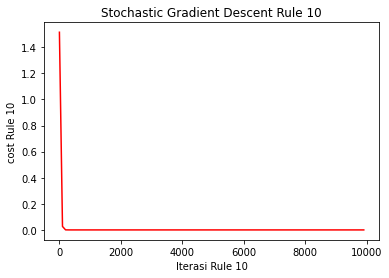

In [219]:
plt.xlabel("Iterasi Rule 10")
plt.ylabel("cost Rule 10")
plt.title("Stochastic Gradient Descent Rule 10")
plt.plot(s_iterasi_rule10_list,s_cost_rule10_list, color='red', label='Eror')
plt.show()

In [220]:
s_cost_rule10

1.0366125332669858e-29

In [221]:
s_b0_rule10

-0.7691380860579955

In [222]:
s_bpoly_rule10

array([0.75711429, 0.81783572, 0.99105653, 0.48724128])

In [223]:
data_rule_10

Age   TP    DB   AGR  Liver_Disease
41    42  5.8   4.5  0.50              2
42    42  5.8   4.5  0.50              2
197   42  5.4   8.9  0.50              2
205   40  5.7   6.4  0.50              2
248   54  7.2  12.6  0.90              2
295   54  7.8  11.4  0.80              2
317   41  6.3   4.3  0.90              2
360   45  7.7  12.8  0.80              2
416   53  8.1  10.4  0.40              2
421   46  7.5   8.5  0.70              2
422   46  5.4  10.0  1.20              2
432   35  9.2  12.1  0.30              2
443   45  5.4  11.7  0.70              2
444   50  7.1  10.8  0.40              2
450   46  7.0   4.2  0.60              2
462   43  6.6  11.8  0.46              2

In [224]:
X10=np.array(data_rule_10.iloc[::,:-1])
X10

array([[42.  ,  5.8 ,  4.5 ,  0.5 ],
       [42.  ,  5.8 ,  4.5 ,  0.5 ],
       [42.  ,  5.4 ,  8.9 ,  0.5 ],
       [40.  ,  5.7 ,  6.4 ,  0.5 ],
       [54.  ,  7.2 , 12.6 ,  0.9 ],
       [54.  ,  7.8 , 11.4 ,  0.8 ],
       [41.  ,  6.3 ,  4.3 ,  0.9 ],
       [45.  ,  7.7 , 12.8 ,  0.8 ],
       [53.  ,  8.1 , 10.4 ,  0.4 ],
       [46.  ,  7.5 ,  8.5 ,  0.7 ],
       [46.  ,  5.4 , 10.  ,  1.2 ],
       [35.  ,  9.2 , 12.1 ,  0.3 ],
       [45.  ,  5.4 , 11.7 ,  0.7 ],
       [50.  ,  7.1 , 10.8 ,  0.4 ],
       [46.  ,  7.  ,  4.2 ,  0.6 ],
       [43.  ,  6.6 , 11.8 ,  0.46]])

In [225]:
Y10=np.array(data_rule_10.iloc[:,3])
Y10

array([0.5 , 0.5 , 0.5 , 0.5 , 0.9 , 0.8 , 0.9 , 0.8 , 0.4 , 0.7 , 1.2 ,
       0.3 , 0.7 , 0.4 , 0.6 , 0.46])

In [226]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X10_poly = poly_reg.fit_transform(X10)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X10_poly, Y10) 
# Proses Training Model
poly_reg.fit(X10, Y10) 

# Memprediksi hasil dengan regresi polynomial
y10_pred=lin_reg_2.predict(poly_reg.fit_transform(X10))
y10_pred

data_rule_10['pred'] = y10_pred
data_rule_10

Age   TP    DB   AGR  Liver_Disease  pred
41    42  5.8   4.5  0.50              2  0.50
42    42  5.8   4.5  0.50              2  0.50
197   42  5.4   8.9  0.50              2  0.50
205   40  5.7   6.4  0.50              2  0.50
248   54  7.2  12.6  0.90              2  0.90
295   54  7.8  11.4  0.80              2  0.80
317   41  6.3   4.3  0.90              2  0.90
360   45  7.7  12.8  0.80              2  0.80
416   53  8.1  10.4  0.40              2  0.40
421   46  7.5   8.5  0.70              2  0.70
422   46  5.4  10.0  1.20              2  1.20
432   35  9.2  12.1  0.30              2  0.30
443   45  5.4  11.7  0.70              2  0.70
444   50  7.1  10.8  0.40              2  0.40
450   46  7.0   4.2  0.60              2  0.60
462   43  6.6  11.8  0.46              2  0.46

##Rule 11

In [227]:
#Rule 11
rule_11 = df_fuzz[df_fuzz['Rule']==" Jika X1 Paruh baya dan X2 Normal dan X3 Normal dan X4 Rendah maka Y Liver"]
index=rule_11.index
data_rule_11=df_fuzz.iloc[index,:5]
data_rule_11

Age   TP   DB   AGR  Liver_Disease
20    38  5.6  1.2  0.80              1
21    38  5.6  1.2  0.80              1
29    42  6.1  3.2  0.60              1
32    35  6.5  0.6  0.90              1
142   49  6.0  0.4  1.06              1
143   49  5.7  0.6  1.10              1
224   43  8.0  0.6  1.00              1
242   54  7.9  0.7  0.90              1
311   38  7.5  1.4  1.20              1
339   45  5.6  0.6  0.80              1
386   42  6.8  0.3  1.30              1
387   35  6.0  1.1  0.80              1
388   38  7.9  1.0  1.00              1
463   50  7.8  0.3  1.00              1

In [228]:
rule_11.to_csv('hasilrule11.csv') 

###Stochastic Gradient Descent

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [230]:
df_rule11=pd.read_csv('hasilrule11.csv',sep=',')
df_rule11

Unnamed: 0  Age   TP   DB   AGR  Liver_Disease    Age_fuzz TP_fuzz  \
0           20   38  5.6  1.2  0.80              1  Paruh baya  Normal   
1           21   38  5.6  1.2  0.80              1  Paruh baya  Normal   
2           29   42  6.1  3.2  0.60              1  Paruh baya  Normal   
3           32   35  6.5  0.6  0.90              1  Paruh baya  Normal   
4          142   49  6.0  0.4  1.06              1  Paruh baya  Normal   
5          143   49  5.7  0.6  1.10              1  Paruh baya  Normal   
6          224   43  8.0  0.6  1.00              1  Paruh baya  Normal   
7          242   54  7.9  0.7  0.90              1  Paruh baya  Normal   
8          311   38  7.5  1.4  1.20              1  Paruh baya  Normal   
9          339   45  5.6  0.6  0.80              1  Paruh baya  Normal   
10         386   42  6.8  0.3  1.30              1  Paruh baya  Normal   
11         387   35  6.0  1.1  0.80              1  Paruh baya  Normal   
12         388   38  7.9  1.0  1.00              1  Paruh baya  Normal   
13         463   50  7.8  0.3  1.00              1  Paruh baya  Normal   

   DB_fuzz AGR_fuzz Liver_Disease_fuzz  miu_Age        miu_TP  miu_DB  \
0   Normal   Rendah              Liver      0.3  0.000000e+00     0.5   
1   Normal   Rendah              Liver      0.3  0.000000e+00     0.5   
2   Normal   Rendah              Liver      0.7  2.960595e-15     0.0   
3   Normal   Rendah              Liver      0.0  2.960595e-15     0.0   
4   Normal   Rendah              Liver      0.6  2.960595e-15     0.0   
5   Normal   Rendah              Liver      0.6  0.000000e+00     0.0   
6   Normal   Rendah              Liver      0.8  2.727273e-01     0.0   
7   Normal   Rendah              Liver      0.1  8.333333e-01     0.0   
8   Normal   Rendah              Liver      0.3  8.333333e-01     0.5   
9   Normal   Rendah              Liver      1.0  0.000000e+00     0.0   
10  Normal   Rendah              Liver      0.7  2.960595e-15     0.0   
11  Normal   Rendah              Liver      0.0  2.960595e-15     0.5   
12  Normal   Rendah              Liver      0.3  8.333333e-01     0.5   
13  Normal   Rendah              Liver      0.5  8.333333e-01     0.0   

     miu_AGR  miu_Liver_Disease  \
0   0.000000                1.0   
1   0.000000                1.0   
2   0.000000                1.0   
3   0.000000                1.0   
4   0.833333                1.0   
5   0.833333                1.0   
6   0.833333                1.0   
7   0.000000                1.0   
8   0.833333                1.0   
9   0.000000                1.0   
10  0.833333                1.0   
11  0.000000                1.0   
12  0.833333                1.0   
13  0.833333                1.0   

                                                 Rule  
0    Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
1    Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
2    Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
3    Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
4    Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
5    Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
6    Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
7    Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
8    Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
9    Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
10   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
11   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
12   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
13   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...

In [231]:
df_rule11=df_rule11.drop(columns=['Unnamed: 0'])
df_rule11

Age   TP   DB   AGR  Liver_Disease    Age_fuzz TP_fuzz DB_fuzz AGR_fuzz  \
0    38  5.6  1.2  0.80              1  Paruh baya  Normal  Normal   Rendah   
1    38  5.6  1.2  0.80              1  Paruh baya  Normal  Normal   Rendah   
2    42  6.1  3.2  0.60              1  Paruh baya  Normal  Normal   Rendah   
3    35  6.5  0.6  0.90              1  Paruh baya  Normal  Normal   Rendah   
4    49  6.0  0.4  1.06              1  Paruh baya  Normal  Normal   Rendah   
5    49  5.7  0.6  1.10              1  Paruh baya  Normal  Normal   Rendah   
6    43  8.0  0.6  1.00              1  Paruh baya  Normal  Normal   Rendah   
7    54  7.9  0.7  0.90              1  Paruh baya  Normal  Normal   Rendah   
8    38  7.5  1.4  1.20              1  Paruh baya  Normal  Normal   Rendah   
9    45  5.6  0.6  0.80              1  Paruh baya  Normal  Normal   Rendah   
10   42  6.8  0.3  1.30              1  Paruh baya  Normal  Normal   Rendah   
11   35  6.0  1.1  0.80              1  Paruh baya  Normal  Normal   Rendah   
12   38  7.9  1.0  1.00              1  Paruh baya  Normal  Normal   Rendah   
13   50  7.8  0.3  1.00              1  Paruh baya  Normal  Normal   Rendah   

   Liver_Disease_fuzz  miu_Age        miu_TP  miu_DB   miu_AGR  \
0               Liver      0.3  0.000000e+00     0.5  0.000000   
1               Liver      0.3  0.000000e+00     0.5  0.000000   
2               Liver      0.7  2.960595e-15     0.0  0.000000   
3               Liver      0.0  2.960595e-15     0.0  0.000000   
4               Liver      0.6  2.960595e-15     0.0  0.833333   
5               Liver      0.6  0.000000e+00     0.0  0.833333   
6               Liver      0.8  2.727273e-01     0.0  0.833333   
7               Liver      0.1  8.333333e-01     0.0  0.000000   
8               Liver      0.3  8.333333e-01     0.5  0.833333   
9               Liver      1.0  0.000000e+00     0.0  0.000000   
10              Liver      0.7  2.960595e-15     0.0  0.833333   
11              Liver      0.0  2.960595e-15     0.5  0.000000   
12              Liver      0.3  8.333333e-01     0.5  0.833333   
13              Liver      0.5  8.333333e-01     0.0  0.833333   

    miu_Liver_Disease                                               Rule  
0                 1.0   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
1                 1.0   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
2                 1.0   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
3                 1.0   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
4                 1.0   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
5                 1.0   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
6                 1.0   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
7                 1.0   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
8                 1.0   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
9                 1.0   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
10                1.0   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
11                1.0   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
12                1.0   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...  
13                1.0   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...

In [232]:
from sklearn import preprocessing
sx11 = preprocessing.MinMaxScaler()
sy11 = preprocessing.MinMaxScaler()

scaled_X11 = sx11.fit_transform(data_rule_11.drop('Liver_Disease',axis='columns'))
scaled_y11 = sy11.fit_transform(data_rule_11['Liver_Disease'].values.reshape(rule_11.shape[0],1))

scaled_X11

array([[0.15789474, 0.        , 0.31034483, 0.28571429],
       [0.15789474, 0.        , 0.31034483, 0.28571429],
       [0.36842105, 0.20833333, 1.        , 0.        ],
       [0.        , 0.375     , 0.10344828, 0.42857143],
       [0.73684211, 0.16666667, 0.03448276, 0.65714286],
       [0.73684211, 0.04166667, 0.10344828, 0.71428571],
       [0.42105263, 1.        , 0.10344828, 0.57142857],
       [1.        , 0.95833333, 0.13793103, 0.42857143],
       [0.15789474, 0.79166667, 0.37931034, 0.85714286],
       [0.52631579, 0.        , 0.10344828, 0.28571429],
       [0.36842105, 0.5       , 0.        , 1.        ],
       [0.        , 0.16666667, 0.27586207, 0.28571429],
       [0.15789474, 0.95833333, 0.24137931, 0.57142857],
       [0.78947368, 0.91666667, 0.        , 0.57142857]])

In [233]:
scaled_y11_reshape=scaled_y11.reshape(scaled_y11.shape[0],)
scaled_y11_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [234]:
def stochastic_gradient_descent_rule11(X11, y11, iterasi, learning_rate = 0.1):

    jumlah_variabel_rule11 = X11.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule11 = np.ones(shape=(jumlah_variabel_rule11))       # b1, b2, ... b(jumlah variabel)
    b0_rule11 = 0                                         # b0 atau bias
    n = X11.shape[0]                                 # jumlah baris data X
    
    cost_rule11_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule11_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule11_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_index = np.random.RandomState(seed=42).randint(0, n-1)      # Memilih indeks data random untuk update parameter
        sample_x11 = X11[random_index]
        sample_y11 = y11[random_index]
        
        y11_pred = np.dot(bpoly_rule11, sample_x11.T) + b0_rule11                  # Menghitung y_pred pada setiap iterasi
        
        bpoly_rule11_grad = -(2/n)*(sample_x11.T.dot(sample_y11-y11_pred))    # Menghitung perubahan/gradien bpoly setiap iterasi
        b0_rule11_grad = -(2/n)*np.sum(sample_y11-y11_pred)                 # Menghitung perubahan/gradien b0 setiap iterasi
        bpoly_rule11 = bpoly_rule11 - learning_rate * bpoly_rule11_grad               # Memperbaharui bpoly setiap iterasi
        b0_rule11 = b0_rule11 - learning_rate * b0_rule11_grad                        # Memperbaharui bpoly setiap iterasi
        
        # Menyimpan parameter b dalam list tunggal
        bp=[]
        for jv_rule11 in range(jumlah_variabel_rule11):
            bp_rule11=bpoly_rule11[jv_rule11]
            bp.append(bp_rule11)
        b_rule11=[b0_rule11]+bp
        
        cost_rule11 = np.mean(np.square(sample_y11-y11_pred))        # MSE (Mean Squared Error)
        
        if i%100==0:                                      # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule11_list.append(cost_rule11)                        # Menyimpan nilai cost setiap iterasi
            iterasi_rule11_list.append(i)                        # Menyimpan nilai iterasi setiap iterasi
            b_rule11_list.append(b_rule11)                              # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule11, b0_rule11, cost_rule11, b_rule11_list, cost_rule11_list, iterasi_rule11_list  # Output

In [235]:
import time
mulai_rule11 = time.time()
s_bpoly_rule11, s_b0_rule11, s_cost_rule11, s_b_rule11_list, s_cost_rule11_list, s_iterasi_rule11_list=stochastic_gradient_descent_rule11 (scaled_X11, 
                                                                                                                                    scaled_y11_reshape,
                                                                                                                                    iterasi=10000,
                                                                                                                                     learning_rate = 0.1)
selesai_rule11 = time.time()
waktu_komputasi_rule11 = (selesai_rule11 - mulai_rule11)
print("Waktu Komputasi Rule 11: ",waktu_komputasi_rule11)

Waktu Komputasi Rule 11:  3.4512834548950195


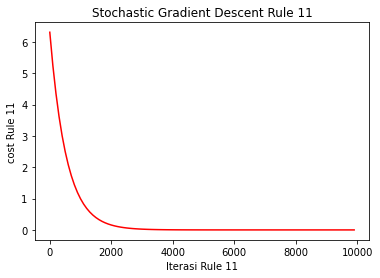

In [236]:
plt.xlabel("Iterasi Rule 11")
plt.ylabel("cost Rule 11")
plt.title("Stochastic Gradient Descent Rule 11")
plt.plot(s_iterasi_rule11_list,s_cost_rule1_list, color='red', label='Eror')
plt.show()

In [237]:
s_cost_rule11

7.888609052210118e-31

In [238]:
s_b0_rule11

-0.8335314820390589

In [239]:
s_bpoly_rule11

array([0.64903938, 0.16646852, 0.91377261, 0.5236963 ])

In [240]:
data_rule_11

Age   TP   DB   AGR  Liver_Disease
20    38  5.6  1.2  0.80              1
21    38  5.6  1.2  0.80              1
29    42  6.1  3.2  0.60              1
32    35  6.5  0.6  0.90              1
142   49  6.0  0.4  1.06              1
143   49  5.7  0.6  1.10              1
224   43  8.0  0.6  1.00              1
242   54  7.9  0.7  0.90              1
311   38  7.5  1.4  1.20              1
339   45  5.6  0.6  0.80              1
386   42  6.8  0.3  1.30              1
387   35  6.0  1.1  0.80              1
388   38  7.9  1.0  1.00              1
463   50  7.8  0.3  1.00              1

In [241]:
X11=np.array(data_rule_11.iloc[::,:-1])
X11

array([[38.  ,  5.6 ,  1.2 ,  0.8 ],
       [38.  ,  5.6 ,  1.2 ,  0.8 ],
       [42.  ,  6.1 ,  3.2 ,  0.6 ],
       [35.  ,  6.5 ,  0.6 ,  0.9 ],
       [49.  ,  6.  ,  0.4 ,  1.06],
       [49.  ,  5.7 ,  0.6 ,  1.1 ],
       [43.  ,  8.  ,  0.6 ,  1.  ],
       [54.  ,  7.9 ,  0.7 ,  0.9 ],
       [38.  ,  7.5 ,  1.4 ,  1.2 ],
       [45.  ,  5.6 ,  0.6 ,  0.8 ],
       [42.  ,  6.8 ,  0.3 ,  1.3 ],
       [35.  ,  6.  ,  1.1 ,  0.8 ],
       [38.  ,  7.9 ,  1.  ,  1.  ],
       [50.  ,  7.8 ,  0.3 ,  1.  ]])

In [242]:
Y11=np.array(data_rule_11.iloc[:,3])
Y11

array([0.8 , 0.8 , 0.6 , 0.9 , 1.06, 1.1 , 1.  , 0.9 , 1.2 , 0.8 , 1.3 ,
       0.8 , 1.  , 1.  ])

In [243]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X11_poly = poly_reg.fit_transform(X11)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X11_poly, Y11) 
# Proses Training Model
poly_reg.fit(X11, Y11) 

# Memprediksi hasil dengan regresi polynomial
y11_pred=lin_reg_2.predict(poly_reg.fit_transform(X11))
y11_pred

data_rule_11['pred'] = y11_pred
data_rule_11

Age   TP   DB   AGR  Liver_Disease  pred
20    38  5.6  1.2  0.80              1  0.80
21    38  5.6  1.2  0.80              1  0.80
29    42  6.1  3.2  0.60              1  0.60
32    35  6.5  0.6  0.90              1  0.90
142   49  6.0  0.4  1.06              1  1.06
143   49  5.7  0.6  1.10              1  1.10
224   43  8.0  0.6  1.00              1  1.00
242   54  7.9  0.7  0.90              1  0.90
311   38  7.5  1.4  1.20              1  1.20
339   45  5.6  0.6  0.80              1  0.80
386   42  6.8  0.3  1.30              1  1.30
387   35  6.0  1.1  0.80              1  0.80
388   38  7.9  1.0  1.00              1  1.00
463   50  7.8  0.3  1.00              1  1.00

##Rule 12

In [244]:
#Rule 12
rule_12 = df_fuzz[df_fuzz['Rule']==" Jika X1 Tua dan X2 Normal dan X3 Meningkat dan X4 Rendah maka Y Nonliver"]
index=rule_12.index
data_rule_12=df_fuzz.iloc[index,:5]
data_rule_12

Age   TP    DB   AGR  Liver_Disease
1     62  7.5   5.5  0.74              2
36    55  6.2   8.8  0.40              2
120   60  5.5   4.9  0.60              2
121   60  6.2   5.0  0.80              2
128   60  6.9  12.6  0.90              2
137   75  5.3   9.0  0.70              2
139   75  5.5   4.6  0.48              2
333   55  6.4   5.1  0.50              2
363   65  6.0   4.3  1.00              2
419   56  5.6   8.8  0.70              2
457   66  6.5   7.7  0.40              2
458   66  6.9   7.6  0.40              2
459   66  7.8   8.5  0.50              2

In [245]:
data_rule_12.to_csv('hasilrule12.csv') 

###Stochastic Gradient Descent

In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [247]:
df_rule12=pd.read_csv('hasilrule12.csv',sep=',')
df_rule12

Unnamed: 0  Age   TP    DB   AGR  Liver_Disease
0            1   62  7.5   5.5  0.74              2
1           36   55  6.2   8.8  0.40              2
2          120   60  5.5   4.9  0.60              2
3          121   60  6.2   5.0  0.80              2
4          128   60  6.9  12.6  0.90              2
5          137   75  5.3   9.0  0.70              2
6          139   75  5.5   4.6  0.48              2
7          333   55  6.4   5.1  0.50              2
8          363   65  6.0   4.3  1.00              2
9          419   56  5.6   8.8  0.70              2
10         457   66  6.5   7.7  0.40              2
11         458   66  6.9   7.6  0.40              2
12         459   66  7.8   8.5  0.50              2

In [248]:
df_rule12=df_rule12.drop(columns=['Unnamed: 0'])
df_rule12

Age   TP    DB   AGR  Liver_Disease
0    62  7.5   5.5  0.74              2
1    55  6.2   8.8  0.40              2
2    60  5.5   4.9  0.60              2
3    60  6.2   5.0  0.80              2
4    60  6.9  12.6  0.90              2
5    75  5.3   9.0  0.70              2
6    75  5.5   4.6  0.48              2
7    55  6.4   5.1  0.50              2
8    65  6.0   4.3  1.00              2
9    56  5.6   8.8  0.70              2
10   66  6.5   7.7  0.40              2
11   66  6.9   7.6  0.40              2
12   66  7.8   8.5  0.50              2

In [249]:
from sklearn import preprocessing
sx12 = preprocessing.MinMaxScaler()
sy12 = preprocessing.MinMaxScaler()

scaled_X12 = sx12.fit_transform(data_rule_12.drop('Liver_Disease',axis='columns'))
scaled_y12 = sy12.fit_transform(data_rule_12['Liver_Disease'].values.reshape(rule_12.shape[0],1))

scaled_X12

array([[0.35      , 0.88      , 0.14457831, 0.56666667],
       [0.        , 0.36      , 0.54216867, 0.        ],
       [0.25      , 0.08      , 0.07228916, 0.33333333],
       [0.25      , 0.36      , 0.08433735, 0.66666667],
       [0.25      , 0.64      , 1.        , 0.83333333],
       [1.        , 0.        , 0.56626506, 0.5       ],
       [1.        , 0.08      , 0.03614458, 0.13333333],
       [0.        , 0.44      , 0.09638554, 0.16666667],
       [0.5       , 0.28      , 0.        , 1.        ],
       [0.05      , 0.12      , 0.54216867, 0.5       ],
       [0.55      , 0.48      , 0.40963855, 0.        ],
       [0.55      , 0.64      , 0.39759036, 0.        ],
       [0.55      , 1.        , 0.5060241 , 0.16666667]])

In [250]:
scaled_y12_reshape=scaled_y12.reshape(scaled_y12.shape[0],)
scaled_y12_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [251]:
def stochastic_gradient_descent_rule12(X12, y12, iterasi, learning_rate = 0.1):

    jumlah_variabel_rule12 = X12.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule12 = np.ones(shape=(jumlah_variabel_rule12))       # b1, b2, ... b(jumlah variabel)
    b0_rule12 = 0                                         # b0 atau bias
    n = X12.shape[0]                                 # jumlah baris data X
    
    cost_rule12_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule12_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule12_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_index = np.random.RandomState(seed=42).randint(0, n-1)      # Memilih indeks data random untuk update parameter
        sample_x12 = X12[random_index]
        sample_y12 = y12[random_index]
        
        y12_pred = np.dot(bpoly_rule12, sample_x12.T) + b0_rule12                  # Menghitung y_pred pada setiap iterasi
        
        bpoly_rule12_grad = -(2/n)*(sample_x12.T.dot(sample_y12-y12_pred))    # Menghitung perubahan/gradien bpoly setiap iterasi
        b0_rule12_grad = -(2/n)*np.sum(sample_y12-y12_pred)                 # Menghitung perubahan/gradien b0 setiap iterasi
        bpoly_rule12 = bpoly_rule12 - learning_rate * bpoly_rule12_grad               # Memperbaharui bpoly setiap iterasi
        b0_rule12 = b0_rule12 - learning_rate * b0_rule12_grad                        # Memperbaharui bpoly setiap iterasi
        
        # Menyimpan parameter b dalam list tunggal
        bp=[]
        for jv_rule12 in range(jumlah_variabel_rule12):
            bp_rule12=bpoly_rule12[jv_rule12]
            bp.append(bp_rule12)
        b_rule12=[b0_rule12]+bp
        
        cost_rule12 = np.mean(np.square(sample_y12-y12_pred))        # MSE (Mean Squared Error)
        
        if i%100==0:                                      # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule12_list.append(cost_rule12)                        # Menyimpan nilai cost setiap iterasi
            iterasi_rule12_list.append(i)                        # Menyimpan nilai iterasi setiap iterasi
            b_rule12_list.append(b_rule12)                              # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule12, b0_rule12, cost_rule12, b_rule12_list, cost_rule12_list, iterasi_rule12_list  # Output

In [252]:
import time
mulai_rule12 = time.time()
s_bpoly_rule12, s_b0_rule12, s_cost_rule12, s_b_rule12_list, s_cost_rule12_list, s_iterasi_rule12_list=stochastic_gradient_descent_rule12 (scaled_X12, 
                                                                                                                                    scaled_y12_reshape,
                                                                                                                                    iterasi=10000,
                                                                                                                                     learning_rate = 0.1)
selesai_rule12 = time.time()
waktu_komputasi_rule12 = (selesai_rule12 - mulai_rule12)
print("Waktu Komputasi Rule 12: ",waktu_komputasi_rule12)

Waktu Komputasi Rule 12:  3.334735631942749


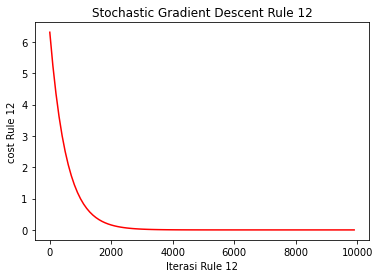

In [253]:
plt.xlabel("Iterasi Rule 12")
plt.ylabel("cost Rule 12")
plt.title("Stochastic Gradient Descent Rule 12")
plt.plot(s_iterasi_rule12_list,s_cost_rule1_list, color='red', label='Eror')
plt.show()

In [254]:
s_cost_rule12

3.1554436208840472e-30

In [255]:
s_b0_rule12

-0.6168786241406552

In [256]:
s_bpoly_rule12

array([0.38312138, 0.95064971, 0.97770318, 0.91774952])

In [257]:
data_rule_12

Age   TP    DB   AGR  Liver_Disease
1     62  7.5   5.5  0.74              2
36    55  6.2   8.8  0.40              2
120   60  5.5   4.9  0.60              2
121   60  6.2   5.0  0.80              2
128   60  6.9  12.6  0.90              2
137   75  5.3   9.0  0.70              2
139   75  5.5   4.6  0.48              2
333   55  6.4   5.1  0.50              2
363   65  6.0   4.3  1.00              2
419   56  5.6   8.8  0.70              2
457   66  6.5   7.7  0.40              2
458   66  6.9   7.6  0.40              2
459   66  7.8   8.5  0.50              2

In [258]:
X12=np.array(data_rule_12.iloc[::,:-1])
X12

array([[62.  ,  7.5 ,  5.5 ,  0.74],
       [55.  ,  6.2 ,  8.8 ,  0.4 ],
       [60.  ,  5.5 ,  4.9 ,  0.6 ],
       [60.  ,  6.2 ,  5.  ,  0.8 ],
       [60.  ,  6.9 , 12.6 ,  0.9 ],
       [75.  ,  5.3 ,  9.  ,  0.7 ],
       [75.  ,  5.5 ,  4.6 ,  0.48],
       [55.  ,  6.4 ,  5.1 ,  0.5 ],
       [65.  ,  6.  ,  4.3 ,  1.  ],
       [56.  ,  5.6 ,  8.8 ,  0.7 ],
       [66.  ,  6.5 ,  7.7 ,  0.4 ],
       [66.  ,  6.9 ,  7.6 ,  0.4 ],
       [66.  ,  7.8 ,  8.5 ,  0.5 ]])

In [259]:
Y12=np.array(data_rule_12.iloc[:,3])
Y12

array([0.74, 0.4 , 0.6 , 0.8 , 0.9 , 0.7 , 0.48, 0.5 , 1.  , 0.7 , 0.4 ,
       0.4 , 0.5 ])

In [260]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X12_poly = poly_reg.fit_transform(X12)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X12_poly, Y12) 
# Proses Training Model
poly_reg.fit(X12, Y12) 

# Memprediksi hasil dengan regresi polynomial
y12_pred=lin_reg_2.predict(poly_reg.fit_transform(X12))
y12_pred

data_rule_12['pred'] = y12_pred
data_rule_12

Age   TP    DB   AGR  Liver_Disease  pred
1     62  7.5   5.5  0.74              2  0.74
36    55  6.2   8.8  0.40              2  0.40
120   60  5.5   4.9  0.60              2  0.60
121   60  6.2   5.0  0.80              2  0.80
128   60  6.9  12.6  0.90              2  0.90
137   75  5.3   9.0  0.70              2  0.70
139   75  5.5   4.6  0.48              2  0.48
333   55  6.4   5.1  0.50              2  0.50
363   65  6.0   4.3  1.00              2  1.00
419   56  5.6   8.8  0.70              2  0.70
457   66  6.5   7.7  0.40              2  0.40
458   66  6.9   7.6  0.40              2  0.40
459   66  7.8   8.5  0.50              2  0.50

##Rule 13

In [261]:
#Rule 13
rule_13 = df_fuzz[df_fuzz['Rule']==" Jika X1 Muda dan X2 Normal dan X3 Normal dan X4 Rendah maka Y Liver"]
index=rule_13.index
data_rule_13=df_fuzz.iloc[index,:5]
data_rule_13

Age   TP   DB  AGR  Liver_Disease
152   21  6.4  0.3  1.2              1
160   22  5.5  1.0  1.2              1
212   26  8.2  0.8  1.0              1
220   18  6.0  0.7  0.5              1
230   23  7.7  0.5  1.2              1
251   22  6.7  0.3  1.2              1
280   19  8.0  0.8  1.3              1
324   23  6.9  0.8  0.7              1
334   26  7.1  0.3  1.0              1
380   28  6.8  0.3  0.8              1
448   29  6.2  0.4  0.9              1

In [262]:
data_rule_13.to_csv('hasilrule13.csv') 

###Stochastic Gradient Descent

In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [264]:
df_rule13=pd.read_csv('hasilrule13.csv',sep=',')
df_rule13

Unnamed: 0  Age   TP   DB  AGR  Liver_Disease
0          152   21  6.4  0.3  1.2              1
1          160   22  5.5  1.0  1.2              1
2          212   26  8.2  0.8  1.0              1
3          220   18  6.0  0.7  0.5              1
4          230   23  7.7  0.5  1.2              1
5          251   22  6.7  0.3  1.2              1
6          280   19  8.0  0.8  1.3              1
7          324   23  6.9  0.8  0.7              1
8          334   26  7.1  0.3  1.0              1
9          380   28  6.8  0.3  0.8              1
10         448   29  6.2  0.4  0.9              1

In [265]:
df_rule13=df_rule13.drop(columns=['Unnamed: 0'])
df_rule13

Age   TP   DB  AGR  Liver_Disease
0    21  6.4  0.3  1.2              1
1    22  5.5  1.0  1.2              1
2    26  8.2  0.8  1.0              1
3    18  6.0  0.7  0.5              1
4    23  7.7  0.5  1.2              1
5    22  6.7  0.3  1.2              1
6    19  8.0  0.8  1.3              1
7    23  6.9  0.8  0.7              1
8    26  7.1  0.3  1.0              1
9    28  6.8  0.3  0.8              1
10   29  6.2  0.4  0.9              1

In [266]:
from sklearn import preprocessing
sx13 = preprocessing.MinMaxScaler()
sy13 = preprocessing.MinMaxScaler()

scaled_X13 = sx13.fit_transform(data_rule_13.drop('Liver_Disease',axis='columns'))
scaled_y13 = sy13.fit_transform(data_rule_13['Liver_Disease'].values.reshape(rule_13.shape[0],1))

scaled_X13

array([[0.27272727, 0.33333333, 0.        , 0.875     ],
       [0.36363636, 0.        , 1.        , 0.875     ],
       [0.72727273, 1.        , 0.71428571, 0.625     ],
       [0.        , 0.18518519, 0.57142857, 0.        ],
       [0.45454545, 0.81481481, 0.28571429, 0.875     ],
       [0.36363636, 0.44444444, 0.        , 0.875     ],
       [0.09090909, 0.92592593, 0.71428571, 1.        ],
       [0.45454545, 0.51851852, 0.71428571, 0.25      ],
       [0.72727273, 0.59259259, 0.        , 0.625     ],
       [0.90909091, 0.48148148, 0.        , 0.375     ],
       [1.        , 0.25925926, 0.14285714, 0.5       ]])

In [267]:
scaled_y13_reshape=scaled_y13.reshape(scaled_y13.shape[0],)
scaled_y13_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [268]:
def stochastic_gradient_descent_rule13(X13, y13, iterasi, learning_rate = 0.1):

    jumlah_variabel_rule13 = X13.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule13 = np.ones(shape=(jumlah_variabel_rule13))       # b1, b2, ... b(jumlah variabel)
    b0_rule13 = 0                                         # b0 atau bias
    n = X13.shape[0]                                 # jumlah baris data X
    
    cost_rule13_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule13_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule13_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_index = np.random.RandomState(seed=42).randint(0, n-1)      # Memilih indeks data random untuk update parameter
        sample_x13 = X13[random_index]
        sample_y13 = y13[random_index]
        
        y13_pred = np.dot(bpoly_rule13, sample_x13.T) + b0_rule13                  # Menghitung y_pred pada setiap iterasi
        
        bpoly_rule13_grad = -(2/n)*(sample_x13.T.dot(sample_y13-y13_pred))    # Menghitung perubahan/gradien bpoly setiap iterasi
        b0_rule13_grad = -(2/n)*np.sum(sample_y13-y13_pred)                 # Menghitung perubahan/gradien b0 setiap iterasi
        bpoly_rule13 = bpoly_rule13 - learning_rate * bpoly_rule13_grad               # Memperbaharui bpoly setiap iterasi
        b0_rule13 = b0_rule13 - learning_rate * b0_rule13_grad                        # Memperbaharui bpoly setiap iterasi
        
        # Menyimpan parameter b dalam list tunggal
        bp=[]
        for jv_rule13 in range(jumlah_variabel_rule13):
            bp_rule13=bpoly_rule13[jv_rule13]
            bp.append(bp_rule13)
        b_rule13=[b0_rule13]+bp
        
        cost_rule13 = np.mean(np.square(sample_y13-y13_pred))        # MSE (Mean Squared Error)
        
        if i%100==0:                                      # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule13_list.append(cost_rule13)                        # Menyimpan nilai cost setiap iterasi
            iterasi_rule13_list.append(i)                        # Menyimpan nilai iterasi setiap iterasi
            b_rule13_list.append(b_rule13)                              # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule13, b0_rule13, cost_rule13, b_rule13_list, cost_rule13_list, iterasi_rule13_list  # Output

In [269]:
import time
mulai_rule13 = time.time()
s_bpoly_rule13, s_b0_rule13, s_cost_rule13, s_b_rule13_list, s_cost_rule13_list, s_iterasi_rule13_list=stochastic_gradient_descent_rule13 (scaled_X13, 
                                                                                                                                    scaled_y13_reshape,
                                                                                                                                    iterasi=10000,
                                                                                                                                    learning_rate = 0.1)
selesai_rule13 = time.time()
waktu_komputasi_rule13 = (selesai_rule13 - mulai_rule13)
print("Waktu Komputasi Rule 13: ",waktu_komputasi_rule13)

Waktu Komputasi Rule 13:  4.212445974349976


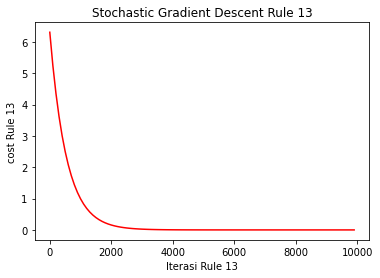

In [270]:
plt.xlabel("Iterasi Rule 13")
plt.ylabel("cost Rule 13")
plt.title("Stochastic Gradient Descent Rule 13")
plt.plot(s_iterasi_rule13_list,s_cost_rule1_list, color='red', label='Eror')
plt.show()

In [271]:
s_cost_rule13

4.437342591868191e-31

In [272]:
s_b0_rule13

-0.8090274224896579

In [273]:
s_bpoly_rule13

array([0.92645205, 0.25090053, 0.42212327, 0.19097258])

In [274]:
data_rule_13

Age   TP   DB  AGR  Liver_Disease
152   21  6.4  0.3  1.2              1
160   22  5.5  1.0  1.2              1
212   26  8.2  0.8  1.0              1
220   18  6.0  0.7  0.5              1
230   23  7.7  0.5  1.2              1
251   22  6.7  0.3  1.2              1
280   19  8.0  0.8  1.3              1
324   23  6.9  0.8  0.7              1
334   26  7.1  0.3  1.0              1
380   28  6.8  0.3  0.8              1
448   29  6.2  0.4  0.9              1

In [275]:
X13=np.array(data_rule_13.iloc[::,:-1])
X13

array([[21. ,  6.4,  0.3,  1.2],
       [22. ,  5.5,  1. ,  1.2],
       [26. ,  8.2,  0.8,  1. ],
       [18. ,  6. ,  0.7,  0.5],
       [23. ,  7.7,  0.5,  1.2],
       [22. ,  6.7,  0.3,  1.2],
       [19. ,  8. ,  0.8,  1.3],
       [23. ,  6.9,  0.8,  0.7],
       [26. ,  7.1,  0.3,  1. ],
       [28. ,  6.8,  0.3,  0.8],
       [29. ,  6.2,  0.4,  0.9]])

In [276]:
Y13=np.array(data_rule_13.iloc[:,3])
Y13

array([1.2, 1.2, 1. , 0.5, 1.2, 1.2, 1.3, 0.7, 1. , 0.8, 0.9])

In [277]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X13_poly = poly_reg.fit_transform(X13)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X13_poly, Y13) 
# Proses Training Model
poly_reg.fit(X13, Y13) 

# Memprediksi hasil dengan regresi polynomial
y13_pred=lin_reg_2.predict(poly_reg.fit_transform(X13))
y13_pred

data_rule_13['pred'] = y13_pred
data_rule_13

Age   TP   DB  AGR  Liver_Disease  pred
152   21  6.4  0.3  1.2              1   1.2
160   22  5.5  1.0  1.2              1   1.2
212   26  8.2  0.8  1.0              1   1.0
220   18  6.0  0.7  0.5              1   0.5
230   23  7.7  0.5  1.2              1   1.2
251   22  6.7  0.3  1.2              1   1.2
280   19  8.0  0.8  1.3              1   1.3
324   23  6.9  0.8  0.7              1   0.7
334   26  7.1  0.3  1.0              1   1.0
380   28  6.8  0.3  0.8              1   0.8
448   29  6.2  0.4  0.9              1   0.9

##Rule 14

In [278]:
#Rule 14
rule_14 = df_fuzz[df_fuzz['Rule']==" Jika X1 Muda dan X2 Normal dan X3 Meningkat dan X4 Rendah maka Y Nonliver"]
index=rule_14.index
data_rule_14=df_fuzz.iloc[index,:5]
data_rule_14

Age   TP    DB   AGR  Liver_Disease
148   17  6.1  11.8  0.40              2
198   33  7.5   7.0  1.00              2
209   21  8.2   9.5  1.00              2
417   32  5.5  17.1  0.90              2
418   32  5.8  14.1  1.10              2
456   26  7.5  19.7  0.50              2
465   20  6.9   8.4  1.02              2
471   32  6.6   6.0  0.50              2
473   32  5.3   8.2  0.70              2
474   32  5.4   8.4  0.90              2

In [279]:
data_rule_14.to_csv('hasilrule14.csv') 

###Stochastic Gradient Descent

In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [281]:
df_rule14=pd.read_csv('hasilrule14.csv',sep=',')
df_rule14

Unnamed: 0  Age   TP    DB   AGR  Liver_Disease
0         148   17  6.1  11.8  0.40              2
1         198   33  7.5   7.0  1.00              2
2         209   21  8.2   9.5  1.00              2
3         417   32  5.5  17.1  0.90              2
4         418   32  5.8  14.1  1.10              2
5         456   26  7.5  19.7  0.50              2
6         465   20  6.9   8.4  1.02              2
7         471   32  6.6   6.0  0.50              2
8         473   32  5.3   8.2  0.70              2
9         474   32  5.4   8.4  0.90              2

In [282]:
df_rule14=df_rule14.drop(columns=['Unnamed: 0'])
df_rule14

Age   TP    DB   AGR  Liver_Disease
0   17  6.1  11.8  0.40              2
1   33  7.5   7.0  1.00              2
2   21  8.2   9.5  1.00              2
3   32  5.5  17.1  0.90              2
4   32  5.8  14.1  1.10              2
5   26  7.5  19.7  0.50              2
6   20  6.9   8.4  1.02              2
7   32  6.6   6.0  0.50              2
8   32  5.3   8.2  0.70              2
9   32  5.4   8.4  0.90              2

In [283]:
from sklearn import preprocessing
sx14 = preprocessing.MinMaxScaler()
sy14 = preprocessing.MinMaxScaler()

scaled_X14 = sx14.fit_transform(data_rule_14.drop('Liver_Disease',axis='columns'))
scaled_y14 = sy14.fit_transform(data_rule_14['Liver_Disease'].values.reshape(rule_14.shape[0],1))

scaled_X14

array([[0.        , 0.27586207, 0.42335766, 0.        ],
       [1.        , 0.75862069, 0.0729927 , 0.85714286],
       [0.25      , 1.        , 0.25547445, 0.85714286],
       [0.9375    , 0.06896552, 0.81021898, 0.71428571],
       [0.9375    , 0.17241379, 0.59124088, 1.        ],
       [0.5625    , 0.75862069, 1.        , 0.14285714],
       [0.1875    , 0.55172414, 0.17518248, 0.88571429],
       [0.9375    , 0.44827586, 0.        , 0.14285714],
       [0.9375    , 0.        , 0.16058394, 0.42857143],
       [0.9375    , 0.03448276, 0.17518248, 0.71428571]])

In [284]:
scaled_y14_reshape=scaled_y14.reshape(scaled_y14.shape[0],)
scaled_y14_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [285]:
def stochastic_gradient_descent_rule14(X14, y14, iterasi, learning_rate = 0.1):

    jumlah_variabel_rule14 = X14.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule14 = np.ones(shape=(jumlah_variabel_rule14))       # b1, b2, ... b(jumlah variabel)
    b0_rule14 = 0                                         # b0 atau bias
    n = X14.shape[0]                                 # jumlah baris data X
    
    cost_rule14_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule14_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule14_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_index = np.random.RandomState(seed=42).randint(0, n-1)      # Memilih indeks data random untuk update parameter
        sample_x14 = X14[random_index]
        sample_y14 = y14[random_index]
        
        y14_pred = np.dot(bpoly_rule14, sample_x14.T) + b0_rule14                  # Menghitung y_pred pada setiap iterasi
        
        bpoly_rule14_grad = -(2/n)*(sample_x14.T.dot(sample_y14-y14_pred))    # Menghitung perubahan/gradien bpoly setiap iterasi
        b0_rule14_grad = -(2/n)*np.sum(sample_y14-y14_pred)                 # Menghitung perubahan/gradien b0 setiap iterasi
        bpoly_rule14 = bpoly_rule14 - learning_rate * bpoly_rule14_grad               # Memperbaharui bpoly setiap iterasi
        b0_rule14 = b0_rule14 - learning_rate * b0_rule14_grad                        # Memperbaharui bpoly setiap iterasi
        
        # Menyimpan parameter b dalam list tunggal
        bp=[]
        for jv_rule14 in range(jumlah_variabel_rule14):
            bp_rule14=bpoly_rule14[jv_rule14]
            bp.append(bp_rule14)
        b_rule14=[b0_rule14]+bp
        
        cost_rule14 = np.mean(np.square(sample_y14-y14_pred))        # MSE (Mean Squared Error)
        
        if i%100==0:                                      # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule14_list.append(cost_rule14)                        # Menyimpan nilai cost setiap iterasi
            iterasi_rule14_list.append(i)                        # Menyimpan nilai iterasi setiap iterasi
            b_rule14_list.append(b_rule14)                              # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule14, b0_rule14, cost_rule14, b_rule14_list, cost_rule14_list, iterasi_rule14_list  # Output


In [286]:
import time
mulai_rule14 = time.time()
s_bpoly_rule14, s_b0_rule14, s_cost_rule14, s_b_rule14_list, s_cost_rule14_list, s_iterasi_rule14_list=stochastic_gradient_descent_rule14 (scaled_X14, 
                                                                                                                                    scaled_y14_reshape,
                                                                                                                                    iterasi=10000,
                                                                                                                                     learning_rate = 0.1)
selesai_rule14 = time.time()
waktu_komputasi_rule14 = (selesai_rule14 - mulai_rule14)
print("Waktu Komputasi Rule 14: ",waktu_komputasi_rule14)


Waktu Komputasi Rule 14:  3.3623852729797363


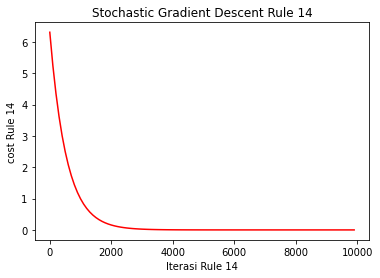

In [287]:
plt.xlabel("Iterasi Rule 14")
plt.ylabel("cost Rule 14")
plt.title("Stochastic Gradient Descent Rule 14")
plt.plot(s_iterasi_rule14_list,s_cost_rule1_list, color='red', label='Eror')
plt.show()

In [288]:
s_cost_rule14

2.4158865222393487e-30

In [289]:
s_b0_rule14

-0.8354258627298485

In [290]:
s_bpoly_rule14

array([0.84335765, 0.53907539, 0.85364802, 0.26005138])

In [291]:
data_rule_14

Age   TP    DB   AGR  Liver_Disease
148   17  6.1  11.8  0.40              2
198   33  7.5   7.0  1.00              2
209   21  8.2   9.5  1.00              2
417   32  5.5  17.1  0.90              2
418   32  5.8  14.1  1.10              2
456   26  7.5  19.7  0.50              2
465   20  6.9   8.4  1.02              2
471   32  6.6   6.0  0.50              2
473   32  5.3   8.2  0.70              2
474   32  5.4   8.4  0.90              2

In [292]:
X14=np.array(data_rule_14.iloc[::,:-1])
X14

array([[17.  ,  6.1 , 11.8 ,  0.4 ],
       [33.  ,  7.5 ,  7.  ,  1.  ],
       [21.  ,  8.2 ,  9.5 ,  1.  ],
       [32.  ,  5.5 , 17.1 ,  0.9 ],
       [32.  ,  5.8 , 14.1 ,  1.1 ],
       [26.  ,  7.5 , 19.7 ,  0.5 ],
       [20.  ,  6.9 ,  8.4 ,  1.02],
       [32.  ,  6.6 ,  6.  ,  0.5 ],
       [32.  ,  5.3 ,  8.2 ,  0.7 ],
       [32.  ,  5.4 ,  8.4 ,  0.9 ]])

In [293]:
Y14=np.array(data_rule_14.iloc[:,3])
Y14

array([0.4 , 1.  , 1.  , 0.9 , 1.1 , 0.5 , 1.02, 0.5 , 0.7 , 0.9 ])

In [294]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X14_poly = poly_reg.fit_transform(X14)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X14_poly, Y14) 
# Proses Training Model
poly_reg.fit(X14, Y14) 

# Memprediksi hasil dengan regresi polynomial
y14_pred=lin_reg_2.predict(poly_reg.fit_transform(X14))
y14_pred

data_rule_14['pred'] = y14_pred
data_rule_14

Age   TP    DB   AGR  Liver_Disease  pred
148   17  6.1  11.8  0.40              2  0.40
198   33  7.5   7.0  1.00              2  1.00
209   21  8.2   9.5  1.00              2  1.00
417   32  5.5  17.1  0.90              2  0.90
418   32  5.8  14.1  1.10              2  1.10
456   26  7.5  19.7  0.50              2  0.50
465   20  6.9   8.4  1.02              2  1.02
471   32  6.6   6.0  0.50              2  0.50
473   32  5.3   8.2  0.70              2  0.70
474   32  5.4   8.4  0.90              2  0.90

##Rule 15

In [295]:
#Rule 15
rule_15 = df_fuzz[df_fuzz['Rule']==" Jika X1 Muda dan X2 Normal dan X3 Menurun dan X4 Normal maka Y Nonliver"]
index=rule_15.index
data_rule_15=df_fuzz.iloc[index,:5]
data_rule_15

Age   TP   DB   AGR  Liver_Disease
71    32  7.5  0.1  1.34              2
89    17  6.9  0.2  1.55              2
99    15  6.1  0.2  1.50              2
133   31  6.0  0.1  1.60              2
134   31  6.0  0.1  1.60              2
345   29  7.5  0.2  1.58              2
374   28  6.8  0.2  1.51              2
407   25  6.5  0.2  1.50              2
409   24  8.0  0.2  1.50              2

In [296]:
data_rule_15.to_csv('hasilrule15.csv') 

###Stochastic Gradient Descent

In [297]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [298]:
df_rule15=pd.read_csv('hasilrule15.csv',sep=',')
df_rule15

Unnamed: 0  Age   TP   DB   AGR  Liver_Disease
0          71   32  7.5  0.1  1.34              2
1          89   17  6.9  0.2  1.55              2
2          99   15  6.1  0.2  1.50              2
3         133   31  6.0  0.1  1.60              2
4         134   31  6.0  0.1  1.60              2
5         345   29  7.5  0.2  1.58              2
6         374   28  6.8  0.2  1.51              2
7         407   25  6.5  0.2  1.50              2
8         409   24  8.0  0.2  1.50              2

In [299]:
df_rule15=df_rule15.drop(columns=['Unnamed: 0'])
df_rule15

Age   TP   DB   AGR  Liver_Disease
0   32  7.5  0.1  1.34              2
1   17  6.9  0.2  1.55              2
2   15  6.1  0.2  1.50              2
3   31  6.0  0.1  1.60              2
4   31  6.0  0.1  1.60              2
5   29  7.5  0.2  1.58              2
6   28  6.8  0.2  1.51              2
7   25  6.5  0.2  1.50              2
8   24  8.0  0.2  1.50              2

In [300]:
from sklearn import preprocessing
sx15 = preprocessing.MinMaxScaler()
sy15 = preprocessing.MinMaxScaler()

scaled_X15 = sx15.fit_transform(data_rule_15.drop('Liver_Disease',axis='columns'))
scaled_y15 = sy15.fit_transform(data_rule_15['Liver_Disease'].values.reshape(rule_15.shape[0],1))

scaled_X15

array([[1.        , 0.75      , 0.        , 0.        ],
       [0.11764706, 0.45      , 1.        , 0.80769231],
       [0.        , 0.05      , 1.        , 0.61538462],
       [0.94117647, 0.        , 0.        , 1.        ],
       [0.94117647, 0.        , 0.        , 1.        ],
       [0.82352941, 0.75      , 1.        , 0.92307692],
       [0.76470588, 0.4       , 1.        , 0.65384615],
       [0.58823529, 0.25      , 1.        , 0.61538462],
       [0.52941176, 1.        , 1.        , 0.61538462]])

In [301]:
scaled_y15_reshape=scaled_y15.reshape(scaled_y15.shape[0],)
scaled_y15_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [302]:
def stochastic_gradient_descent_rule15(X15, y15, iterasi, learning_rate = 0.1):

    jumlah_variabel_rule15 = X15.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule15 = np.ones(shape=(jumlah_variabel_rule15))       # b1, b2, ... b(jumlah variabel)
    b0_rule15 = 0                                         # b0 atau bias
    n = X15.shape[0]                                 # jumlah baris data X
    
    cost_rule15_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule15_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule15_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_index = np.random.RandomState(seed=42).randint(0, n-1)      # Memilih indeks data random untuk update parameter
        sample_x15 = X15[random_index]
        sample_y15 = y15[random_index]
        
        y15_pred = np.dot(bpoly_rule15, sample_x15.T) + b0_rule15                  # Menghitung y_pred pada setiap iterasi
        
        bpoly_rule15_grad = -(2/n)*(sample_x15.T.dot(sample_y15-y15_pred))    # Menghitung perubahan/gradien bpoly setiap iterasi
        b0_rule15_grad = -(2/n)*np.sum(sample_y15-y15_pred)                 # Menghitung perubahan/gradien b0 setiap iterasi
        bpoly_rule15 = bpoly_rule15 - learning_rate * bpoly_rule15_grad               # Memperbaharui bpoly setiap iterasi
        b0_rule15 = b0_rule15 - learning_rate * b0_rule15_grad                        # Memperbaharui bpoly setiap iterasi
        
        # Menyimpan parameter b dalam list tunggal
        bp=[]
        for jv_rule15 in range(jumlah_variabel_rule15):
            bp_rule15=bpoly_rule15[jv_rule15]
            bp.append(bp_rule15)
        b_rule15=[b0_rule15]+bp
        
        cost_rule15 = np.mean(np.square(sample_y15-y15_pred))        # MSE (Mean Squared Error)
        
        if i%100==0:                                      # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule15_list.append(cost_rule15)                        # Menyimpan nilai cost setiap iterasi
            iterasi_rule15_list.append(i)                        # Menyimpan nilai iterasi setiap iterasi
            b_rule15_list.append(b_rule15)                              # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule15, b0_rule15, cost_rule15, b_rule15_list, cost_rule15_list, iterasi_rule15_list  # Output

In [303]:
import time
mulai_rule15 = time.time()
s_bpoly_rule15, s_b0_rule15, s_cost_rule15, s_b_rule15_list, s_cost_rule15_list, s_iterasi_rule15_list=stochastic_gradient_descent_rule15 (scaled_X15, 
                                                                                                                                    scaled_y15_reshape,
                                                                                                                                    iterasi=10000,
                                                                                                                                     learning_rate = 0.1)
selesai_rule15 = time.time()
waktu_komputasi_rule15 = (selesai_rule15 - mulai_rule15)
print("Waktu Komputasi Rule 15: ",waktu_komputasi_rule15)

Waktu Komputasi Rule 15:  3.4990077018737793


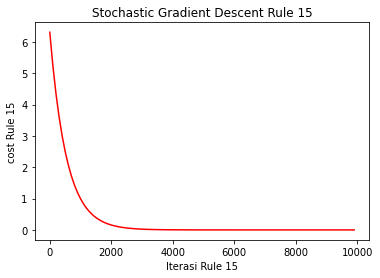

In [304]:
plt.xlabel("Iterasi Rule 15")
plt.ylabel("cost Rule 15")
plt.title("Stochastic Gradient Descent Rule 15")
plt.plot(s_iterasi_rule15_list,s_cost_rule1_list, color='red', label='Eror')
plt.show()

In [305]:
s_cost_rule15

4.930380657631324e-32

In [306]:
s_b0_rule15

-0.8884913243578179

In [307]:
s_bpoly_rule15

array([0.32056546, 0.64460347, 0.11150868, 0.41906336])

In [308]:
data_rule_15

Age   TP   DB   AGR  Liver_Disease
71    32  7.5  0.1  1.34              2
89    17  6.9  0.2  1.55              2
99    15  6.1  0.2  1.50              2
133   31  6.0  0.1  1.60              2
134   31  6.0  0.1  1.60              2
345   29  7.5  0.2  1.58              2
374   28  6.8  0.2  1.51              2
407   25  6.5  0.2  1.50              2
409   24  8.0  0.2  1.50              2

In [309]:
X15=np.array(data_rule_15.iloc[::,:-1])
X15

array([[32.  ,  7.5 ,  0.1 ,  1.34],
       [17.  ,  6.9 ,  0.2 ,  1.55],
       [15.  ,  6.1 ,  0.2 ,  1.5 ],
       [31.  ,  6.  ,  0.1 ,  1.6 ],
       [31.  ,  6.  ,  0.1 ,  1.6 ],
       [29.  ,  7.5 ,  0.2 ,  1.58],
       [28.  ,  6.8 ,  0.2 ,  1.51],
       [25.  ,  6.5 ,  0.2 ,  1.5 ],
       [24.  ,  8.  ,  0.2 ,  1.5 ]])

In [310]:
Y15=np.array(data_rule_15.iloc[:,3])
Y15

array([1.34, 1.55, 1.5 , 1.6 , 1.6 , 1.58, 1.51, 1.5 , 1.5 ])

In [311]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X15_poly = poly_reg.fit_transform(X15)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X15_poly, Y15) 
# Proses Training Model
poly_reg.fit(X15, Y15) 

# Memprediksi hasil dengan regresi polynomial
y15_pred=lin_reg_2.predict(poly_reg.fit_transform(X15))
y15_pred

data_rule_15['pred'] = y15_pred
data_rule_15

Age   TP   DB   AGR  Liver_Disease  pred
71    32  7.5  0.1  1.34              2  1.34
89    17  6.9  0.2  1.55              2  1.55
99    15  6.1  0.2  1.50              2  1.50
133   31  6.0  0.1  1.60              2  1.60
134   31  6.0  0.1  1.60              2  1.60
345   29  7.5  0.2  1.58              2  1.58
374   28  6.8  0.2  1.51              2  1.51
407   25  6.5  0.2  1.50              2  1.50
409   24  8.0  0.2  1.50              2  1.50

##Rule 16

In [312]:
#Rule 16
rule_16 = df_fuzz[df_fuzz['Rule']==" Jika X1 Tua dan X2 Rendah dan X3 Normal dan X4 Rendah maka Y Nonliver"]
index=rule_16.index
data_rule_16=df_fuzz.iloc[index,:5]
data_rule_16

Age   TP   DB  AGR  Liver_Disease
17    57  5.2  1.9  0.4              2
66    58  4.7  1.3  0.5              2
67    58  4.7  1.1  0.6              2
140   75  2.7  1.3  0.5              2
141   75  3.0  1.3  1.0              2
144   60  5.2  1.0  0.5              2
183   60  4.5  0.6  0.8              2
328   70  3.6  0.3  0.7              2

In [313]:
data_rule_16.to_csv('hasilrule16.csv') 

###Stochasti Gradient Descent

In [314]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [315]:
df_rule16=pd.read_csv('hasilrule16.csv',sep=',')
df_rule16

Unnamed: 0  Age   TP   DB  AGR  Liver_Disease
0          17   57  5.2  1.9  0.4              2
1          66   58  4.7  1.3  0.5              2
2          67   58  4.7  1.1  0.6              2
3         140   75  2.7  1.3  0.5              2
4         141   75  3.0  1.3  1.0              2
5         144   60  5.2  1.0  0.5              2
6         183   60  4.5  0.6  0.8              2
7         328   70  3.6  0.3  0.7              2

In [316]:
df_rule16=df_rule16.drop(columns=['Unnamed: 0'])
df_rule16

Age   TP   DB  AGR  Liver_Disease
0   57  5.2  1.9  0.4              2
1   58  4.7  1.3  0.5              2
2   58  4.7  1.1  0.6              2
3   75  2.7  1.3  0.5              2
4   75  3.0  1.3  1.0              2
5   60  5.2  1.0  0.5              2
6   60  4.5  0.6  0.8              2
7   70  3.6  0.3  0.7              2

In [317]:
from sklearn import preprocessing
sx16 = preprocessing.MinMaxScaler()
sy16 = preprocessing.MinMaxScaler()

scaled_X16 = sx16.fit_transform(data_rule_16.drop('Liver_Disease',axis='columns'))
scaled_y16 = sy16.fit_transform(data_rule_16['Liver_Disease'].values.reshape(rule_16.shape[0],1))

scaled_X16

array([[0.        , 1.        , 1.        , 0.        ],
       [0.05555556, 0.8       , 0.625     , 0.16666667],
       [0.05555556, 0.8       , 0.5       , 0.33333333],
       [1.        , 0.        , 0.625     , 0.16666667],
       [1.        , 0.12      , 0.625     , 1.        ],
       [0.16666667, 1.        , 0.4375    , 0.16666667],
       [0.16666667, 0.72      , 0.1875    , 0.66666667],
       [0.72222222, 0.36      , 0.        , 0.5       ]])

In [318]:
scaled_y16_reshape=scaled_y16.reshape(scaled_y16.shape[0],)
scaled_y16_reshape

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [319]:
def stochastic_gradient_descent_rule16(X16, y16, iterasi, learning_rate = 0.1):

    jumlah_variabel_rule16 = X16.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule16 = np.ones(shape=(jumlah_variabel_rule16))       # b1, b2, ... b(jumlah variabel)
    b0_rule16 = 0                                         # b0 atau bias
    n = X16.shape[0]                                 # jumlah baris data X
    
    cost_rule16_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule16_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule16_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_index = np.random.RandomState(seed=42).randint(0, n-1)      # Memilih indeks data random untuk update parameter
        sample_x16 = X16[random_index]
        sample_y16 = y16[random_index]
        
        y16_pred = np.dot(bpoly_rule16, sample_x16.T) + b0_rule16                  # Menghitung y_pred pada setiap iterasi
        
        bpoly_rule16_grad = -(2/n)*(sample_x16.T.dot(sample_y16-y16_pred))    # Menghitung perubahan/gradien bpoly setiap iterasi
        b0_rule16_grad = -(2/n)*np.sum(sample_y16-y16_pred)                 # Menghitung perubahan/gradien b0 setiap iterasi
        bpoly_rule16 = bpoly_rule16 - learning_rate * bpoly_rule16_grad               # Memperbaharui bpoly setiap iterasi
        b0_rule16 = b0_rule16 - learning_rate * b0_rule16_grad                        # Memperbaharui bpoly setiap iterasi
        
        # Menyimpan parameter b dalam list tunggal
        bp=[]
        for jv_rule16 in range(jumlah_variabel_rule16):
            bp_rule16=bpoly_rule16[jv_rule16]
            bp.append(bp_rule16)
        b_rule16=[b0_rule16]+bp
        
        cost_rule16 = np.mean(np.square(sample_y16-y16_pred))        # MSE (Mean Squared Error)
        
        if i%100==0:                                      # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule16_list.append(cost_rule16)                        # Menyimpan nilai cost setiap iterasi
            iterasi_rule16_list.append(i)                        # Menyimpan nilai iterasi setiap iterasi
            b_rule16_list.append(b_rule16)                              # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule16, b0_rule16, cost_rule16, b_rule16_list, cost_rule16_list, iterasi_rule16_list  # Output

In [320]:
import time
mulai_rule16 = time.time()
s_bpoly_rule16, s_b0_rule16, s_cost_rule16, s_b_rule16_list, s_cost_rule16_list, s_iterasi_rule16_list=stochastic_gradient_descent_rule16 (scaled_X16, 
                                                                                                                                    scaled_y16_reshape,
                                                                                                                                    iterasi=10000,
                                                                                                                                     learning_rate = 0.1)
selesai_rule16 = time.time()
waktu_komputasi_rule16 = (selesai_rule16 - mulai_rule16)
print("Waktu Komputasi Rule 16: ",waktu_komputasi_rule16)

Waktu Komputasi Rule 16:  3.345015287399292


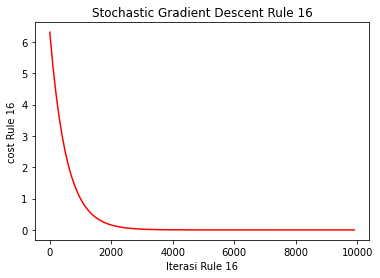

In [321]:
plt.xlabel("Iterasi Rule 16")
plt.ylabel("cost Rule 16")
plt.title("Stochastic Gradient Descent Rule 16")
plt.plot(s_iterasi_rule16_list,s_cost_rule1_list, color='red', label='Eror')
plt.show()

In [322]:
s_cost_rule16

2.0830858278492343e-30

In [323]:
s_b0_rule16

-0.8593404250286488

In [324]:
s_bpoly_rule16

array([0.8567766 , 0.38127489, 0.83887367, 0.42710638])

In [325]:
data_rule_16

Age   TP   DB  AGR  Liver_Disease
17    57  5.2  1.9  0.4              2
66    58  4.7  1.3  0.5              2
67    58  4.7  1.1  0.6              2
140   75  2.7  1.3  0.5              2
141   75  3.0  1.3  1.0              2
144   60  5.2  1.0  0.5              2
183   60  4.5  0.6  0.8              2
328   70  3.6  0.3  0.7              2

In [326]:
X16=np.array(data_rule_16.iloc[::,:-1])
X16

array([[57. ,  5.2,  1.9,  0.4],
       [58. ,  4.7,  1.3,  0.5],
       [58. ,  4.7,  1.1,  0.6],
       [75. ,  2.7,  1.3,  0.5],
       [75. ,  3. ,  1.3,  1. ],
       [60. ,  5.2,  1. ,  0.5],
       [60. ,  4.5,  0.6,  0.8],
       [70. ,  3.6,  0.3,  0.7]])

In [327]:
Y16=np.array(data_rule_16.iloc[:,3])
Y16

array([0.4, 0.5, 0.6, 0.5, 1. , 0.5, 0.8, 0.7])

In [328]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X16_poly = poly_reg.fit_transform(X16)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X16_poly, Y16) 
# Proses Training Model
poly_reg.fit(X16, Y16) 

# Memprediksi hasil dengan regresi polynomial
y16_pred=lin_reg_2.predict(poly_reg.fit_transform(X16))
y16_pred

data_rule_16['pred'] = y16_pred
data_rule_16

Age   TP   DB  AGR  Liver_Disease  pred
17    57  5.2  1.9  0.4              2   0.4
66    58  4.7  1.3  0.5              2   0.5
67    58  4.7  1.1  0.6              2   0.6
140   75  2.7  1.3  0.5              2   0.5
141   75  3.0  1.3  1.0              2   1.0
144   60  5.2  1.0  0.5              2   0.5
183   60  4.5  0.6  0.8              2   0.8
328   70  3.6  0.3  0.7              2   0.7

##Rule 17

In [329]:
#Rule 17
rule_17 = df_fuzz[df_fuzz['Rule']==" Jika X1 Tua dan X2 Normal dan X3 Normal dan X4 Rendah maka Y Liver"]
index=rule_17.index
data_rule_17=df_fuzz.iloc[index,:5]
data_rule_17

Age   TP   DB  AGR  Liver_Disease
31    85  7.0  0.3  1.0              1
110   56  6.9  0.5  1.2              1
176   65  5.3  0.3  0.9              1
178   61  6.7  0.6  1.3              1
190   65  7.0  0.3  1.2              1
287   55  6.2  0.3  0.8              1
292   60  6.1  1.0  0.9              1
425   56  5.8  0.3  0.8              1

In [330]:
data_rule_17.to_csv('hasilrule17.csv') 

###Stochastic Gradient Descent

In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [332]:
df_rule17=pd.read_csv('hasilrule17.csv',sep=',')
df_rule17

Unnamed: 0  Age   TP   DB  AGR  Liver_Disease
0          31   85  7.0  0.3  1.0              1
1         110   56  6.9  0.5  1.2              1
2         176   65  5.3  0.3  0.9              1
3         178   61  6.7  0.6  1.3              1
4         190   65  7.0  0.3  1.2              1
5         287   55  6.2  0.3  0.8              1
6         292   60  6.1  1.0  0.9              1
7         425   56  5.8  0.3  0.8              1

In [333]:
df_rule17=df_rule17.drop(columns=['Unnamed: 0'])
df_rule17

Age   TP   DB  AGR  Liver_Disease
0   85  7.0  0.3  1.0              1
1   56  6.9  0.5  1.2              1
2   65  5.3  0.3  0.9              1
3   61  6.7  0.6  1.3              1
4   65  7.0  0.3  1.2              1
5   55  6.2  0.3  0.8              1
6   60  6.1  1.0  0.9              1
7   56  5.8  0.3  0.8              1

In [334]:
from sklearn import preprocessing
sx17 = preprocessing.MinMaxScaler()
sy17 = preprocessing.MinMaxScaler()

scaled_X17 = sx17.fit_transform(data_rule_17.drop('Liver_Disease',axis='columns'))
scaled_y17 = sy17.fit_transform(data_rule_17['Liver_Disease'].values.reshape(rule_17.shape[0],1))

scaled_X17

array([[1.        , 1.        , 0.        , 0.4       ],
       [0.03333333, 0.94117647, 0.28571429, 0.8       ],
       [0.33333333, 0.        , 0.        , 0.2       ],
       [0.2       , 0.82352941, 0.42857143, 1.        ],
       [0.33333333, 1.        , 0.        , 0.8       ],
       [0.        , 0.52941176, 0.        , 0.        ],
       [0.16666667, 0.47058824, 1.        , 0.2       ],
       [0.03333333, 0.29411765, 0.        , 0.        ]])

In [335]:
scaled_y17_reshape=scaled_y17.reshape(scaled_y17.shape[0],)
scaled_y17_reshape

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [336]:
def stochastic_gradient_descent_rule17(X17, y17, iterasi, learning_rate = 0.1):

    jumlah_variabel_rule17 = X17.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule17 = np.ones(shape=(jumlah_variabel_rule17))       # b1, b2, ... b(jumlah variabel)
    b0_rule17 = 0                                         # b0 atau bias
    n = X17.shape[0]                                 # jumlah baris data X
    
    cost_rule17_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule17_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule17_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_index = np.random.RandomState(seed=42).randint(0, n-1)      # Memilih indeks data random untuk update parameter
        sample_x17 = X17[random_index]
        sample_y17 = y17[random_index]
        
        y17_pred = np.dot(bpoly_rule17, sample_x17.T) + b0_rule17                  # Menghitung y_pred pada setiap iterasi
        
        bpoly_rule17_grad = -(2/n)*(sample_x17.T.dot(sample_y17-y17_pred))    # Menghitung perubahan/gradien bpoly setiap iterasi
        b0_rule17_grad = -(2/n)*np.sum(sample_y17-y17_pred)                 # Menghitung perubahan/gradien b0 setiap iterasi
        bpoly_rule17 = bpoly_rule17 - learning_rate * bpoly_rule17_grad               # Memperbaharui bpoly setiap iterasi
        b0_rule17 = b0_rule17 - learning_rate * b0_rule17_grad                        # Memperbaharui bpoly setiap iterasi
        
        # Menyimpan parameter b dalam list tunggal
        bp=[]
        for jv_rule17 in range(jumlah_variabel_rule17):
            bp_rule17=bpoly_rule17[jv_rule17]
            bp.append(bp_rule17)
        b_rule17=[b0_rule17]+bp
        
        cost_rule17 = np.mean(np.square(sample_y17-y17_pred))        # MSE (Mean Squared Error)
        
        if i%100==0:                                      # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule17_list.append(cost_rule17)                        # Menyimpan nilai cost setiap iterasi
            iterasi_rule17_list.append(i)                        # Menyimpan nilai iterasi setiap iterasi
            b_rule17_list.append(b_rule17)                              # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule17, b0_rule17, cost_rule17, b_rule17_list, cost_rule17_list, iterasi_rule17_list  # Output

In [337]:
import time
mulai_rule17 = time.time()
s_bpoly_rule17, s_b0_rule17, s_cost_rule17, s_b_rule17_list, s_cost_rule17_list, s_iterasi_rule17_list=stochastic_gradient_descent_rule17 (scaled_X17, 
                                                                                                                                    scaled_y17_reshape,
                                                                                                                                    iterasi=10000,
                                                                                                                                     learning_rate = 0.1)
selesai_rule17 = time.time()
waktu_komputasi_rule17 = (selesai_rule17 - mulai_rule17)
print("Waktu Komputasi Rule 17: ",waktu_komputasi_rule17)

Waktu Komputasi Rule 17:  3.0696377754211426


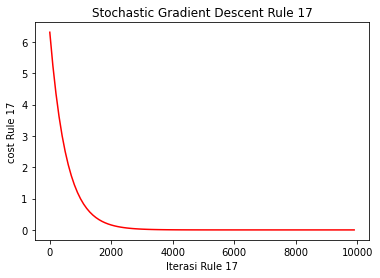

In [338]:
plt.xlabel("Iterasi Rule 17")
plt.ylabel("cost Rule 17")
plt.title("Stochastic Gradient Descent Rule 17")
plt.plot(s_iterasi_rule17_list,s_cost_rule1_list, color='red', label='Eror')
plt.show()

In [339]:
s_cost_rule17

3.0814879110195774e-31

In [340]:
s_b0_rule17

-0.8025642016092589

In [341]:
s_bpoly_rule17

array([0.8662393 , 0.62232273, 0.1974358 , 0.83948716])

##Rule 18

In [342]:
#Rule 18
rule_18 = df_fuzz[df_fuzz['Rule']==" Jika X1 Tua dan X2 Rendah dan X3 Menurun dan X4 Rendah maka Y Nonliver"]
index=rule_18.index
data_rule_18=df_fuzz.iloc[index,:5]
data_rule_18

Age   TP   DB   AGR  Liver_Disease
50    57  5.1  0.2  0.70              2
58    75  4.4  0.2  0.60              2
59    75  4.4  0.2  0.80              2
64    68  4.6  0.1  0.80              2
82    75  4.4  0.2  1.00              2
351   65  3.8  0.2  0.50              2
382   66  4.4  0.2  0.80              2
390   55  5.1  0.2  0.88              2

In [343]:
data_rule_18.to_csv('hasilrule18.csv')

###Stochastic Gradient Descent

In [344]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [345]:
df_rule18=pd.read_csv('hasilrule18.csv',sep=',')
df_rule18

Unnamed: 0  Age   TP   DB   AGR  Liver_Disease
0          50   57  5.1  0.2  0.70              2
1          58   75  4.4  0.2  0.60              2
2          59   75  4.4  0.2  0.80              2
3          64   68  4.6  0.1  0.80              2
4          82   75  4.4  0.2  1.00              2
5         351   65  3.8  0.2  0.50              2
6         382   66  4.4  0.2  0.80              2
7         390   55  5.1  0.2  0.88              2

In [346]:
df_rule18=df_rule18.drop(columns=['Unnamed: 0'])
df_rule18

Age   TP   DB   AGR  Liver_Disease
0   57  5.1  0.2  0.70              2
1   75  4.4  0.2  0.60              2
2   75  4.4  0.2  0.80              2
3   68  4.6  0.1  0.80              2
4   75  4.4  0.2  1.00              2
5   65  3.8  0.2  0.50              2
6   66  4.4  0.2  0.80              2
7   55  5.1  0.2  0.88              2

In [347]:
from sklearn import preprocessing
sx18 = preprocessing.MinMaxScaler()
sy18 = preprocessing.MinMaxScaler()

scaled_X18 = sx18.fit_transform(data_rule_18.drop('Liver_Disease',axis='columns'))
scaled_y18 = sy18.fit_transform(data_rule_18['Liver_Disease'].values.reshape(rule_18.shape[0],1))

scaled_X18

array([[0.1       , 1.        , 1.        , 0.4       ],
       [1.        , 0.46153846, 1.        , 0.2       ],
       [1.        , 0.46153846, 1.        , 0.6       ],
       [0.65      , 0.61538462, 0.        , 0.6       ],
       [1.        , 0.46153846, 1.        , 1.        ],
       [0.5       , 0.        , 1.        , 0.        ],
       [0.55      , 0.46153846, 1.        , 0.6       ],
       [0.        , 1.        , 1.        , 0.76      ]])

In [348]:
scaled_y18_reshape=scaled_y18.reshape(scaled_y18.shape[0],)
scaled_y18_reshape

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [349]:
def stochastic_gradient_descent_rule18(X18, y18, iterasi, learning_rate = 0.1):

    jumlah_variabel_rule18 = X18.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule18 = np.ones(shape=(jumlah_variabel_rule18))       # b1, b2, ... b(jumlah variabel)
    b0_rule18 = 0                                         # b0 atau bias
    n = X18.shape[0]                                 # jumlah baris data X
    
    cost_rule18_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule18_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule18_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_index = np.random.RandomState(seed=42).randint(0, n-1)      # Memilih indeks data random untuk update parameter
        sample_x18 = X18[random_index]
        sample_y18 = y18[random_index]
        
        y18_pred = np.dot(bpoly_rule18, sample_x18.T) + b0_rule18                  # Menghitung y_pred pada setiap iterasi
        
        bpoly_rule18_grad = -(2/n)*(sample_x18.T.dot(sample_y18-y18_pred))    # Menghitung perubahan/gradien bpoly setiap iterasi
        b0_rule18_grad = -(2/n)*np.sum(sample_y18-y18_pred)                 # Menghitung perubahan/gradien b0 setiap iterasi
        bpoly_rule18 = bpoly_rule18 - learning_rate * bpoly_rule18_grad               # Memperbaharui bpoly setiap iterasi
        b0_rule18 = b0_rule18 - learning_rate * b0_rule18_grad                        # Memperbaharui bpoly setiap iterasi
        
        # Menyimpan parameter b dalam list tunggal
        bp=[]
        for jv_rule18 in range(jumlah_variabel_rule18):
            bp_rule18=bpoly_rule18[jv_rule18]
            bp.append(bp_rule18)
        b_rule18=[b0_rule18]+bp
        
        cost_rule18 = np.mean(np.square(sample_y18-y18_pred))        # MSE (Mean Squared Error)
        
        if i%100==0:                                      # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule18_list.append(cost_rule18)                        # Menyimpan nilai cost setiap iterasi
            iterasi_rule18_list.append(i)                        # Menyimpan nilai iterasi setiap iterasi
            b_rule18_list.append(b_rule18)                              # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule18, b0_rule18, cost_rule18, b_rule18_list, cost_rule18_list, iterasi_rule18_list  # Output

In [350]:
import time
mulai_rule18 = time.time()
s_bpoly_rule18, s_b0_rule18, s_cost_rule18, s_b_rule18_list, s_cost_rule18_list, s_iterasi_rule18_list=stochastic_gradient_descent_rule18 (scaled_X18, 
                                                                                                                                    scaled_y18_reshape,
                                                                                                                                    iterasi=10000,
                                                                                                                                     learning_rate = 0.1)
selesai_rule18 = time.time()
waktu_komputasi_rule18 = (selesai_rule18 - mulai_rule18)
print("Waktu Komputasi Rule 18: ",waktu_komputasi_rule18)

Waktu Komputasi Rule 18:  3.2795145511627197


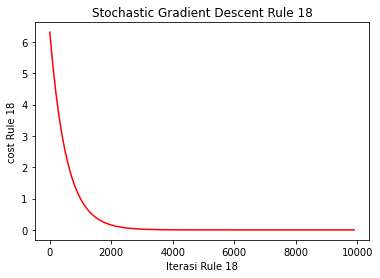

In [351]:
plt.xlabel("Iterasi Rule 18")
plt.ylabel("cost Rule 18")
plt.title("Stochastic Gradient Descent Rule 18")
plt.plot(s_iterasi_rule18_list,s_cost_rule1_list, color='red', label='Eror')
plt.show()

In [352]:
s_cost_rule18

4.930380657631324e-32

In [353]:
s_b0_rule18

-0.9081976489955497

In [354]:
s_bpoly_rule18

array([0.50049129, 0.58083185, 0.09180235, 0.45508141])

##Rule 19

In [355]:
#Rule 19
rule_19 = df_fuzz[df_fuzz['Rule']==" Jika X1 Paruh baya dan X2 Rendah dan X3 Menurun dan X4 Rendah maka Y Nonliver"]
index=rule_19.index
data_rule_19=df_fuzz.iloc[index,:5]
data_rule_19

Age   TP   DB  AGR  Liver_Disease
45    51  5.2  0.2  0.6              2
149   49  5.0  0.1  0.9              2
150   49  5.0  0.1  0.9              2
168   37  5.0  0.2  1.0              2
186   40  5.0  0.1  1.0              2
343   53  4.8  0.1  0.6              2
415   42  4.9  0.2  1.2              2

In [356]:
data_rule_19.to_csv('hasilrule19.csv')

###Stochastic Gradient Descent

In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [358]:
df_rule19=pd.read_csv('hasilrule19.csv',sep=',')
df_rule19

Unnamed: 0  Age   TP   DB  AGR  Liver_Disease
0          45   51  5.2  0.2  0.6              2
1         149   49  5.0  0.1  0.9              2
2         150   49  5.0  0.1  0.9              2
3         168   37  5.0  0.2  1.0              2
4         186   40  5.0  0.1  1.0              2
5         343   53  4.8  0.1  0.6              2
6         415   42  4.9  0.2  1.2              2

In [359]:
df_rule19=df_rule19.drop(columns=['Unnamed: 0'])
df_rule19

Age   TP   DB  AGR  Liver_Disease
0   51  5.2  0.2  0.6              2
1   49  5.0  0.1  0.9              2
2   49  5.0  0.1  0.9              2
3   37  5.0  0.2  1.0              2
4   40  5.0  0.1  1.0              2
5   53  4.8  0.1  0.6              2
6   42  4.9  0.2  1.2              2

In [360]:
from sklearn import preprocessing
sx19 = preprocessing.MinMaxScaler()
sy19 = preprocessing.MinMaxScaler()

scaled_X19 = sx19.fit_transform(data_rule_19.drop('Liver_Disease',axis='columns'))
scaled_y19 = sy19.fit_transform(data_rule_19['Liver_Disease'].values.reshape(rule_19.shape[0],1))

scaled_X19

array([[0.875     , 1.        , 1.        , 0.        ],
       [0.75      , 0.5       , 0.        , 0.5       ],
       [0.75      , 0.5       , 0.        , 0.5       ],
       [0.        , 0.5       , 1.        , 0.66666667],
       [0.1875    , 0.5       , 0.        , 0.66666667],
       [1.        , 0.        , 0.        , 0.        ],
       [0.3125    , 0.25      , 1.        , 1.        ]])

In [361]:
scaled_y19_reshape=scaled_y19.reshape(scaled_y19.shape[0],)
scaled_y19_reshape

array([0., 0., 0., 0., 0., 0., 0.])

In [362]:
def stochastic_gradient_descent_rule19(X19, y19, iterasi, learning_rate = 0.1):

    jumlah_variabel_rule19 = X19.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule19 = np.ones(shape=(jumlah_variabel_rule19))       # b1, b2, ... b(jumlah variabel)
    b0_rule19 = 0                                         # b0 atau bias
    n = X19.shape[0]                                 # jumlah baris data X
    
    cost_rule19_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule19_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule19_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_index = np.random.RandomState(seed=42).randint(0, n-1)      # Memilih indeks data random untuk update parameter
        sample_x19 = X19[random_index]
        sample_y19 = y19[random_index]
        
        y19_pred = np.dot(bpoly_rule19, sample_x19.T) + b0_rule19                  # Menghitung y_pred pada setiap iterasi
        
        bpoly_rule19_grad = -(2/n)*(sample_x19.T.dot(sample_y19-y19_pred))    # Menghitung perubahan/gradien bpoly setiap iterasi
        b0_rule19_grad = -(2/n)*np.sum(sample_y19-y19_pred)                 # Menghitung perubahan/gradien b0 setiap iterasi
        bpoly_rule19 = bpoly_rule19 - learning_rate * bpoly_rule19_grad               # Memperbaharui bpoly setiap iterasi
        b0_rule19 = b0_rule19 - learning_rate * b0_rule19_grad                        # Memperbaharui bpoly setiap iterasi
        
        # Menyimpan parameter b dalam list tunggal
        bp=[]
        for jv_rule19 in range(jumlah_variabel_rule19):
            bp_rule19=bpoly_rule19[jv_rule19]
            bp.append(bp_rule19)
        b_rule19=[b0_rule19]+bp
        
        cost_rule19 = np.mean(np.square(sample_y19-y19_pred))        # MSE (Mean Squared Error)
        
        if i%100==0:                                      # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule19_list.append(cost_rule19)                        # Menyimpan nilai cost setiap iterasi
            iterasi_rule19_list.append(i)                        # Menyimpan nilai iterasi setiap iterasi
            b_rule19_list.append(b_rule19)                              # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule19, b0_rule19, cost_rule19, b_rule19_list, cost_rule19_list, iterasi_rule19_list  # Output

In [363]:
import time
mulai_rule19 = time.time()
s_bpoly_rule19, s_b0_rule19, s_cost_rule19, s_b_rule19_list, s_cost_rule19_list, s_iterasi_rule19_list=stochastic_gradient_descent_rule19 (scaled_X19, 
                                                                                                                                    scaled_y19_reshape,
                                                                                                                                    iterasi=10000,
                                                                                                                                     learning_rate = 0.1)
selesai_rule19 = time.time()
waktu_komputasi_rule19 = (selesai_rule19 - mulai_rule19)
print("Waktu Komputasi Rule 19: ",waktu_komputasi_rule19)

Waktu Komputasi Rule 19:  3.33201265335083


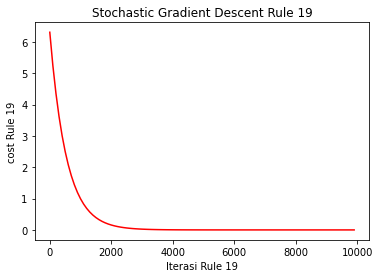

In [364]:
plt.xlabel("Iterasi Rule 19")
plt.ylabel("cost Rule 19")
plt.title("Stochastic Gradient Descent Rule 19")
plt.plot(s_iterasi_rule19_list,s_cost_rule1_list, color='red', label='Eror')
plt.show()

In [365]:
s_cost_rule19

1.9721522630525295e-31

In [366]:
s_b0_rule19

-0.8041237113402062

In [367]:
s_bpoly_rule19

array([1.        , 0.59793814, 0.19587629, 0.46391753])

##Rule 20

In [368]:
#Rule 20
rule_20 = df_fuzz[df_fuzz['Rule']==" Jika X1 Paruh baya dan X2 Rendah dan X3 Normal dan X4 Rendah maka Y Nonliver"]
index=rule_20.index
data_rule_20=df_fuzz.iloc[index,:5]
data_rule_20

Age   TP   DB  AGR  Liver_Disease
10    40  4.3  1.0  0.6              2
27    45  5.1  1.1  1.0              2
34    40  4.9  0.3  1.3              2
84    39  4.0  3.0  0.7              2
350   35  5.2  0.7  0.9              2
354   42  4.1  1.1  0.7              2
355   42  4.6  3.6  0.7              2

In [369]:
data_rule_20.to_csv('hasilrule20.csv')

###Stochastic Gradient Descent

In [370]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [371]:
df_rule20=pd.read_csv('hasilrule20.csv',sep=',')
df_rule20

Unnamed: 0  Age   TP   DB  AGR  Liver_Disease
0          10   40  4.3  1.0  0.6              2
1          27   45  5.1  1.1  1.0              2
2          34   40  4.9  0.3  1.3              2
3          84   39  4.0  3.0  0.7              2
4         350   35  5.2  0.7  0.9              2
5         354   42  4.1  1.1  0.7              2
6         355   42  4.6  3.6  0.7              2

In [372]:
df_rule20=df_rule20.drop(columns=['Unnamed: 0'])
df_rule20

Age   TP   DB  AGR  Liver_Disease
0   40  4.3  1.0  0.6              2
1   45  5.1  1.1  1.0              2
2   40  4.9  0.3  1.3              2
3   39  4.0  3.0  0.7              2
4   35  5.2  0.7  0.9              2
5   42  4.1  1.1  0.7              2
6   42  4.6  3.6  0.7              2

In [373]:
from sklearn import preprocessing
sx20 = preprocessing.MinMaxScaler()
sy20 = preprocessing.MinMaxScaler()

scaled_X20 = sx20.fit_transform(data_rule_20.drop('Liver_Disease',axis='columns'))
scaled_y20 = sy20.fit_transform(data_rule_20['Liver_Disease'].values.reshape(rule_20.shape[0],1))

scaled_X20

array([[0.5       , 0.25      , 0.21212121, 0.        ],
       [1.        , 0.91666667, 0.24242424, 0.57142857],
       [0.5       , 0.75      , 0.        , 1.        ],
       [0.4       , 0.        , 0.81818182, 0.14285714],
       [0.        , 1.        , 0.12121212, 0.42857143],
       [0.7       , 0.08333333, 0.24242424, 0.14285714],
       [0.7       , 0.5       , 1.        , 0.14285714]])

In [374]:
scaled_y20_reshape=scaled_y20.reshape(scaled_y20.shape[0],)
scaled_y20_reshape

array([0., 0., 0., 0., 0., 0., 0.])

In [375]:
def stochastic_gradient_descent_rule20(X20, y20, iterasi, learning_rate = 0.1):

    jumlah_variabel_rule20 = X20.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule20 = np.ones(shape=(jumlah_variabel_rule20))       # b1, b2, ... b(jumlah variabel)
    b0_rule20 = 0                                         # b0 atau bias
    n = X20.shape[0]                                 # jumlah baris data X
    
    cost_rule20_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule20_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule20_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_index = np.random.RandomState(seed=42).randint(0, n-1)      # Memilih indeks data random untuk update parameter
        sample_x20 = X20[random_index]
        sample_y20 = y20[random_index]
        
        y20_pred = np.dot(bpoly_rule20, sample_x20.T) + b0_rule20                  # Menghitung y_pred pada setiap iterasi
        
        bpoly_rule20_grad = -(2/n)*(sample_x20.T.dot(sample_y20-y20_pred))    # Menghitung perubahan/gradien bpoly setiap iterasi
        b0_rule20_grad = -(2/n)*np.sum(sample_y20-y20_pred)                 # Menghitung perubahan/gradien b0 setiap iterasi
        bpoly_rule20 = bpoly_rule20 - learning_rate * bpoly_rule20_grad               # Memperbaharui bpoly setiap iterasi
        b0_rule20 = b0_rule20 - learning_rate * b0_rule20_grad                        # Memperbaharui bpoly setiap iterasi
        
        # Menyimpan parameter b dalam list tunggal
        bp=[]
        for jv_rule20 in range(jumlah_variabel_rule20):
            bp_rule20=bpoly_rule20[jv_rule20]
            bp.append(bp_rule20)
        b_rule20=[b0_rule20]+bp
        
        cost_rule20 = np.mean(np.square(sample_y20-y20_pred))        # MSE (Mean Squared Error)
        
        if i%100==0:                                      # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule20_list.append(cost_rule20)                        # Menyimpan nilai cost setiap iterasi
            iterasi_rule20_list.append(i)                        # Menyimpan nilai iterasi setiap iterasi
            b_rule20_list.append(b_rule20)                              # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule20, b0_rule20, cost_rule20, b_rule20_list, cost_rule20_list, iterasi_rule20_list  # Output

In [376]:
import time
mulai_rule20 = time.time()
s_bpoly_rule20, s_b0_rule20, s_cost_rule20, s_b_rule20_list, s_cost_rule20_list, s_iterasi_rule20_list=stochastic_gradient_descent_rule20 (scaled_X20, 
                                                                                                                                    scaled_y20_reshape,
                                                                                                                                    iterasi=10000,
                                                                                                                                     learning_rate = 0.1)
selesai_rule20 = time.time()
waktu_komputasi_rule20 = (selesai_rule20 - mulai_rule20)
print("Waktu Komputasi Rule 20: ",waktu_komputasi_rule20)

Waktu Komputasi Rule 20:  3.7905492782592773


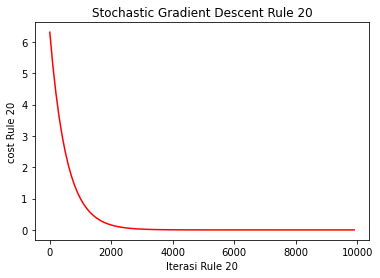

In [377]:
plt.xlabel("Iterasi Rule 20")
plt.ylabel("cost Rule 20")
plt.title("Stochastic Gradient Descent Rule 20")
plt.plot(s_iterasi_rule20_list,s_cost_rule1_list, color='red', label='Eror')
plt.show()

In [378]:
s_cost_rule20

1.232595164407831e-30

In [379]:
s_b0_rule20

-0.7357644853405105

In [380]:
s_bpoly_rule20

array([0.70569421, 1.        , 0.39801088, 0.89489079])

##Rule 21

In [381]:
#Rule 21
rule_21 = df_fuzz[df_fuzz['Rule']==" Jika X1 Paruh baya dan X2 Normal dan X3 Normal dan X4 Normal maka Y Nonliver"]
index=rule_21.index
data_rule_21=df_fuzz.iloc[index,:5]
data_rule_21

Age   TP   DB   AGR  Liver_Disease
53    54  6.0  1.2  1.60              2
54    37  6.4  0.8  1.40              2
123   39  7.4  0.9  1.38              2
124   39  7.4  0.9  1.38              2
165   49  7.0  0.5  1.50              2
204   43  7.4  0.3  1.80              2
446   40  7.8  1.0  1.60              2

In [382]:
data_rule_21.to_csv('hasilrule21.csv')

###Stochastic Gradient Descent

In [383]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [384]:
df_rule21=pd.read_csv('hasilrule21.csv',sep=',')
df_rule21

Unnamed: 0  Age   TP   DB   AGR  Liver_Disease
0          53   54  6.0  1.2  1.60              2
1          54   37  6.4  0.8  1.40              2
2         123   39  7.4  0.9  1.38              2
3         124   39  7.4  0.9  1.38              2
4         165   49  7.0  0.5  1.50              2
5         204   43  7.4  0.3  1.80              2
6         446   40  7.8  1.0  1.60              2

In [385]:
df_rule21=df_rule21.drop(columns=['Unnamed: 0'])
df_rule21

Age   TP   DB   AGR  Liver_Disease
0   54  6.0  1.2  1.60              2
1   37  6.4  0.8  1.40              2
2   39  7.4  0.9  1.38              2
3   39  7.4  0.9  1.38              2
4   49  7.0  0.5  1.50              2
5   43  7.4  0.3  1.80              2
6   40  7.8  1.0  1.60              2

In [386]:
from sklearn import preprocessing
sx21 = preprocessing.MinMaxScaler()
sy21 = preprocessing.MinMaxScaler()

scaled_X21 = sx21.fit_transform(data_rule_21.drop('Liver_Disease',axis='columns'))
scaled_y21 = sy21.fit_transform(data_rule_21['Liver_Disease'].values.reshape(rule_21.shape[0],1))

scaled_X21

array([[1.        , 0.        , 1.        , 0.52380952],
       [0.        , 0.22222222, 0.55555556, 0.04761905],
       [0.11764706, 0.77777778, 0.66666667, 0.        ],
       [0.11764706, 0.77777778, 0.66666667, 0.        ],
       [0.70588235, 0.55555556, 0.22222222, 0.28571429],
       [0.35294118, 0.77777778, 0.        , 1.        ],
       [0.17647059, 1.        , 0.77777778, 0.52380952]])

In [387]:
scaled_y21_reshape=scaled_y21.reshape(scaled_y21.shape[0],)
scaled_y21_reshape

array([0., 0., 0., 0., 0., 0., 0.])

In [388]:
def stochastic_gradient_descent_rule21(X21, y21, iterasi, learning_rate = 0.1):

    jumlah_variabel_rule21 = X21.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule21 = np.ones(shape=(jumlah_variabel_rule21))       # b1, b2, ... b(jumlah variabel)
    b0_rule21 = 0                                         # b0 atau bias
    n = X21.shape[0]                                 # jumlah baris data X
    
    cost_rule21_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule21_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule21_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_index = np.random.RandomState(seed=42).randint(0, n-1)      # Memilih indeks data random untuk update parameter
        sample_x21 = X21[random_index]
        sample_y21 = y21[random_index]
        
        y21_pred = np.dot(bpoly_rule21, sample_x21.T) + b0_rule21                  # Menghitung y_pred pada setiap iterasi
        
        bpoly_rule21_grad = -(2/n)*(sample_x21.T.dot(sample_y21-y21_pred))    # Menghitung perubahan/gradien bpoly setiap iterasi
        b0_rule21_grad = -(2/n)*np.sum(sample_y21-y21_pred)                 # Menghitung perubahan/gradien b0 setiap iterasi
        bpoly_rule21 = bpoly_rule21 - learning_rate * bpoly_rule21_grad               # Memperbaharui bpoly setiap iterasi
        b0_rule21 = b0_rule21 - learning_rate * b0_rule21_grad                        # Memperbaharui bpoly setiap iterasi
        
        # Menyimpan parameter b dalam list tunggal
        bp=[]
        for jv_rule21 in range(jumlah_variabel_rule21):
            bp_rule21=bpoly_rule21[jv_rule21]
            bp.append(bp_rule21)
        b_rule21=[b0_rule21]+bp
        
        cost_rule21 = np.mean(np.square(sample_y21-y21_pred))        # MSE (Mean Squared Error)
        
        if i%100==0:                                      # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule21_list.append(cost_rule21)                        # Menyimpan nilai cost setiap iterasi
            iterasi_rule21_list.append(i)                        # Menyimpan nilai iterasi setiap iterasi
            b_rule21_list.append(b_rule21)                              # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule21, b0_rule21, cost_rule21, b_rule21_list, cost_rule21_list, iterasi_rule21_list  # Output

In [389]:
import time
mulai_rule21 = time.time()
s_bpoly_rule21, s_b0_rule21, s_cost_rule21, s_b_rule21_list, s_cost_rule21_list, s_iterasi_rule21_list=stochastic_gradient_descent_rule21 (scaled_X21, 
                                                                                                                                    scaled_y21_reshape,
                                                                                                                                    iterasi=10000,
                                                                                                                                     learning_rate = 0.1)
selesai_rule21 = time.time()
waktu_komputasi_rule21 = (selesai_rule21 - mulai_rule21)
print("Waktu Komputasi Rule 21: ",waktu_komputasi_rule21)

Waktu Komputasi Rule 21:  3.4458749294281006


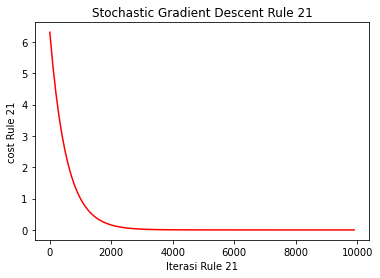

In [390]:
plt.xlabel("Iterasi Rule 21")
plt.ylabel("cost Rule 21")
plt.title("Stochastic Gradient Descent Rule 21")
plt.plot(s_iterasi_rule21_list,s_cost_rule1_list, color='red', label='Eror')
plt.show()

In [391]:
s_cost_rule21

1.4914401489334754e-30

In [392]:
s_b0_rule21

-0.7571120957389522

In [393]:
s_bpoly_rule21

array([0.91092799, 0.41113504, 0.4952586 , 1.        ])

#Prediksi

In [394]:
df_pred=pd.concat([data_rule_1, data_rule_2, data_rule_3, data_rule_4, data_rule_5, data_rule_6, data_rule_7, data_rule_8, data_rule_9, data_rule_10, data_rule_11, data_rule_12, data_rule_13, data_rule_14, data_rule_15, data_rule_16, data_rule_17, data_rule_18, data_rule_19, data_rule_20, data_rule_21], ignore_index=False)
df_pred.sort_index()

Age   TP   DB   AGR  Liver_Disease  pred
0     65  6.8  0.1  0.90              2  0.90
1     62  7.5  5.5  0.74              2  0.74
2     62  7.0  4.1  0.89              2  0.89
3     58  6.8  0.4  1.00              2  1.00
4     72  7.3  2.0  0.40              2  0.40
..   ...  ...  ...   ...            ...   ...
474   32  5.4  8.4  0.90              2  0.90
475   60  5.9  0.1  0.37              1  0.37
476   40  6.0  0.1  1.10              2  1.10
477   52  6.4  0.2  1.00              2  1.00
478   31  6.8  0.5  1.00              2  1.00

[417 rows x 6 columns]

In [395]:
df_fuzz['alpha_predikat']=df_fuzz[['miu_Age','miu_TP','miu_DB','miu_AGR', 'miu_Liver_Disease']].min(axis=1)
df_fuzz

Age   TP   DB   AGR  Liver_Disease    Age_fuzz TP_fuzz    DB_fuzz  \
0     65  6.8  0.1  0.90              2         Tua  Normal    Menurun   
1     62  7.5  5.5  0.74              2         Tua  Normal  Meningkat   
2     62  7.0  4.1  0.89              2         Tua  Normal     Normal   
3     58  6.8  0.4  1.00              2         Tua  Normal     Normal   
4     72  7.3  2.0  0.40              2         Tua  Normal     Normal   
..   ...  ...  ...   ...            ...         ...     ...        ...   
475   60  5.9  0.1  0.37              1         Tua  Normal    Menurun   
476   40  6.0  0.1  1.10              2  Paruh baya  Normal    Menurun   
477   52  6.4  0.2  1.00              2  Paruh baya  Normal    Menurun   
478   31  6.8  0.5  1.00              2        Muda  Normal     Normal   
479   38  7.3  0.3  1.50              1  Paruh baya  Normal     Normal   

    AGR_fuzz Liver_Disease_fuzz   miu_Age        miu_TP    miu_DB   miu_AGR  \
0     Rendah           Nonliver  0.555556  2.960595e-15  0.000000  0.000000   
1     Rendah           Nonliver  0.388889  8.333333e-01  0.408602  0.000000   
2     Rendah           Nonliver  0.388889  8.333333e-01  0.000000  0.000000   
3     Rendah           Nonliver  0.166667  2.960595e-15  0.000000  0.833333   
4     Rendah           Nonliver  0.944444  8.333333e-01  0.000000  0.000000   
..       ...                ...       ...           ...       ...       ...   
475   Rendah              Liver  0.277778  0.000000e+00  0.000000  0.000000   
476   Rendah           Nonliver  0.500000  2.960595e-15  0.000000  0.833333   
477   Rendah           Nonliver  0.300000  2.960595e-15  0.000000  0.833333   
478   Rendah           Nonliver  0.307692  2.960595e-15  0.000000  0.833333   
479   Normal              Liver  0.300000  8.333333e-01  0.000000  0.000000   

     miu_Liver_Disease                                               Rule  \
0                  0.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...   
1                  0.0   Jika X1 Tua dan X2 Normal dan X3 Meningkat da...   
2                  0.0   Jika X1 Tua dan X2 Normal dan X3 Normal dan X...   
3                  0.0   Jika X1 Tua dan X2 Normal dan X3 Normal dan X...   
4                  0.0   Jika X1 Tua dan X2 Normal dan X3 Normal dan X...   
..                 ...                                                ...   
475                1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...   
476                0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Menur...   
477                0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Menur...   
478                0.0   Jika X1 Muda dan X2 Normal dan X3 Normal dan ...   
479                1.0   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...   

     alpha_predikat  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
..              ...  
475             0.0  
476             0.0  
477             0.0  
478             0.0  
479             0.0  

[480 rows x 17 columns]

In [396]:
df_fuzz['y_pred_regressi']=df_pred.pred
df_fuzz

Age   TP   DB   AGR  Liver_Disease    Age_fuzz TP_fuzz    DB_fuzz  \
0     65  6.8  0.1  0.90              2         Tua  Normal    Menurun   
1     62  7.5  5.5  0.74              2         Tua  Normal  Meningkat   
2     62  7.0  4.1  0.89              2         Tua  Normal     Normal   
3     58  6.8  0.4  1.00              2         Tua  Normal     Normal   
4     72  7.3  2.0  0.40              2         Tua  Normal     Normal   
..   ...  ...  ...   ...            ...         ...     ...        ...   
475   60  5.9  0.1  0.37              1         Tua  Normal    Menurun   
476   40  6.0  0.1  1.10              2  Paruh baya  Normal    Menurun   
477   52  6.4  0.2  1.00              2  Paruh baya  Normal    Menurun   
478   31  6.8  0.5  1.00              2        Muda  Normal     Normal   
479   38  7.3  0.3  1.50              1  Paruh baya  Normal     Normal   

    AGR_fuzz Liver_Disease_fuzz   miu_Age        miu_TP    miu_DB   miu_AGR  \
0     Rendah           Nonliver  0.555556  2.960595e-15  0.000000  0.000000   
1     Rendah           Nonliver  0.388889  8.333333e-01  0.408602  0.000000   
2     Rendah           Nonliver  0.388889  8.333333e-01  0.000000  0.000000   
3     Rendah           Nonliver  0.166667  2.960595e-15  0.000000  0.833333   
4     Rendah           Nonliver  0.944444  8.333333e-01  0.000000  0.000000   
..       ...                ...       ...           ...       ...       ...   
475   Rendah              Liver  0.277778  0.000000e+00  0.000000  0.000000   
476   Rendah           Nonliver  0.500000  2.960595e-15  0.000000  0.833333   
477   Rendah           Nonliver  0.300000  2.960595e-15  0.000000  0.833333   
478   Rendah           Nonliver  0.307692  2.960595e-15  0.000000  0.833333   
479   Normal              Liver  0.300000  8.333333e-01  0.000000  0.000000   

     miu_Liver_Disease                                               Rule  \
0                  0.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...   
1                  0.0   Jika X1 Tua dan X2 Normal dan X3 Meningkat da...   
2                  0.0   Jika X1 Tua dan X2 Normal dan X3 Normal dan X...   
3                  0.0   Jika X1 Tua dan X2 Normal dan X3 Normal dan X...   
4                  0.0   Jika X1 Tua dan X2 Normal dan X3 Normal dan X...   
..                 ...                                                ...   
475                1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...   
476                0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Menur...   
477                0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Menur...   
478                0.0   Jika X1 Muda dan X2 Normal dan X3 Normal dan ...   
479                1.0   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...   

     alpha_predikat  y_pred_regressi  
0               0.0             0.90  
1               0.0             0.74  
2               0.0             0.89  
3               0.0             1.00  
4               0.0             0.40  
..              ...              ...  
475             0.0             0.37  
476             0.0             1.10  
477             0.0             1.00  
478             0.0             1.00  
479             0.0              NaN  

[480 rows x 18 columns]

In [397]:
#df_fuzz['Pred TSK']=df_fuzz['alpha_predikat']*df_fuzz['y_pred_regressi']/df_fuzz['alpha_predikat'].sum()
df_fuzz['Pred TSK']=df_fuzz['alpha_predikat']*df_fuzz['y_pred_regressi']
df_fuzz

Age   TP   DB   AGR  Liver_Disease    Age_fuzz TP_fuzz    DB_fuzz  \
0     65  6.8  0.1  0.90              2         Tua  Normal    Menurun   
1     62  7.5  5.5  0.74              2         Tua  Normal  Meningkat   
2     62  7.0  4.1  0.89              2         Tua  Normal     Normal   
3     58  6.8  0.4  1.00              2         Tua  Normal     Normal   
4     72  7.3  2.0  0.40              2         Tua  Normal     Normal   
..   ...  ...  ...   ...            ...         ...     ...        ...   
475   60  5.9  0.1  0.37              1         Tua  Normal    Menurun   
476   40  6.0  0.1  1.10              2  Paruh baya  Normal    Menurun   
477   52  6.4  0.2  1.00              2  Paruh baya  Normal    Menurun   
478   31  6.8  0.5  1.00              2        Muda  Normal     Normal   
479   38  7.3  0.3  1.50              1  Paruh baya  Normal     Normal   

    AGR_fuzz Liver_Disease_fuzz   miu_Age        miu_TP    miu_DB   miu_AGR  \
0     Rendah           Nonliver  0.555556  2.960595e-15  0.000000  0.000000   
1     Rendah           Nonliver  0.388889  8.333333e-01  0.408602  0.000000   
2     Rendah           Nonliver  0.388889  8.333333e-01  0.000000  0.000000   
3     Rendah           Nonliver  0.166667  2.960595e-15  0.000000  0.833333   
4     Rendah           Nonliver  0.944444  8.333333e-01  0.000000  0.000000   
..       ...                ...       ...           ...       ...       ...   
475   Rendah              Liver  0.277778  0.000000e+00  0.000000  0.000000   
476   Rendah           Nonliver  0.500000  2.960595e-15  0.000000  0.833333   
477   Rendah           Nonliver  0.300000  2.960595e-15  0.000000  0.833333   
478   Rendah           Nonliver  0.307692  2.960595e-15  0.000000  0.833333   
479   Normal              Liver  0.300000  8.333333e-01  0.000000  0.000000   

     miu_Liver_Disease                                               Rule  \
0                  0.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...   
1                  0.0   Jika X1 Tua dan X2 Normal dan X3 Meningkat da...   
2                  0.0   Jika X1 Tua dan X2 Normal dan X3 Normal dan X...   
3                  0.0   Jika X1 Tua dan X2 Normal dan X3 Normal dan X...   
4                  0.0   Jika X1 Tua dan X2 Normal dan X3 Normal dan X...   
..                 ...                                                ...   
475                1.0   Jika X1 Tua dan X2 Normal dan X3 Menurun dan ...   
476                0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Menur...   
477                0.0   Jika X1 Paruh baya dan X2 Normal dan X3 Menur...   
478                0.0   Jika X1 Muda dan X2 Normal dan X3 Normal dan ...   
479                1.0   Jika X1 Paruh baya dan X2 Normal dan X3 Norma...   

     alpha_predikat  y_pred_regressi  Pred TSK  
0               0.0             0.90       0.0  
1               0.0             0.74       0.0  
2               0.0             0.89       0.0  
3               0.0             1.00       0.0  
4               0.0             0.40       0.0  
..              ...              ...       ...  
475             0.0             0.37       0.0  
476             0.0             1.10       0.0  
477             0.0             1.00       0.0  
478             0.0             1.00       0.0  
479             0.0              NaN       NaN  

[480 rows x 19 columns]

In [398]:
df_fuzz.to_excel('hasil_prediksi.xlsx') 

In [399]:
x1= df_fuzz.index
y1= df_fuzz.Liver_Disease
y2= df_fuzz['Pred TSK']

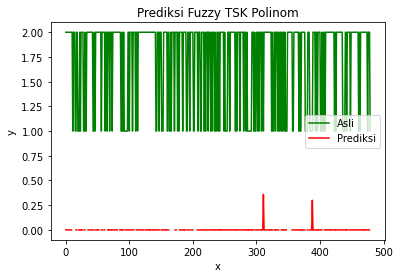

In [400]:
plt.plot(x1, y1,  label = "Asli",  color='green')
plt.plot(x1, y2, label = "Prediksi", color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Prediksi Fuzzy TSK Polinom')
plt.legend()
plt.show()